In [1]:
from xml.etree.ElementInclude import include

import pandas as pd
import re
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pgeocode

# Einlesen der Daten


In [2]:
df = pd.read_csv("../data/immo_data_202208_v2.csv", low_memory=False)
df.drop(["Unnamed: 0.1","Unnamed: 0"], axis=1,inplace=True) #Zwei Spalten für Index entfernen
df.head(20)

Municipality Living space Plot area Floor space Availability  \
0        Biberstein       100 m²       NaN         NaN   On request   
1        Biberstein       156 m²    222 m²      242 m²   On request   
2               NaN          NaN       NaN         NaN          NaN   
3        Biberstein       154 m²    370 m²      257 m²   On request   
4          Küttigen       142 m²       NaN         NaN   On request   
5   Erlinsbach (AG)       190 m²   1063 m²      220 m²   On request   
6        Biberstein       124 m²    200 m²         NaN  Immediately   
7             Aarau          NaN       NaN         NaN   On request   
8             Aarau        75 m²       NaN         NaN   On request   
9   Erlinsbach (AG)       110 m²   2116 m²         NaN   On request   
10            Aarau        97 m²       NaN         NaN   On request   
11            Aarau       127 m²       NaN         NaN   On request   
12            Aarau       152 m²    839 m²      132 m²   On request   
13       Buchs (AG)        95 m²       NaN         NaN  Immediately   
14  Erlinsbach (AG)       127 m²    625 m²         NaN   On request   
15            Aarau       258 m²   1005 m²         NaN   On request   
16            Aarau       106 m²    131 m²         NaN   30.12.2022   
17       Buchs (AG)       190 m²    535 m²         NaN   On request   
18  Erlinsbach (AG)       115 m²       NaN         NaN   On request   
19       Buchs (AG)        93 m²       NaN         NaN   On request   

                                 location  \
0                     5023 Biberstein, AG   
1    Buhldenstrasse 8d5023 Biberstein, AG   
2                        5022 Rombach, AG   
3   Buhaldenstrasse 8A5023 Biberstein, AG   
4                        5022 Rombach, AG   
5         Buchhalde 365018 Erlinsbach, AG   
6                     5023 Biberstein, AG   
7                          5004 Aarau, AG   
8      Siebenmatten 495032 Aarau Rohr, AG   
9                     5018 Erlinsbach, AG   
10        Rütmattstrasse 175004 Aarau, AG   
11      Nordstrasse 105032 Aarau Rohr, AG   
12  Schönenwerderstrasse 545000 Aarau, AG   
13   Steinfeldstrasse 485033 Buchs AG, AG   
14                    5018 Erlinsbach, AG   
15                    5032 Aarau Rohr, AG   
16               Dammweg 965000 Aarau, AG   
17            Grenzweg 25033 Buchs AG, AG   
18       Veilchenweg 45018 Erlinsbach, AG   
19         Trieschweg 265033 Buchs AG, AG   

                                          description  \
0   3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1   4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2   2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3   4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   
4   4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...   
5   5.5 rooms, 190 m²«Modernes, grosszügiges Maiso...   
6   4.5 rooms, 124 m²«Kompakt, doch geräumiges 4½ ...   
7   4.5 rooms«Preishit! Grossräumige Wohnung mitte...   
8   3.5 rooms, 75 m²«Gepflegte 3.5 Zimmer Dachwohn...   
9   4.5 rooms, 110 m²«Renovierte 4.5 Zimmer Terras...   
10  4.5 rooms, 97 m²«ATEMBERAUBENDE WEITSICHT AN T...   
11  4.5 rooms, 127 m²«Wohnräume mit interessantem ...   
12  5 rooms, 152 m²«RESERVIERT.»CHF 1,200,000.—Fav...   
13  4.5 rooms, 95 m²«4.5-Zimmer Wohnung, Hobbyraum...   
14  5.5 rooms, 127 m²«Potential ist hier das Zaube...   
15  258 m²«Mehrgenerationenhaus mit grossem Garten...   
16  4.5 rooms, 106 m²«CHARMANTES 4.5-ZIMMER-REIHEN...   
17  5.5 rooms, 190 m²«Schönes Einfamilienhaus an d...   
18  4.5 rooms, 115 m²«HELL | KINDERFREUNDLICH | GR...   
19  3.5 rooms, 93 m²«Neuwertige 3½ Zimmer Parterre...   

                                 detailed_description  \
0   DescriptionLuxuriöse Attika-Wohnung direkt an ...   
1   DescriptionStilvolle Liegenschaft an ruhiger L...   
2   detail_responsive#description_title2,5 Zimmerw...   
3   DescriptionDieses äusserst grosszügige Minergi...   
4   DescriptionAus ehemals zwei Wohnungen wurde ei...   
5   DescriptionDer Blick in d

- Municipality = Gemeinde
- Living space = Wohnfläche mit m^2
- Plot area = Grundstücksfläche mit m^2
- Floor space = Stockwerkfläche
- Availability = Verfügbarkeit
- location = Adresse
- description = Anzahl Räume, Wohnfläche, Beschreibung und Preis
- detailed_description = Text mit beschreibung für Wohnung
- url = Link zum Angebot
- table = Html der Seite
- Floor = Welches Stockwerk Text und 4.Floor
- detail_responsive#municipality = Gemeinde
- detail_responsive#surface_living = Wohnfläche mit m^2
- detail_responsive#floor = Stockwerk (Text mit Zahl)
- detail_responsive#available_from (Verfügbarkeit)
- Gemeinde = Gemeinde
- Wohnfläche = Wohnfläche mit m^2
- Stockwerk = Stockwerk (Text mit Zahl 1.Floor)
- Nutzfläche = Nutzfläche mit m^2
- Verfügbarkeit = Verfügbarkeit (Datum oder Ja/Nein)
- Grundstücksfläche = Grundstücksfläche mit m^2
- detail_responsive#surface_property = Grundstücksfläche mit m^2
- detail_responsive#surface_usable = Nutzfläche mit m^2
- Commune = Gemeinde
- Surface habitable = Wohnfläche mit m^2
- Surface du terrain = Grundstücksfläche mit m^2
- Surface utile = Nutzfläche mit m^2
- Disponibilité = Verfügbarkeit
- Étage = Stockwerk (Text und Zahlen)
- Comune = Gemeinde
- Superficie abitabile = Wohnfläche mit m^2
- Disponibilità = Verfügbarkeit
- Gross return = Bruttorendite
- Piano = Stockwerk (Text mit Zahl)
- Superficie del terreno = Grundstücksfläche mit m^2
- Superficie utile = Nutzfläche mit m^2
- Municipality_merged = Gemeinde
- Floor_merged = Stockwerk (Text mit Zahl)
- Living_space_merged = Wohnfläche mit m^2
- Floor_space_merged = Stockwerkfläche mit m^2
- Plot_area_merged = Grundstücksfläche auch mit m^2
- Availability_merged = Verfügbarkeit
- location_parsed = Adresse
- title = Titel auf der Webseite
- details = Anzahl Räumee und Fläche
- address = Adresse
- price = Preis mit .- und chf
- link = Url nach Anbieter
- details_structured = Viele detail wie Wohnfläche etc.
- lat = Latitude der Adresse
- lon = Longitude der Adresse
- index = inex von irgendwas
- ForestDensityL
- ForestDensityM
- ForestDensityS
- Latitude = Latitude der Gemeinde
- Locality = Gemeinde
- Longitude = Longitude der Gemeinde
- NoisePollutionRailwayL
- NoisePollutionRailwayM
- NoisePollutionRailwayS
- NoisePollutionRoadL
- NoisePollutionRoadM
- NoisePollutionRoadS
- PopulationDensityL
- PopulationDensityM
- PopulationDensityS
- RiversAndLakesL
- RiversAndLakesM
- RiversAndLakesS
- WorkplaceDensityL
- WorkplaceDensityM
- WorkplaceDensityS
- Zip = Postleitzahl
- distanceToTrainStation
- gde_area_agriculture_percentage
- gde_area_forest_percentage
- gde_area_nonproductive_percentage
- gde_area_settlement_percentage
- gde_average_house_hold
- gde_empty_apartments
- gde_foreigners_percentage
- gde_new_homes_per_1000
- gde_politics_bdp
- gde_politics_cvp
- gde_politics_evp
- gde_politics_fdp
- gde_politics_glp
- gde_politics_gps
- gde_politics_pda
- gde_politics_rights
- gde_politics_sp
- gde_politics_svp
- gde_pop_per_km2
- gde_population
- gde_private_apartments
- gde_social_help_quota
- gde_tax
- gde_workers_sector1
- gde_workers_sector2
- gde_workers_sector3
- gde_workers_total
- price_cleaned = Preis
- type = Gebäudeart
- Space extracted = Wohnfläche
- rooms = Anzahl Räume
- plz_parsed = Postleitzahl
- type_unified = Gebäudeart gruppiert
- Floor_unified = ?????????Floor area, Floor space: gemergt von immoscout24 und homegate?? Stockwerk
- Plot_area_unified = Plot area, Land area: gemergt von immoscout24 und homegate Grundstücksfläche
- Living_area_unified = Living space, Surface Living
- provider = Anbieterseite
- space = Wohnfläche
- price_s = Preis bei Ergebnisssuche
- address_s = Adresse Ergebnisssuche
- No. of rooms: = Anzahl rooms
- Number of apartments: Anzahl Wohnungen
- Surface living: = Wohnfläche
- Land area: Grundstücksfläche
- Room height: Raum höhe
- Last refurbishment: Renovation
- Year built: Baujahr
- features = Beschreibungen (Fr Wohnungen ?)
- description_detailed = Detail (Fr Wohnungen ?)
- Floor space: Stockwerkfläche m^2
- Number of floors: Anzahl Stockwerke
- Volume: Volumen Gebäude/Wohnung
- plz = Postleitzahl
- Number of toilets: = Anzahl Toiletten
- Gross yield: = Bruttoertrag
- Minimum floor space: = Min. Stockwerkfläche
- space_cleaned = extrahierte Platz

Warum ist Floor_unified auf welchem Stockwerk

In [3]:
df["Floor_unified"].head()

0      4
1    NaN
2    NaN
3    NaN
4     GF
Name: Floor_unified, dtype: object

Floor space ? Minimum floor space? Floor space:?

In [4]:
df[["Minimum floor space:", "Floor_space_merged"]]

Minimum floor space: Floor_space_merged
0                      NaN                NaN
1                      NaN             242 m²
2                      NaN                NaN
3                      NaN             257 m²
4                      NaN                NaN
...                    ...                ...
22476                  NaN                NaN
22477                  NaN                NaN
22478                  NaN                NaN
22479                  NaN                NaN
22480                  NaN                NaN

[22481 rows x 2 columns]

In [5]:
df.describe(include="all")

Municipality Living space Plot area Floor space Availability  \
count             21550        11613      4684        2775        12641   
unique             2930          531      1706         493          110   
top       Crans-Montana       120 m²   1000 m²      150 m²   On request   
freq                383          262        44          39         9102   
mean                NaN          NaN       NaN         NaN          NaN   
std                 NaN          NaN       NaN         NaN          NaN   
min                 NaN          NaN       NaN         NaN          NaN   
25%                 NaN          NaN       NaN         NaN          NaN   
50%                 NaN          NaN       NaN         NaN          NaN   
75%                 NaN          NaN       NaN         NaN          NaN   
max                 NaN          NaN       NaN         NaN          NaN   

                  location                                        description  \
count                22481                                              21805   
unique                9346                                              21002   
top     3963 Crans-Montana  CHANTIER OUVERT!FRAIS DE NOTAIRE ET DROITS DE ...   
freq                   264                                                 14   
mean                   NaN                                                NaN   
std                    NaN                                                NaN   
min                    NaN                                                NaN   
25%                    NaN                                                NaN   
50%                    NaN                                                NaN   
75%                    NaN                                                NaN   
max                    NaN                                                NaN   

                                     detailed_description  \
count                                               22481   
unique                                              21214   
top     Extract from the debt collection registerIn a ...   
freq                                                   41   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                           url  \
count                                    22481   
unique                                   22481   
top     https://www.homegate.ch/buy/3001944902   
freq                                         1   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

                                                    table  ...       features  \
count                                               13355  ...           8323   
unique                                              12710  ...           1564   
top     b <article class=####Box-cYFBPY hKrxoH####><h2...  ...  Parking space   
freq                                                    7  ...            236   
mean                                                  NaN  ...            NaN   
std                                                   NaN  ...            NaN   
min                                                   NaN  ...            NaN   
25%                                                   NaN  ...            NaN   
50%                                                   NaN  ...            

In [6]:
list(df.columns)

['Municipality',
 'Living space',
 'Plot area',
 'Floor space',
 'Availability',
 'location',
 'description',
 'detailed_description',
 'url',
 'table',
 'Floor',
 'detail_responsive#municipality',
 'detail_responsive#surface_living',
 'detail_responsive#floor',
 'detail_responsive#available_from',
 'Gemeinde',
 'Wohnfläche',
 'Stockwerk',
 'Nutzfläche',
 'Verfügbarkeit',
 'Grundstücksfläche',
 'detail_responsive#surface_property',
 'detail_responsive#surface_usable',
 'Commune',
 'Surface habitable',
 'Surface du terrain',
 'Surface utile',
 'Disponibilité',
 'Étage',
 'Comune',
 'Superficie abitabile',
 'Disponibilità',
 'Gross return',
 'Piano',
 'Superficie del terreno',
 'Superficie utile',
 'Municipality_merged',
 'Floor_merged',
 'Living_space_merged',
 'Floor_space_merged',
 'Plot_area_merged',
 'Availability_merged',
 'location_parsed',
 'title',
 'details',
 'address',
 'price',
 'link',
 'details_structured',
 'lat',
 'lon',
 'index',
 'ForestDensityL',
 'ForestDensityM',
 '

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Columns: 132 entries, Municipality to space_cleaned
dtypes: float64(63), int64(2), object(67)
memory usage: 22.6+ MB


Das Dataset besteht aus 22481 Zeilen und 132 Spalten. Die meisten Spalten sind vom Typ object und float, diese werden sich noch angepasst.

## Duplikate zählen

In [8]:
print(df.duplicated().sum())

0


Datensatz scheint keine Duplikate zu haben.

## Fehlende Daten zählen

In [9]:
print(df.isna().sum().sum())

1179856


Das Dataset hat sehr viele fehlende Werte. <br>
Wir untersuchen nun die Spalten mit den meisten fehlenden Werten.

In [10]:
df.isna().sum().sort_values(ascending=False).head(10)

Minimum floor space:      22479
Superficie utile          22475
Gross return              22475
Piano                     22471
Superficie del terreno    22470
Surface utile             22467
Gross yield:              22467
Étage                     22457
Superficie abitabile      22454
Comune                    22454
dtype: int64

Die Top 10 Spalten mit den meisten fehlenden Werten sind, zeigt deutlich das fasst die ganze Spalte leer ist. <br>
Da sich Spalten gegenseitig abdecken werden müssen wir diese genauer untersuchen. <br>  
Wir untersuchen nun wie viele Spalten keine fehlende Werte haben.

In [11]:
print((df.isna().sum() == 0).sum())

48


Wir haben 48 Spalten von 132 Spalten die keine na-Werte haben. <br>

**Zusammengefasst:** <br>
Es gibt sehr viele fehlende Werte. Wenn man die Spalten untersucht sieht man, dass es Spalten gibt wie "Minimum floor space:" welche 22479 fehlende Werte von 22481 hat. Es gibt aber auch 48 von 132 Spalten die keine fehlende Werte enthalten. <br>
Was mit den Spalten passiert, die so viele fehlende Werte haben wird in einem nächsten Schritt entschieden, da diese mit anderen Spalten kombiniert werden kann.


# Untersuchen der Preissplaten

In [12]:
price_cols = df[["price","price_cleaned","price_s"]] #Filtern der Preis Spalten
price_cols.head()

price  price_cleaned price_s
0  CHF 1,150,000.—      1150000.0     NaN
1  CHF 1,420,000.—      1420000.0     NaN
2    CHF 720,000.—       720000.0     NaN
3  CHF 1,430,000.—      1430000.0     NaN
4    CHF 995,000.—       995000.0     NaN

Untersuchen der fehlenden Werte in den Preis Spalten.

In [13]:
price_cols.isna().sum()

price                0
price_cleaned     1015
price_s          13355
dtype: int64

Price haben keine fehlende Werte, price_cleaned hat ungefähr 1000 fehlende Werte und price_s hat 13355 fehlende Werte. <br>
Da price_cleaned unsere Zielspalte ist, untersuchen wir die fehlenden Werte genauer.

In [14]:
price_cols[price_cols["price_cleaned"].isna()].head(10)

price  price_cleaned price_s
21   Price on request            NaN     NaN
27   Price on request            NaN     NaN
28   Price on request            NaN     NaN
29   Price on request            NaN     NaN
33   Price on request            NaN     NaN
43   Price on request            NaN     NaN
49   Price on request            NaN     NaN
56   Price on request            NaN     NaN
100  Price on request            NaN     NaN
105  Price on request            NaN     NaN

Auffällig ist, dass price bei den nan-Werte der price_cleaned Spalte immer ein Price on request eingetragen ist. <br>
Wir ersetzten nun die Price on request Werte mit nan.

In [15]:
price_cols = price_cols.replace("Price on request", np.nan)
price_cols.isna().sum()

price             1015
price_cleaned     1015
price_s          13355
dtype: int64

Mit dieser anpassung scheinen price und price_cleaned identisch zu sein. <br>
Was uns noch interessiert ist ob es mehrere Währungen gibt.

In [16]:
filtered_df = df[~df['price'].str.contains('CHF')]
filtered_df["price"].value_counts()

price
Price on request    1015
EUR 495,000.—          2
EUR 635,000.—          1
EUR 780,000.—          1
EUR 190,000.—          1
EUR 650,000.—          1
EUR 1,639,000.—        1
EUR1,130,000.–         1
EUR1,200,000.–         1
EUR1,340,000.–         1
EUR1,645,000.–         1
EUR1,880,000.–         1
EUR2,130,000.–         1
EUR5,500,000.–         1
EUR10,000,000.–        1
EUR200,000.–           1
EUR1,180,000.–         1
Name: count, dtype: int64

Wir haben nun entdeckt das wir auch Preise in Euro haben. <br>
Wir untersuchen nun ob die umrechnung stimmt.

In [17]:
price_cols[price_cols["price"]=="EUR 495,000.—"]

price  price_cleaned price_s
7682  EUR 495,000.—       495000.0     NaN
7774  EUR 495,000.—       495000.0     NaN

Die Umrechnung scheint 1zu1 übernommen worden zu sein. <br>
Da der Datensatz 2022 erstellt wurde und der Wechselkurs zwischen 1 und 1.05 lag vernachlässigen wir die Umrechnung. Auch das es nur 20 Werte hat, in Euro untermauert das Armgument es zu belassen. <br>
Nun müssen wir herausfinden was der Sinn von price_s ist.

In [18]:
price_cols[~price_cols["price_s"].isna()].tail()

price  price_cleaned          price_s
22476    CHF475,000.–       475000.0    CHF 475,000.–
22477  CHF1,490,000.–      1490000.0  CHF 2,194,770.–
22478  CHF1,450,000.–      1450000.0  CHF 2,135,850.–
22479  CHF1,290,000.–      1290000.0  CHF 1,290,000.–
22480    CHF780,000.–       780000.0  CHF 1,148,940.–

Schauen wir uns die letzten 5 Werte an, sehen wir das price_s und price_cleaned sich unterscheiden können. <br>
Wir untersuchen nun ein Beispiel.

In [19]:
df[df["price_s"] == "CHF 2,194,770.–"]

Municipality Living space Plot area Floor space Availability  \
22477          Wil          NaN       NaN         NaN          NaN   

                              location description  \
22477  Fürstenlandstrasse 69, 9500 Wil         NaN   

                                    detailed_description  \
22477  Description\n"J'ADORE - Exklusives Wohnen in W...   

                                          url table  ...  \
22477  https://www.homegate.ch/buy/3001826476   NaN  ...   

                                                features  \
22477  Balcony / Terrace\tWashing machine\tView\tWhee...   

                                    description_detailed Floor space:  \
22477  Description\n"J'ADORE - Exklusives Wohnen in W...          NaN   

      Number of floors: Volume:     plz Number of toilets: Gross yield:  \
22477               3.0     NaN  9500.0                NaN          NaN   

      Minimum floor space: space_cleaned  
22477                  NaN         180.0  

[1 rows x 132 columns]

Da wir kein Indiz gefunden haben brauchte es Rücksprache mit unserem Dozent.
Die Spalte price_s ist eine Spalte die angezeigt wird bevor man auf die Detailseite klickt. <br>
Da wir keinen Nutzen sehen, und dem Model nicht eine Spalte geben möchten die manchaml den Preis enthält werden wir diese Spalte entfernen.

**Zusammengefasst:** <br>
price_cleaned ist die verarbeitete Spalte von price, somit ist nur price_cleaned benötigt. price_s ist der Anzeige Preis und hat keinen Nutzen für uns weshalb sie entfernt wird.

## Verteilung des Preises

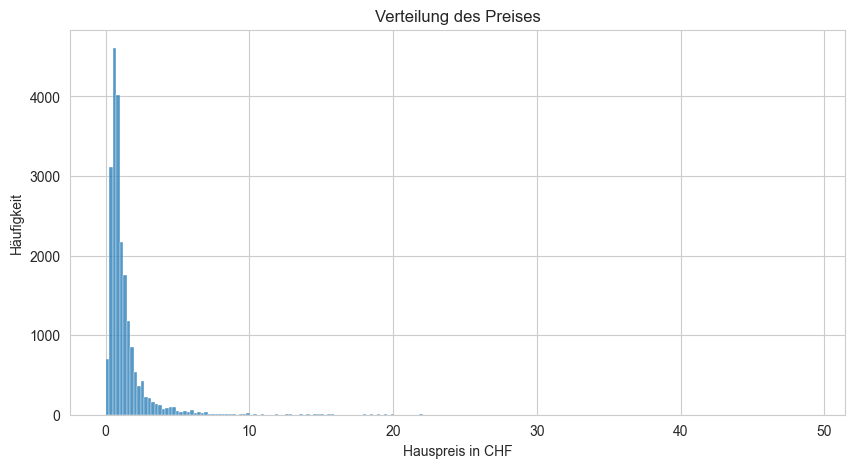

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(price_cols["price_cleaned"]/1000000, bins=200)
plt.xlabel("Hauspreis in CHF")
plt.ylabel("Häufigkeit")
plt.title("Verteilung des Preises")
plt.show()

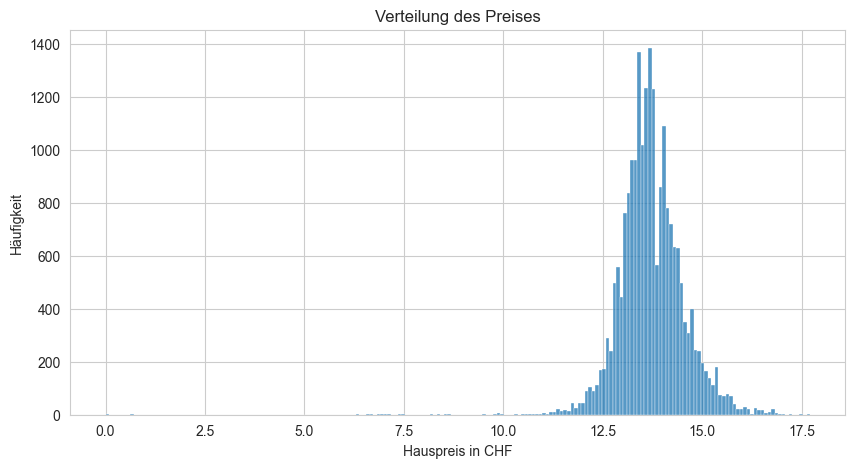

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(df["price_cleaned"]), bins=200)
plt.xlabel("Hauspreis in CHF")
plt.ylabel("Häufigkeit")
plt.title("Verteilung des Preises")
plt.show()

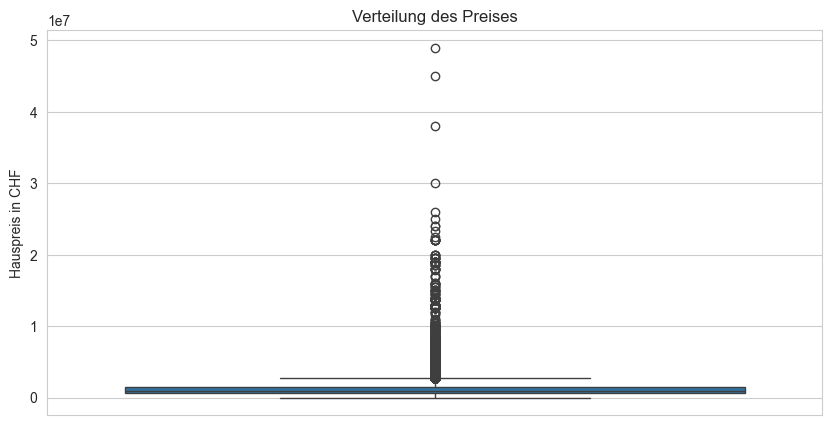

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, y="price_cleaned")
plt.ylabel("Hauspreis in CHF")
plt.title("Verteilung des Preises")
plt.show()  

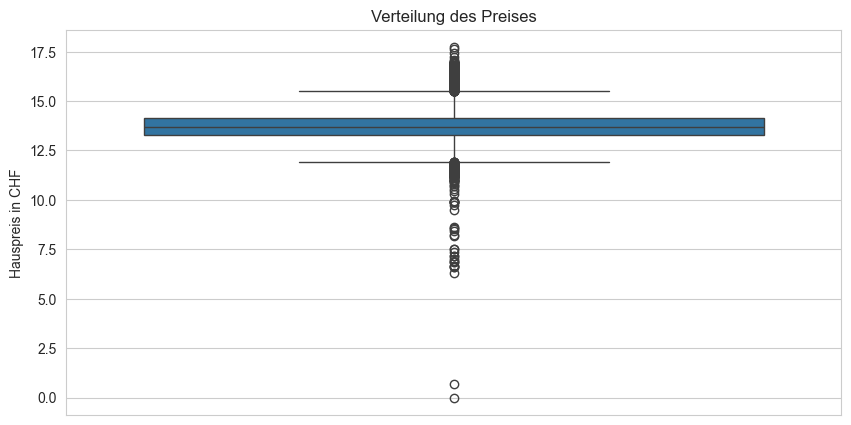

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(np.log(df["price_cleaned"]))
plt.ylabel("Hauspreis in CHF")
plt.title("Verteilung des Preises")
plt.show()


In [24]:
#calculate whiskers
Q1 = np.log(df["price_cleaned"]).quantile(0.25)
Q3 = np.log(df["price_cleaned"]).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
print(lower_bound, np.exp(lower_bound))


11.908177440391462 148475.82663796254


In [25]:
df.loc[df["price_cleaned"] < 140000].shape

(192, 132)

In [26]:
df.loc[df["price_cleaned"] < 140000].sort_values("price_cleaned").head(20)

Municipality Living space Plot area Floor space Availability  \
10690               Etoy          NaN       NaN         NaN   On request   
3906             Veyrier       140 m²       NaN         NaN   31.12.2022   
17882           Ovronnaz          NaN       NaN         NaN          NaN   
5021            Le Locle        45 m²       NaN         NaN   On request   
20194           Le Locle          NaN       NaN         NaN          NaN   
17883           Ovronnaz          NaN       NaN         NaN          NaN   
17884           Ovronnaz          NaN       NaN         NaN          NaN   
10530          Echandens        19 m²       NaN         NaN   15.09.2022   
20684               Bern          NaN       NaN         NaN          NaN   
12739               Sion        66 m²       NaN         NaN  Immediately   
4398          Courtedoux        75 m²       NaN         NaN   On request   
20195           Le Locle          NaN       NaN         NaN          NaN   
5026            Le Locle       110 m²       NaN         NaN   On request   
3614               Lancy          NaN       NaN         NaN   On request   
10798              Rolle          NaN       NaN         NaN   On request   
11358           Montreux          NaN       NaN         NaN   On request   
3811        Corsier (GE)          NaN       NaN         NaN   01.10.2022   
14472    Chêne-Bougeries          NaN       NaN         NaN          NaN   
10213           Lausanne       170 m²       NaN         NaN   On request   
15542            Payerne          NaN       NaN         NaN          NaN   

                                          location  \
10690                                1163 Etoy, VD   
3906                              1255 Veyrier, GE   
17882                Ch de la Coppe, 1911 Ovronnaz   
5021                             2400 Le Locle, NE   
20194                                2400 Le Locle   
17883               Ch. de la Coppe, 1911 Ovronnaz   
17884                     En Bierze, 1911 Ovronnaz   
10530                           1026 Echandens, VD   
20684                       Moosseedorf, 3000 Bern   
12739          Route de Chippis 701967 Bramois, VS   
4398               Faubourg 1092905 Courtedoux, JU   
20195                                2400 Le Locle   
5026                             2400 Le Locle, NE   
3614   Chemin des semailles 9c1212 Grand-Lancy, GE   
10798                               1180 Rolle, VD   
11358                             1822 Chernex, VD   
3811                           1246 Corsier GE, GE   
14472  Route de Malagnou 201, 1224 Chêne-Bougeries   
10213                            1007 Lausanne, VD   
15542             Route de Neuchâtel, 1530 Payerne   

                                             description  \
10690  «a vendre une maison villageoise sur la Côte»C...   
3906   7 rooms, 140 m²«Villa a vendre 7 pieces a Veyr...   
17882  Chaleureux, douillets, élégants, les tout dern...   
5021   2 rooms, 45 m²«IDEAL POUR ETUDIANT !»CHF 745.—...   
20194  Idéalement situé, cet appartement de 2 pièces ...   
17883  Construction en cours! Investissez pour votre ...   
17884  4 pces de 85m2 avec terrasse 20m2 et balcon 10...   
10530  1 room, 19 m²«Magnifique chambre»CHF 950.—Favo...   
20684  Zu verkaufen: Anbau mit Wohnwagen.Den Wohnwage...   
12739  2.5 rooms, 66 m²«UNIQUE A BRAMOIS ! Des 2.5 pc...   
4398   3.5 rooms, 75 m²«Magnifique appartement à loue...   
20195  Betterhomes vous propose ce magnifique apparte...   
5026   5.5 rooms, 110 m²«MAGNIFIQUE PARQUET ANCIEN !»...   
3614           «appartement 3 pièces»CHF 1600.—Favourite   
10798            3 rooms«appartement»CHF 1850.—Favourite   
11358  «-1-pièces-Appartement à Chernex»CHF 1850.—Fav...   
3811   6.5 rooms«Appartement Corsier 6.5 pièces»CHF 3...   
14472  Appartement de 4 pièces avec jardin dans une r...   
10213  6.5 rooms, 170 m²«AVEC VUE SUR LE LAC ET PISCI...   
15542  Pavillon de jardin à vendre, à venir chercher ...   

                   

Es gibt Preise die 1 und 2 Franken sind. Nach suche auf Immoscout24 haben wir festgestellt, dass es um Preise handelt die noch verhandelt werden müssen. <br> Die darauf folgenden Preise (550.- und 745.-) sind Mietpreise. Anstelle weiter die tiefen Ausreisser zu untersuchen, untersuchen wir die Preise nahe an der unteren Whiskergrenze.


In [27]:
df.loc[df["price_cleaned"] < 140000].sort_values("price_cleaned",ascending=False).head(20)

Municipality Living space Plot area Floor space Availability  \
19635            Hérémence          NaN       NaN         NaN          NaN   
12333           Bettmeralp          NaN       NaN         NaN   On request   
21378            Leukerbad          NaN       NaN         NaN          NaN   
21377            Leukerbad          NaN       NaN         NaN          NaN   
4122               Mesocco       140 m²    178 m²         NaN   On request   
4119               Mesocco       140 m²    178 m²         NaN   On request   
7105            Gambarogno        90 m²    230 m²         NaN   On request   
7013                 Faido       110 m²       NaN         NaN   On request   
19662            Hérémence          NaN       NaN         NaN          NaN   
18444             Vichères          NaN       NaN         NaN          NaN   
11875            Isérables        65 m²       NaN         NaN  Immediately   
8451                Lugano        80 m²   8000 m²         NaN   On request   
21376            Leukerbad          NaN       NaN         NaN          NaN   
19889         Haute-Nendaz          NaN       NaN         NaN          NaN   
18021            Isérables          NaN       NaN         NaN          NaN   
19962               Siviez          NaN       NaN         NaN          NaN   
8785            Miglieglia       160 m²     95 m²         NaN   On request   
9423   Campo (Vallemaggia)        90 m²   3000 m²         NaN  Immediately   
12288              Vionnaz        30 m²       NaN         NaN   On request   
11633                  NaN       355 m²     88 m²         NaN   On request   

                                        location  \
19635                             1987 Hérémence   
12333                        Egga3991 Betten, VS   
21378                             3954 Leukerbad   
21377                             3954 Leukerbad   
4122        Strada de Lusgián 396563 Mesocco, GR   
4119        Strada de Lusgián 396563 Mesocco, GR   
7105                       Dorf6571 Indemini, TI   
7013                          6747 Chironico, TI   
19662  Chemin de la Tsaumette 17, 1987 Hérémence   
18444                              1945 Vichères   
11875                         1914 Isérables, VS   
8451                           6959 Cimadera, TI   
21376                             3954 Leukerbad   
19889                          1997 Haute-Nendaz   
18021                             1914 Isérables   
19962                       1997 Siviez (Nendaz)   
8785                         6986 Miglieglia, TI   
9423                 6683 Niva (Vallemaggia), TI   
12288                            1899 Torgon, VS   
11633                          1948 Lourtier, VS   

                                             description  \
19635  Avec son excellente situation et sa proximité ...   
12333  2.5 rooms«Preisgünstige Wohnung unterhalb der ...   
21378  Charmant studio semi-meublé et muni de 33m2 ha...   
21377  Ihr perfektes Feriendomizil mit vielen Highlig...   
4122   5.5 rooms, 140 m²«Nettes Haus mit großem Renov...   
4119   5.5 rooms, 140 m²«Casa da ristrutturare con gr...   
7105   4 rooms, 90 m²«5.5 Zimmer-Tessinerhaus mit Gar...   
7013   5.5 rooms, 110 m²«5-Zimmer-Dachwohnung in 2-Fa...   
19662  A vendre divers mayens et granges à rénover su...   
18444  Joli appartement situé à Liddes, village à une...   
11875  3 rooms, 65 m²«Appartement de 3 pièces mansard...   
8451   2.5 rooms, 80 m²«Haus zum Ausbauen mit Rustico...   
21376  Diese attraktive Ferienwohnung liegt im vierte...   
19889  Vous recherchez un bien pour profiter de la mo...   
18021  Charmant appartement de 3 pièces mansardé de 7...   
19962  Idéal pour les amateurs de ski en hiver ou VTT...   
8785   5 rooms, 160 m²«Casa da personalizzare vicino ...   
9423   3.5 rooms, 90 m²«Rustico zum Ausbauen mit Wies...   
12288  1.5 rooms, 30 m²«IDÉAL COMME PIED-À-TERRE»CHF ...   
11633  355 m²«Raccard à rénover - 355 M3 - Lourtier -...   

                     

Die ersten drei Wohnungen scheinen Ferienwohnungen zu sein, sprich die Preise könnten für einen Kauf stimmen. 

https://realadvisor.ch/de/immobilienpreise-pro-m2/1348-le-brassus stand 14.11.2024 <br>
Laut der Statistik von Realadvisor liegt das untere Quartil bei 91k für Gemeinde im Kanton Waadt. <br> Wir untersuchen ob wir so eine Grenze ziehen können.

In [28]:
df.loc[df["price_cleaned"] < 91_000].sort_values("price_cleaned",ascending=False).head(5)

Municipality Living space Plot area Floor space Availability  \
4098       Buseno        60 m²   1000 m²         NaN   On request   
7032        Faido        80 m²     64 m²         NaN  Immediately   
9300       Maggia        72 m²    166 m²         NaN   On request   
8690   Miglieglia        75 m²     60 m²         NaN   On request   
7454   Centovalli        80 m²       NaN         NaN   On request   

                 location                                        description  \
4098      6542 Buseno, GR  2.5 rooms, 60 m²«verschiedene Walserhäuser ab ...   
7032    6763 Mairengo, TI  3.5 rooms, 80 m²«3 1/2-Zimmer-Rustico zum Ausb...   
9300       6674 Riveo, TI  3.5 rooms, 72 m²«Grande rustico da ristruttura...   
8690  6986 Miglieglia, TI  3.5 rooms, 75 m²«2 rustici nel nucleo di Migli...   
7454  6657 Palagnedra, TI  2.5 rooms, 80 m²«2-Zimmer-Rustico zum Ausbauen...   

                                   detailed_description  \
4098  DescriptionDieses Walserdorf liegt an sehr son...   
7032  Description6763 Mairengo, Via Mairengo 26Regio...   
9300  Description6674 Riveo, Zur Kirche 22Region: Ma...   
8690  DescriptionRegion: MalcantoneLage: im Zentrum ...   
7454  DescriptionRegion: CentovalliOrtschaft: 6657 P...   

                                                    url  \
4098  https://www.immoscout24.ch//en/d/detached-hous...   
7032  https://www.immoscout24.ch//en/d/detached-hous...   
9300  https://www.immoscout24.ch//en/d/detached-hous...   
8690  https://www.immoscout24.ch//en/d/detached-hous...   
7454  https://www.immoscout24.ch//en/d/detached-hous...   

                                                  table  ... features  \
4098  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
7032  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
9300  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
8690  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
7454  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   

     description_detailed Floor space: Number of floors: Volume:     plz  \
4098                  NaN          NaN               NaN     NaN  6542.0   
7032                  NaN          NaN               NaN     NaN  6763.0   
9300                  NaN          NaN               NaN     NaN  6674.0   
8690                  NaN          NaN               NaN     NaN  6986.0   
7454                  NaN          NaN               NaN     NaN  6657.0   

     Number of toilets: Gross yield: Minimum floor space: space_cleaned  
4098                NaN          NaN                  NaN           NaN  
7032                NaN          NaN                  NaN           NaN  
9300                NaN          NaN                  NaN           NaN  
8690                NaN          NaN                  NaN           NaN  
7454                NaN          NaN                  NaN           NaN  

[5 rows x 132 columns]

Bei diesen Gebäude scheint es sich um Walserhäuser zu handeln, also ganz oder mehrheitlich aus aus Holz errichteten Häuser, die sich in den im Mittelalter von den Walsern besiedelten Alpentälern finden. Diese eind meistens etwas abgelegen und haben einen speziellen Charakter. Deshalb macht der Preis der Häuser Sinn.

Nun testen wir noch unsere log transformation auf den Preis der Normalverteilung, dort sieht es aus als ob die Normalverteilung unter 10 verzogen wird was ungefäht 22000 CHF entspricht. <br>

In [29]:
df.loc[df["price_cleaned"] < 22000].sort_values("price_cleaned",ascending=False).head()

Municipality Living space Plot area Floor space Availability  \
21210         Saas-Fee          NaN       NaN         NaN          NaN   
20289         Grenchen          NaN       NaN         NaN          NaN   
15255             Orbe          NaN       NaN         NaN          NaN   
20277    La Neuveville          NaN       NaN         NaN          NaN   
15254             Orbe          NaN       NaN         NaN          NaN   

                                location  \
21210                      3906 Saas-Fee   
20289     Alemannenweg 25, 2540 Grenchen   
15255      Orbe - Philosophes, 1350 Orbe   
20277  La Neuveville, 2520 La Neuveville   
15254      Orbe - Philosophes, 1350 Orbe   

                                             description  \
21210  Diese neuen Skiräume liegen direkt beim Alpin ...   
20289  BastelraumIn der Überbauung Neukastels steht d...   
15255  Quote-part d’immeuble 6% de rendement net sur ...   
20277  Quote-part d’immeuble - 6% de rendement net su...   
15254  Quote-part d’immeuble 6% de rendement net sur ...   

                                    detailed_description  \
21210  Description\n"Skiräume 5 - 12.5m2 direkt beim ...   
20289  Description\n"grosszügiger Bastelraum zu verka...   
15255  Description\n"Fraction d’immeuble (quote-part)...   
20277  Description\n"Fraction d’immeuble (quote-part)...   
15254  Description\n"Fraction d’immeuble (quote-part)...   

                                          url table  ...  \
21210  https://www.homegate.ch/buy/3000157027   NaN  ...   
20289  https://www.homegate.ch/buy/3001856820   NaN  ...   
15255  https://www.homegate.ch/buy/3000712740   NaN  ...   
20277  https://www.homegate.ch/buy/3001108342   NaN  ...   
15254  https://www.homegate.ch/buy/3000712735   NaN  ...   

                                        features  \
21210                             View\tElevator   
20289  Wheelchair access\tElevator\tNew building   
15255                                        NaN   
20277                                        NaN   
15254                                        NaN   

                                    description_detailed Floor space:  \
21210  Description\n"Skiräume 5 - 12.5m2 direkt beim ...          NaN   
20289  Description\n"grosszügiger Bastelraum zu verka...          NaN   
15255  Description\n"Fraction d’immeuble (quote-part)...          NaN   
20277  Description\n"Fraction d’immeuble (quote-part)...          NaN   
15254  Description\n"Fraction d’immeuble (quote-part)...          NaN   

      Number of floors:  Volume:     plz Number of toilets: Gross yield:  \
21210               NaN      NaN  3906.0                NaN          NaN   
20289               NaN      NaN  2540.0                NaN          NaN   
15255               3.0  3500 m3  1350.0                NaN          NaN   
20277               5.0      NaN  2520.0                NaN        4.3 %   
15254               3.0  3500 m3  1350.0                NaN          6 %   

      Minimum floor space: space_cleaned  
21210                  NaN           6.0  
20289                  NaN          13.0  
15255                  NaN         960.0  
20277                  NaN         735.0  
15254                  NaN         960.0  

[5 rows x 132 columns]

Die teueresten gefiltereten Gebäude sind Skiräume, Stall und einen Bastelraum. Sprich auch hier sind die Preise gerechtfertigt.

In [30]:
df.loc[df["price_cleaned"] < 15000].sort_values("price_cleaned",ascending=False).head(5)

Municipality Living space Plot area Floor space Availability  \
10462        Paudex        82 m²       NaN         NaN   On request   
11376           NaN          NaN       NaN         NaN          NaN   
20532    Porrentruy          NaN       NaN         NaN          NaN   
15542       Payerne          NaN       NaN         NaN          NaN   
10213      Lausanne       170 m²       NaN         NaN   On request   

                               location  \
10462                   1094 Paudex, VD   
11376      Hofjistrasse 173900 Brig, VS   
20532                   2900 Porrentruy   
15542  Route de Neuchâtel, 1530 Payerne   
10213                 1007 Lausanne, VD   

                                             description  \
10462  3.5 rooms, 82 m²«3.5 pièces, 82 m2»CHF 13,480....   
11376                  350 m²«MFH»CHF 5700.— (m²)Favorit   
20532  CHF 640'000.- (5333.-/m2) pour ce superbe atti...   
15542  Pavillon de jardin à vendre, à venir chercher ...   
10213  6.5 rooms, 170 m²«AVEC VUE SUR LE LAC ET PISCI...   

                                    detailed_description  \
10462  DescriptionA vendre : Bel appartement 3.5 pièc...   
11376  BeschreibungÜber den Dächern von Brig  An exkl...   
20532  Description\n"Attique CHF 640'000.-"\nCHF 640'...   
15542  Description\n"Pavillon de jardin à vendre, à v...   
10213  DescriptionL appartement est constitué de 6.5-...   

                                                     url  \
10462  https://www.immoscout24.ch//en/d/penthouse-buy...   
11376  https://www.immoscout24.ch//en/d/flat-buy-brig...   
20532             https://www.homegate.ch/buy/3001845483   
15542             https://www.homegate.ch/buy/3001902104   
10213  https://www.immoscout24.ch//en/d/flat-buy-laus...   

                                                   table  ...  \
10462  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
11376  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   
20532                                                NaN  ...   
15542                                                NaN  ...   
10213  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...   

                               features  \
10462                               NaN   
11376                               NaN   
20532  Pets allowed\tCable TV\tElevator   
15542                               NaN   
10213                               NaN   

                                    description_detailed Floor space:  \
10462                                                NaN          NaN   
11376                                                NaN          NaN   
20532  Description\n"Attique CHF 640'000.-"\nCHF 640'...          NaN   
15542  Description\n"Pavillon de jardin à vendre, à v...          NaN   
10213                                                NaN          NaN   

      Number of floors: Volume:     plz Number of toilets: Gross yield:  \
10462               NaN     NaN  1094.0                NaN          NaN   
11376               NaN     NaN  3900.0                NaN          NaN   
20532               3.0     NaN  2900.0                NaN          NaN   
15542               NaN     NaN  1530.0                NaN          NaN   
10213               NaN     NaN  1007.0                NaN          NaN   

      Minimum floor space: space_cleaned  
10462                  NaN           NaN  
11376                  NaN           NaN  
20532                  NaN         120.0  
15542                  NaN          16.0  
10213                  NaN           NaN  

[5 rows x 132 columns]

Mit Gebäuden unter 15k vorallem Quadratmeterpreise müsste man nun eine Grenze ziehen, wäre 15000.- einen guten Anhaltspunkt.

# Untersuchen der Gemeinde Spalten

Um die Features der Gemeinde zu analysieren filtern wir nach den dazugehörigen Features.

In [31]:
col_gemeinde = df[["Municipality","location","detail_responsive#municipality", "Gemeinde", "Commune","Comune", "Municipality_merged", "location_parsed", "address","lat", "lon", "Latitude", "Locality", "Longitude", "Zip","plz_parsed","address_s","plz"]]

In [32]:
col_gemeinde.head()

Municipality                               location  \
0   Biberstein                    5023 Biberstein, AG   
1   Biberstein   Buhldenstrasse 8d5023 Biberstein, AG   
2          NaN                       5022 Rombach, AG   
3   Biberstein  Buhaldenstrasse 8A5023 Biberstein, AG   
4     Küttigen                       5022 Rombach, AG   

  detail_responsive#municipality Gemeinde Commune Comune Municipality_merged  \
0                            NaN      NaN     NaN    NaN          Biberstein   
1                            NaN      NaN     NaN    NaN          Biberstein   
2                       Küttigen      NaN     NaN    NaN                 NaN   
3                            NaN      NaN     NaN    NaN          Biberstein   
4                            NaN      NaN     NaN    NaN            Küttigen   

                                     location_parsed  \
0    Strasse:  plz:5023 Stadt: Biberstein Kanton: AG   
1  Strasse:Buhldenstrasse  8d plz:5023 Stadt: Bib...   
2       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   
3  Strasse:Buhaldenstrasse  8A plz:5023 Stadt: Bi...   
4       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   

                                   address        lat       lon   Latitude  \
0                      5023 Biberstein, AG  47.417100  8.085600  47.415927   
1   Buhldenstrasse 8d, 5023 Biberstein, AG  47.419500  8.082700  47.415927   
2                         5022 Rombach, AG  47.403300  8.033000  47.397416   
3  Buhaldenstrasse 8A, 5023 Biberstein, AG  47.415643  8.085423  47.415927   
4                         5022 Rombach, AG  47.403824  8.048288  47.404870   

     Locality  Longitude   Zip  plz_parsed address_s     plz  
0  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
1  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
2       Aarau   8.043150  5000      5022.0       NaN  5022.0  
3  Biberstein   8.085840  5023      5023.0       NaN  5023.0  
4     Rombach   8.052781  5022      5022.0       NaN  5022.0

Wir suchen nun nach fehlende Werte in den Daten.

In [33]:
col_gemeinde.isna().sum()

Municipality                        931
location                              0
detail_responsive#municipality    22031
Gemeinde                          22323
Commune                           22415
Comune                            22454
Municipality_merged                9806
location_parsed                      17
address                            9126
lat                                  17
lon                                  17
Latitude                              0
Locality                              0
Longitude                             0
Zip                                   0
plz_parsed                           17
address_s                         13355
plz                                  17
dtype: int64

Wir möchten zuerst wissen, wie sich die Spalten bei denen sich es um den Gemeindename handelt. <br>
Auffällig ist, dass Municipality_merged mehr fehlende Wert hat als Municipality dies untersuchen wir.

In [34]:
col_gemeinde[(col_gemeinde["Municipality_merged"].isna()) & ~(col_gemeinde["Municipality"].isna())]

Municipality                              location  \
13355        Lausanne                      1000 Lausanne 26   
13356        Lausanne                         1004 Lausanne   
13357        Lausanne                         1004 Lausanne   
13358        Lausanne                         1018 Lausanne   
13359        Lausanne                         1018 Lausanne   
...               ...                                   ...   
22476        Buchs SG  Altendorferstrasse 53, 9470 Buchs SG   
22477             Wil       Fürstenlandstrasse 69, 9500 Wil   
22478          Wil SG                           9500 Wil SG   
22479       Matzingen      Haldenstrasse 30, 9548 Matzingen   
22480    Lichtensteig         Neugasse 1, 9620 Lichtensteig   

      detail_responsive#municipality Gemeinde Commune Comune  \
13355                            NaN      NaN     NaN    NaN   
13356                            NaN      NaN     NaN    NaN   
13357                            NaN      NaN     NaN    NaN   
13358                            NaN      NaN     NaN    NaN   
13359                            NaN      NaN     NaN    NaN   
...                              ...      ...     ...    ...   
22476                            NaN      NaN     NaN    NaN   
22477                            NaN      NaN     NaN    NaN   
22478                            NaN      NaN     NaN    NaN   
22479                            NaN      NaN     NaN    NaN   
22480                            NaN      NaN     NaN    NaN   

      Municipality_merged                                    location_parsed  \
13355                 NaN               Strasse:   plz:1000 Stadt:  Lausanne   
13356                 NaN               Strasse:   plz:1004 Stadt:  Lausanne   
13357                 NaN               Strasse:   plz:1004 Stadt:  Lausanne   
13358                 NaN               Strasse:   plz:1018 Stadt:  Lausanne   
13359                 NaN               Strasse:   plz:1018 Stadt:  Lausanne   
...                   ...                                                ...   
22476                 NaN  Strasse: Altendorferstrasse 53 ,  plz:9470 Sta...   
22477                 NaN  Strasse: Fürstenlandstrasse 69 ,  plz:9500 Sta...   
22478                 NaN                 Strasse:   plz:9500 Stadt:  Wil SG   
22479                 NaN  Strasse: Haldenstrasse 30 ,  plz:9548 Stadt:  ...   
22480                 NaN  Strasse: Neugasse 1 ,  plz:9620 Stadt:  Lichte...   

      address        lat       lon   Latitude      Locality  Longitude   Zip  \
13355     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13356     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13357     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13358     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
13359     NaN  46.521827  6.632702  46.520300      Lausanne   6.631849  1003   
...       ...        ...       ...        ...           ...        ...   ...   
22476     NaN  47.158318  9.468165  47.158311      Buchs SG   9.468139  9470   
22477     NaN  47.467488  9.052574  47.467888        Wil SG   9.052650  9500   
22478     NaN  47.465266  9.041548  47.463605        Wil SG   9.038485  9500   
22479     NaN  47.526504  8.927411  47.526024     Matzingen   8.926627  9548   
22480     NaN  47.322399  9.087670  47.322510  Lichtensteig   9.088866  9620   

       plz_parsed                             address_s     plz  
13355      1000.0                      1000 Lausanne 26  1000.0  
13356      1004.0                         1004 Lausanne  1004.0  
13357      1004.0                         1004 Lausanne  1004.0  
13358      1018.0                         1018 Lausanne  1018.0  
13359      1018.0                         1018 Lausanne  1018.0  
...           ...                                   ...     ...  
22476      9470.0  Altendorferstrasse 53, 9470 Buchs SG  9470.0  
22477      9500.0       Fürstenla

Es gibt ~9100 Werte die Municipality hat die in Municipality_merged fehlen. Die ersten Werte scheinen vorallem aus der Umgebung von Lausanne zu liegen. Wir probieren diese Werte zu ergänzen

In [35]:
col_gemeinde.loc[:, "Municipality_merged"] = col_gemeinde["Municipality_merged"].fillna(col_gemeinde["Municipality"])
col_gemeinde.isna().sum()

Municipality                        931
location                              0
detail_responsive#municipality    22031
Gemeinde                          22323
Commune                           22415
Comune                            22454
Municipality_merged                 680
location_parsed                      17
address                            9126
lat                                  17
lon                                  17
Latitude                              0
Locality                              0
Longitude                             0
Zip                                   0
plz_parsed                           17
address_s                         13355
plz                                  17
dtype: int64

Mit der Imputation fehlen nur noch 680. <br>
Wir untersuchen diese noch einmal.

In [36]:
col_gemeinde[col_gemeinde["Municipality_merged"].isna()]

Municipality                                location  \
2              NaN                        5022 Rombach, AG   
28             NaN                     5042 Hirschthal, AG   
34             NaN                     5042 Hirschthal, AG   
147            NaN      Mellingerstrasse 1705400 Baden, AG   
155            NaN                5417 Untersiggenthal, AG   
...            ...                                     ...   
13328          NaN      Breiteackerstrasse8422 Pfungen, ZH   
13333          NaN  Mitteldorfstrasse 88442 Hettlingen, ZH   
13334          NaN       Loorstrasse 298400 Winterthur, ZH   
13336          NaN                     8604 Volketswil, ZH   
13340          NaN        Zum Hölzli 178405 Winterthur, ZH   

      detail_responsive#municipality Gemeinde Commune Comune  \
2                           Küttigen      NaN     NaN    NaN   
28                        Hirschthal      NaN     NaN    NaN   
34                        Hirschthal      NaN     NaN    NaN   
147                            Baden      NaN     NaN    NaN   
155                  Untersiggenthal      NaN     NaN    NaN   
...                              ...      ...     ...    ...   
13328                        Pfungen      NaN     NaN    NaN   
13333                     Hettlingen      NaN     NaN    NaN   
13334                     Winterthur      NaN     NaN    NaN   
13336                     Volketswil      NaN     NaN    NaN   
13340                     Winterthur      NaN     NaN    NaN   

      Municipality_merged                                    location_parsed  \
2                     NaN       Strasse:  plz:5022 Stadt: Rombach Kanton: AG   
28                    NaN    Strasse:  plz:5042 Stadt: Hirschthal Kanton: AG   
34                    NaN    Strasse:  plz:5042 Stadt: Hirschthal Kanton: AG   
147                   NaN  Strasse:Mellingerstrasse  170 plz:5400 Stadt: ...   
155                   NaN  Strasse:  plz:5417 Stadt: Untersiggenthal Kant...   
...                   ...                                                ...   
13328                 NaN  Strasse: Breiteackerstrasse plz:8422 Stadt: Pf...   
13333                 NaN  Strasse:Mitteldorfstrasse  8 plz:8442 Stadt: H...   
13334                 NaN  Strasse:Loorstrasse  29 plz:8400 Stadt: Winter...   
13336                 NaN    Strasse:  plz:8604 Stadt: Volketswil Kanton: ZH   
13340                 NaN  Strasse:Zum Hölzli  17 plz:8405 Stadt: Wintert...   

                                        address        lat       lon  \
2                              5022 Rombach, AG  47.403300  8.033000   
28                          5042 Hirschthal, AG  47.319992  8.054341   
34                          5042 Hirschthal, AG  47.319992  8.054341   
147        Mellingerstrasse 170, 5400 Baden, AG  47.471509  8.307754   
155                    5417 Untersiggenthal, AG  47.499202  8.257472   
...                                         ...        ...       ...   
13328      Breiteackerstrasse, 8422 Pfungen, ZH  47.514782  8.642958   
13333  Mitteldorfstrasse 8, 8442 Hettlingen, ZH  47.545510  8.708574   
13334       Loorstrasse 29, 8400 Winterthur, ZH  47.500085  8.727546   
13336                       8604 Volketswil, ZH  47.389862  8.690503   
13340        Zum Hölzli 17, 8405 Winterthur, ZH  47.482766  8.766413   

        Latitude         Locality  Longitude   Zip  plz_parsed address_s  \
2      47.397416            Aarau   8.043150  5000      5022.0       NaN   
28     47.322260       Hirschthal   8.057802  5042      5042.0       NaN   
34     47.322260       Hirschthal   8.057802  5042      5042.0       NaN   
147    47.472215            Baden   8.307146  5400      5400.0       NaN   
155    47.500926  Untersiggenthal   8.256570  5417      5417.0       NaN   
...          ...              ...        ...   ...         ...       ...   
13328  47.513971          Pfungen   8.640005  8422      8422.0       NaN   
13333  47.545958       Hettlingen   8.708230  8442      84

Wir sehen nun, dass sich die Municipality_merged nicht mehr so leicht auffüllen lässt. Denn andere Gemeinde-Spalten sind auch leer. Wie am Anfang gezeigt ist Locality vollständig, wir untersuchen diese beiden Spalten.

In [37]:
col_gemeinde[["Municipality_merged","Locality"]]

Municipality_merged      Locality
0              Biberstein    Biberstein
1              Biberstein    Biberstein
2                     NaN         Aarau
3              Biberstein    Biberstein
4                Küttigen       Rombach
...                   ...           ...
22476            Buchs SG      Buchs SG
22477                 Wil        Wil SG
22478              Wil SG        Wil SG
22479           Matzingen     Matzingen
22480        Lichtensteig  Lichtensteig

[22481 rows x 2 columns]

Es zeigt sich einen gewissen Unterschied, da die locality für die Gegend steht und diese sich manchmal von der Gemeinde unterschiedet.<br> Wir könnten nun probieren die Gemeinde aus der Adresse aufzufüllen, da wir aber die Postleitzahl haben und von diesen mehr Vorhanden ist untersuchen wir diese zuerst.

In [38]:
col_gemeinde[~col_gemeinde["Municipality_merged"].isna()][["Municipality_merged","Locality"]]

Municipality_merged      Locality
0              Biberstein    Biberstein
1              Biberstein    Biberstein
3              Biberstein    Biberstein
4                Küttigen       Rombach
5         Erlinsbach (AG)    Erlinsbach
...                   ...           ...
22476            Buchs SG      Buchs SG
22477                 Wil        Wil SG
22478              Wil SG        Wil SG
22479           Matzingen     Matzingen
22480        Lichtensteig  Lichtensteig

[21801 rows x 2 columns]

In [39]:
col_gemeinde["plz_parsed"].equals(col_gemeinde["Zip"])

False

Interessanterweisse unterscheiden sich plz_parsed und plz obwohl sie die gleiche Anzahl an fehlenden Werte haben. 

In [40]:
col_gemeinde["plz_parsed"].equals(col_gemeinde["plz"])

False

Die Werte der parsed_plz scheinen am meisten mit der location, adress postleitzahl zu übereinstimmen.

In [41]:
col_gemeinde[col_gemeinde["plz_parsed"] != col_gemeinde["plz"]].head()

Municipality                                           location  \
3851               Troinex  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4074  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4075  Sils im Engadin/Segl                           7514 Sils/Segl Maria, GR   
4203                  Laax                     Via Brutg 237032 Laax GR 2, GR   

     detail_responsive#municipality Gemeinde Commune Comune  \
3851                            NaN      NaN     NaN    NaN   
4073                            NaN      NaN     NaN    NaN   
4074                            NaN      NaN     NaN    NaN   
4075                            NaN      NaN     NaN    NaN   
4203                            NaN      NaN     NaN    NaN   

       Municipality_merged location_parsed  \
3851               Troinex             NaN   
4073  Sils im Engadin/Segl             NaN   
4074  Sils im Engadin/Segl             NaN   
4075  Sils im Engadin/Segl             NaN   
4203                  Laax             NaN   

                                                address  lat  lon   Latitude  \
3851  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  NaN  NaN  47.483776   
4073                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4074                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4075                           7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4203                   Via Brutg 23, 7032 Laax GR 2, GR  NaN  NaN  47.483776   

        Locality  Longitude   Zip  plz_parsed address_s  plz  
3851  Winterthur   8.766671  8405         NaN       NaN  NaN  
4073  Winterthur   8.766671  8405         NaN       NaN  NaN  
4074  Winterthur   8.766671  8405         NaN       NaN  NaN  
4075  Winterthur   8.766671  8405         NaN       NaN  NaN  
4203  Winterthur   8.766671  8405         NaN       NaN  NaN

Wir untersuchen nun ob wir die 17-fehlenden Werte der plz_parsed imputieren können.

In [42]:
na_plz = col_gemeinde[col_gemeinde["plz_parsed"].isna()]
na_plz

Municipality  \
3851                Troinex   
4073   Sils im Engadin/Segl   
4074   Sils im Engadin/Segl   
4075   Sils im Engadin/Segl   
4203                   Laax   
4206                   Laax   
4209                   Laax   
4212                   Laax   
10211              Lausanne   
10214              Lausanne   
10217              Lausanne   
10220              Lausanne   
10226              Lausanne   
10232              Lausanne   
10244              Lausanne   
10247              Lausanne   
10258              Lausanne   

                                                location  \
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073                            7514 Sils/Segl Maria, GR   
4074                            7514 Sils/Segl Maria, GR   
4075                            7514 Sils/Segl Maria, GR   
4203                      Via Brutg 237032 Laax GR 2, GR   
4206                      Via Brutg 237032 Laax GR 2, GR   
4209                Via Cuolm Liung 307032 Laax GR 2, GR   
4212                                  7032 Laax GR 2, GR   
10211                               1000 Lausanne 26, VD   
10214                               1000 Lausanne 26, VD   
10217                               1000 Lausanne 25, VD   
10220                               1000 Lausanne 25, VD   
10226                               1000 Lausanne 25, VD   
10232                               1000 Lausanne 27, VD   
10244                               1000 Lausanne 25, VD   
10247                               1000 Lausanne 25, VD   
10258                               1000 Lausanne 25, VD   

      detail_responsive#municipality Gemeinde Commune Comune  \
3851                             NaN      NaN     NaN    NaN   
4073                             NaN      NaN     NaN    NaN   
4074                             NaN      NaN     NaN    NaN   
4075                             NaN      NaN     NaN    NaN   
4203                             NaN      NaN     NaN    NaN   
4206                             NaN      NaN     NaN    NaN   
4209                             NaN      NaN     NaN    NaN   
4212                             NaN      NaN     NaN    NaN   
10211                            NaN      NaN     NaN    NaN   
10214                            NaN      NaN     NaN    NaN   
10217                            NaN      NaN     NaN    NaN   
10220                            NaN      NaN     NaN    NaN   
10226                            NaN      NaN     NaN    NaN   
10232                            NaN      NaN     NaN    NaN   
10244                            NaN      NaN     NaN    NaN   
10247                            NaN      NaN     NaN    NaN   
10258                            NaN      NaN     NaN    NaN   

        Municipality_merged location_parsed  \
3851                Troinex             NaN   
4073   Sils im Engadin/Segl             NaN   
4074   Sils im Engadin/Segl             NaN   
4075   Sils im Engadin/Segl             NaN   
4203                   Laax             NaN   
4206                   Laax             NaN   
4209                   Laax             NaN   
4212                   Laax             NaN   
10211              Lausanne             NaN   
10214              Lausanne             NaN   
10217              Lausanne             NaN   
10220              Lausanne             NaN   
10226              Lausanne             NaN   
10232              Lausanne             NaN   
10244              Lausanne             NaN   
10247              Lausanne             NaN   
10258              Lausanne             NaN   

                                                 address  lat  lon   Latitude  \
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  NaN  NaN  47.483776   
4073                            7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4074                            7514 Sils/Segl Maria, GR  NaN  NaN  47.483776   
4075                            7514 Sils/Segl Mari

In dieser Stichprobe sieht es so aus das man mit address die Werte sauber imputieren kann. In der location-Spalte gibt es überlappungen mit der Adresse. <br> Weiter ist aufgefallen dass sich Latitude, Locality und Longitude und Zip auf eine ganz andere Adresse beziehen wie die Adresse und location. Nach Untersuchung wurde festgestellt, dass diese Features sich nicht zwingend um die zuständige Gemeinde handelt wie zuerst angenommen, möglicherweise handelt es sich um die Anbieter Adresse.

In [43]:
def extract_plz(address):
        match = re.search(r"\b\d{4}\b", address)
        if match:
            return int(match.group())
        return np.nan

In [44]:
def impute_plz(df):
    mask = df['plz_parsed'].isna()
    df.loc[mask, 'plz_parsed'] = df.loc[mask, 'address'].apply(extract_plz)
    df['plz_parsed'] = df['plz_parsed'].astype("Int64")
    return df

In [45]:
def impute_lon_lat(df):
    nomi = pgeocode.Nominatim('ch')
    mask = df['lat'].isna()  # Check for missing latitude values
    missing_postal_codes = df.loc[mask, 'plz_parsed'].reset_index()
    location_data = nomi.query_postal_code(missing_postal_codes['plz_parsed'].values.astype("str").tolist())
    df.loc[mask, 'lat'] = location_data['latitude'].values
    df.loc[mask, 'lon'] = location_data['longitude'].values
    return df



In [46]:
plz_imputed = df.copy()
plz_imputed = impute_plz(plz_imputed)
plz_imputed = impute_lon_lat(plz_imputed)

In [47]:
plz_imputed.iloc[na_plz.index][["plz_parsed","address","location","lat","lon"]]

plz_parsed                                            address  \
3851         1256  SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...   
4073         7514                           7514 Sils/Segl Maria, GR   
4074         7514                           7514 Sils/Segl Maria, GR   
4075         7514                           7514 Sils/Segl Maria, GR   
4203         7032                   Via Brutg 23, 7032 Laax GR 2, GR   
4206         7032                   Via Brutg 23, 7032 Laax GR 2, GR   
4209         7032             Via Cuolm Liung 30, 7032 Laax GR 2, GR   
4212         7032                                 7032 Laax GR 2, GR   
10211        1000                               1000 Lausanne 26, VD   
10214        1000                               1000 Lausanne 26, VD   
10217        1000                               1000 Lausanne 25, VD   
10220        1000                               1000 Lausanne 25, VD   
10226        1000                               1000 Lausanne 25, VD   
10232        1000                               1000 Lausanne 27, VD   
10244        1000                               1000 Lausanne 25, VD   
10247        1000                               1000 Lausanne 25, VD   
10258        1000                               1000 Lausanne 25, VD   

                                                location        lat       lon  
3851   SYST. DISFONCT. - FRANCE - 74160 COLLONGES SOU...  46.159300  6.150600  
4073                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4074                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4075                            7514 Sils/Segl Maria, GR  46.409100  9.784250  
4203                      Via Brutg 237032 Laax GR 2, GR  46.851500  9.212100  
4206                      Via Brutg 237032 Laax GR 2, GR  46.851500  9.212100  
4209                Via Cuolm Liung 307032 Laax GR 2, GR  46.851500  9.212100  
4212                                  7032 Laax GR 2, GR  46.851500  9.212100  
10211                               1000 Lausanne 26, VD  46.533411  6.652244  
10214                               1000 Lausanne 26, VD  46.533411  6.652244  
10217                               1000 Lausanne 25, VD  46.533411  6.652244  
10220                               1000 Lausanne 25, VD  46.533411  6.652244  
10226                               1000 Lausanne 25, VD  46.533411  6.652244  
10232                               1000 Lausanne 27, VD  46.533411  6.652244  
10244                               1000 Lausanne 25, VD  46.533411  6.652244  
10247                               1000 Lausanne 25, VD  46.533411  6.652244  
10258                               1000 Lausanne 25, VD  46.533411  6.652244

Wir haben die 17 fehlenden Werte der Postleitzahl aus der Adresse imputiert. <br> Die lon und lat Werte sind etwas schwiriger zu imputieren da weder bei der location noch bei der Adresse eine klare Adresse angegeben wurde. <br> Wir haben die Werte imputiert, indem wir die Postleitzahl genommen haben und die lon und lat Werte von pgeocode geholt haben.

**Zusammenfassend:** Die Gemeinde Spalten liessen isch bis auf 680 schnell kombinieren. Mit der Postleitzahl lassen sich bis auf 17 alle auffüllen diese 17 konnte man schliesslich mit der Adresse imputieren. Die longitude und latitude Werte für die 17 fehlenden Werte konnten mit der Postleitzahl imputiert werden. Wir erhoffen uns mit der longitute und latitude falls nötig ein klustering machen zu können da die Anzahl an Gemeinden sehr gross ist. <br>
Alle Spalten bis auf plz_parsed, lon und lat werden entfernt, aus dem Grund da viele Spalten Redundant wie bspw die Adresse die dei Gemeinde und Postleitzahl enthält. <br> 
Die Spalte plz_parsed wird behalten, da wir auch diese für die Modellierung testen möchten.
Die Spalten lat und lon werden behalten falls es zu viele Gemeinden gibt und wir diese klustern möchten.

# Analyse der Hausattribute

In [48]:
df_house= df[["type","type_unified","Last refurbishment:","Year built:"]].copy()

In [49]:
df_house

type       type_unified  Last refurbishment:  Year built:
0             penthouse          penthouse                  NaN          NaN
1         terrace-house      terrace-house                  NaN          NaN
2             penthouse          penthouse                  NaN          NaN
3        detached-house     detached-house                  NaN          NaN
4                  flat               flat                  NaN          NaN
...                 ...                ...                  ...          ...
22476  Bifamiliar house     detached-house               2021.0       1920.0
22477      Terrace flat  stepped-apartment                  NaN       2022.0
22478      Single house     detached-house               2021.0       1966.0
22479      Terrace flat  stepped-apartment                  NaN       2022.0
22480      Single house     detached-house               2006.0          NaN

[22481 rows x 4 columns]

Wir untersuchen nun die fehlenden Werte in den Hausattributen.

In [50]:
df_house.isna().sum()

type                       0
type_unified               0
Last refurbishment:    20224
Year built:            15548
dtype: int64

type und type_unified haben keine fehlenden Werte, weshalb sich die Frage stellt ob sie gleich sind.<br>
Bei Last refurbishment: und Year built: gibt es viele fehlende Werte, weshalb wir untersuchen ob wir diese kombinieren können.



Check if type and type_unified is equal

In [51]:
df_house["type"].equals(df_house["type_unified"])

False

Der Check zeigt, dass type und type_unified nicht gleich sind. Wir untersuchen nun die Unterschiede.

In [52]:
df_house[df_house["type"] != df_house["type_unified"]].head(15)

type                    type_unified  \
13355  Multi-family house                  detached-house   
13356           Apartment                            flat   
13357           Apartment                            flat   
13358           Apartment                            flat   
13359           Apartment                            flat   
13360          Attic flat                      attic-flat   
13361           Apartment                            flat   
13362           Apartment                            flat   
13363           Apartment                            flat   
13364           Apartment                            flat   
13365           Apartment                            flat   
13366               Villa                           villa   
13367           Apartment                            flat   
13368  Furnished dwelling  furnished-residential-property   
13369           Apartment                            flat   

       Last refurbishment:  Year built:  
13355               2008.0       1914.0  
13356                  NaN       2006.0  
13357                  NaN       2013.0  
13358                  NaN       1987.0  
13359               1982.0       1912.0  
13360               2014.0       1920.0  
13361               2016.0       1920.0  
13362               2014.0       1920.0  
13363                  NaN       1920.0  
13364               2022.0          NaN  
13365                  NaN       2011.0  
13366               2000.0       1978.0  
13367                  NaN          NaN  
13368                  NaN       2017.0  
13369                  NaN          NaN

9126 Reihen unterscheiden sich. Etwas speziell ist, dass bei type Mehrfamilienhaus sein kann und bei type_unified als Einfamilienhaus hinterlegt ist.

In [53]:
print(df_house["type"].value_counts().sort_values(ascending=False))

type
flat                              5988
Apartment                         4835
detached-house                    3560
Single house                      1515
villa                              718
semi-detached-house                592
penthouse                          551
Villa                              537
terrace-house                      523
Attic flat                         451
duplex-maisonette                  430
Chalet                             413
chalet                             284
Duplex                             283
Row house                          277
Bifamiliar house                   272
attic-flat                         239
Multi-family house                 167
stepped-apartment                  140
Roof flat                          114
farmhouse                          110
Terrace flat                        75
Studio                              69
rustico                             65
stepped-house                       64
Farm house          

In [54]:
print(df_house["type_unified"].value_counts().sort_values(ascending=False))

type_unified
flat                              10824
detached-house                     5514
villa                              1255
semi-detached-house                 869
duplex-maisonette                   713
chalet                              697
attic-flat                          690
penthouse                           665
terrace-house                       538
stepped-apartment                   215
farmhouse                           172
studio                               96
rustico                              69
stepped-house                        64
loft                                 43
furnished-residential-property       25
attic-room                           12
castle                               12
detached-secondary-suite              4
single-room                           3
secondary-suite                       1
Name: count, dtype: int64


Wir sehen, dass type_unified weniger Kategorien hat als type, also ist type_unified eine vereinfachte Version von type. <br>
Nun werden Last refurbishment: und Year built: untersucht da man diese vieleicht kombinieren kann.

In [55]:
df_house[~df_house["Year built:"].isna()][["Last refurbishment:", "Year built:"]]

Last refurbishment:  Year built:
13355               2008.0       1914.0
13356                  NaN       2006.0
13357                  NaN       2013.0
13358                  NaN       1987.0
13359               1982.0       1912.0
...                    ...          ...
22475               1992.0       1972.0
22476               2021.0       1920.0
22477                  NaN       2022.0
22478               2021.0       1966.0
22479                  NaN       2022.0

[6933 rows x 2 columns]

In [56]:
house_impute  = df_house.copy()

In [57]:
house_impute["Last refurbishment:"] = house_impute["Last refurbishment:"].fillna(house_impute["Year built:"])


In [58]:
house_impute.isna().sum()

type                       0
type_unified               0
Last refurbishment:    15216
Year built:            15548
dtype: int64

Wir konnten rund 5000 Werte imputieren. Leider fehlen noch immer 15216 Werte. <br>

**Zusammenfassend:** <br>
type und type_unified sind nicht gleich, type_unified ist eine vereinfachte Version von type. <br>
Last refurbishment: und Year built: haben viele fehlende Werte, weshalb wir versucht haben diese zu kombinieren, dies ist aber noch nicht gut gelungen. <br>

# detail
Mit Details kann Fläche und Raumgrösse gefüllt werden

In [59]:
df.head()

Municipality Living space Plot area Floor space Availability  \
0   Biberstein       100 m²       NaN         NaN   On request   
1   Biberstein       156 m²    222 m²      242 m²   On request   
2          NaN          NaN       NaN         NaN          NaN   
3   Biberstein       154 m²    370 m²      257 m²   On request   
4     Küttigen       142 m²       NaN         NaN   On request   

                                location  \
0                    5023 Biberstein, AG   
1   Buhldenstrasse 8d5023 Biberstein, AG   
2                       5022 Rombach, AG   
3  Buhaldenstrasse 8A5023 Biberstein, AG   
4                       5022 Rombach, AG   

                                         description  \
0  3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...   
1  4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...   
2  2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   
3  4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...   
4  4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...   

                                detailed_description  \
0  DescriptionLuxuriöse Attika-Wohnung direkt an ...   
1  DescriptionStilvolle Liegenschaft an ruhiger L...   
2  detail_responsive#description_title2,5 Zimmerw...   
3  DescriptionDieses äusserst grosszügige Minergi...   
4  DescriptionAus ehemals zwei Wohnungen wurde ei...   

                                                 url  \
0  https://www.immoscout24.ch//en/d/penthouse-buy...   
1  https://www.immoscout24.ch//en/d/terrace-house...   
2  https://www.immoscout24.ch//en/d/penthouse-buy...   
3  https://www.immoscout24.ch//en/d/detached-hous...   
4  https://www.immoscout24.ch//en/d/flat-buy-romb...   

                                               table  ... features  \
0  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
1  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
2  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
3  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   
4  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   

  description_detailed Floor space: Number of floors: Volume:     plz  \
0                  NaN          NaN               NaN     NaN  5023.0   
1                  NaN          NaN               NaN     NaN  5023.0   
2                  NaN          NaN               NaN     NaN  5022.0   
3                  NaN          NaN               NaN     NaN  5023.0   
4                  NaN          NaN               NaN     NaN  5022.0   

  Number of toilets: Gross yield: Minimum floor space: space_cleaned  
0                NaN          NaN                  NaN           NaN  
1                NaN          NaN                  NaN           NaN  
2                NaN          NaN                  NaN           NaN  
3                NaN          NaN                  NaN           NaN  
4                NaN          NaN                  NaN           NaN  

[5 rows x 132 columns]

In [60]:
details_checken = df[["details","Living_space_merged","Living space", "Minimum floor space:", "space_cleaned", "Surface living:","Plot area", "detail_responsive#surface_living", "Wohnfläche", "Nutzfläche"]].copy()

In [61]:
details_checken

details Living_space_merged Living space  \
0      3.5 rooms, 100 m²,               100 m²       100 m²   
1      4.5 rooms, 156 m²,               156 m²       156 m²   
2       2.5 rooms, 93 m²,                  NaN          NaN   
3      4.5 rooms, 154 m²,               154 m²       154 m²   
4      4.5 rooms, 142 m²,               142 m²       142 m²   
...                    ...                 ...          ...   
22476                  NaN                 NaN          NaN   
22477                  NaN                 NaN          NaN   
22478                  NaN                 NaN          NaN   
22479                  NaN                 NaN          NaN   
22480                  NaN                 NaN          NaN   

      Minimum floor space:  space_cleaned Surface living: Plot area  \
0                      NaN            NaN             NaN       NaN   
1                      NaN            NaN             NaN    222 m²   
2                      NaN            NaN             NaN       NaN   
3                      NaN            NaN             NaN    370 m²   
4                      NaN            NaN             NaN       NaN   
...                    ...            ...             ...       ...   
22476                  NaN          102.0          102 m2       NaN   
22477                  NaN          180.0          250 m2       NaN   
22478                  NaN          167.0          240 m2       NaN   
22479                  NaN          175.0          175 m2       NaN   
22480                  NaN          154.0          220 m2       NaN   

      detail_responsive#surface_living Wohnfläche Nutzfläche  
0                                  NaN        NaN        NaN  
1                                  NaN        NaN        NaN  
2                                93 m²        NaN        NaN  
3                                  NaN        NaN        NaN  
4                                  NaN        NaN        NaN  
...                                ...        ...        ...  
22476                              NaN        NaN        NaN  
22477                              NaN        NaN        NaN  
22478                              NaN        NaN        NaN  
22479                              NaN        NaN        NaN  
22480                              NaN        NaN        NaN  

[22481 rows x 10 columns]

# details_structured, description , detailed_description

In [62]:
df[["details_structured", "description" , "detailed_description"]].isna().sum()

details_structured      9126
description              676
detailed_description       0
dtype: int64

In [63]:
df[["details_structured", "description" , "details","detailed_description"]]

details_structured  \
0      {'Municipality': 'Biberstein', 'Living space':...   
1      {'Municipality': 'Biberstein', 'Living space':...   
2      {'detail_responsive#municipality': 'Küttigen',...   
3      {'Municipality': 'Biberstein', 'Living space':...   
4      {'Municipality': 'Küttigen', 'Living space': '...   
...                                                  ...   
22476                                                NaN   
22477                                                NaN   
22478                                                NaN   
22479                                                NaN   
22480                                                NaN   

                                             description              details  \
0      3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...  3.5 rooms, 100 m²,    
1      4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...  4.5 rooms, 156 m²,    
2      2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...   2.5 rooms, 93 m²,    
3      4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...  4.5 rooms, 154 m²,    
4      4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...  4.5 rooms, 142 m²,    
...                                                  ...                  ...   
22476                                                NaN                  NaN   
22477                                                NaN                  NaN   
22478                                                NaN                  NaN   
22479                                                NaN                  NaN   
22480                                                NaN                  NaN   

                                    detailed_description  
0      DescriptionLuxuriöse Attika-Wohnung direkt an ...  
1      DescriptionStilvolle Liegenschaft an ruhiger L...  
2      detail_responsive#description_title2,5 Zimmerw...  
3      DescriptionDieses äusserst grosszügige Minergi...  
4      DescriptionAus ehemals zwei Wohnungen wurde ei...  
...                                                  ...  
22476  Description\n"Hausteil mit verschieden Nutzung...  
22477  Description\n"J'ADORE - Exklusives Wohnen in W...  
22478  Description\n"Einmalige Gelegenheit an sehr gu...  
22479  Description\n"LA VIE - Exklusives Wohnen in Ma...  
22480  Description\n"Historisches Altstadthaus im "St...  

[22481 rows x 4 columns]

In [64]:
df[["Living_space_merged", "details_structured"]].loc[df["Living_space_merged"].isna()]

Living_space_merged                                 details_structured
2                     NaN  {'detail_responsive#municipality': 'Küttigen',...
7                     NaN  {'Municipality': 'Aarau', 'Floor': '3. floor',...
28                    NaN  {'detail_responsive#municipality': 'Hirschthal...
34                    NaN  {'detail_responsive#municipality': 'Hirschthal...
65                    NaN  {'Municipality': 'Obersiggenthal', 'Plot area'...
...                   ...                                                ...
22476                 NaN                                                NaN
22477                 NaN                                                NaN
22478                 NaN                                                NaN
22479                 NaN                                                NaN
22480                 NaN                                                NaN

[10628 rows x 2 columns]

In [65]:
import ast
res = ast.literal_eval(df["details_structured"][0])

# print result
print("The converted dictionary : " + str(res))

The converted dictionary : {'Municipality': 'Biberstein', 'Living space': '100 m²', 'Floor': '4. floor', 'Availability': 'On request', 'location': '5023 Biberstein, AG', 'description': '3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit herrlicher Aussicht»CHF 1,150,000.—Favourite', 'detailed_description': 'DescriptionLuxuriöse Attika-Wohnung direkt an der Aare und angrenzend an die Landwirtschaftszone, mit unverbaubarer Weitsicht, grosszügiger Garage und Option auf ein zusätzliches Zimmer.Einzigartige Lage, top Aussicht und hochwertige Innenausstattung? Das alles bietet diese charmante Eigentumswohnung auf 100m2 im steuergünstigen Biberstein. Stadtnah gelegen und mit direktem Naturzugang sorgt sie für ein rundum angenehmes Wohngefühl.In der ganzen Wohnung sind hochwertige Materialien mit einem südländischen Touch verbaut. Der Boden ist mit einem Jurastein und die beiden Zimmer mit Holz versehen (mit Bodenheizung).In die Wohnung gelangt man über einen separaten Eingang, ein halbes Stockwer

In [66]:
res["Living space"]

'100 m²'

# Visualisierung Verteilungen

In [67]:
import src.dataPipeline as dataPipeline
import importlib
importlib.reload(dataPipeline)

C:\Users\wartm\Documents\FHNW\immo_challenge\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'src.dataPipeline' from 'C:\\Users\\wartm\\Documents\\FHNW\\immo_challenge\\src\\dataPipeline.py'>

In [70]:
dp = dataPipeline.DataPipeline()
df_clean = dp.runPipeline(
    filePath="../data/immo_data_202208_v2.csv",
    imputer=None,
    normalizeAndStandardize= False,
    get_dummies = False
)

C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\Users\wartm\Documents\FHNW\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

In [71]:
df_clean.head()

Availability  Floor  detail_responsive#surface_usable  Floor_space_merged  \
0   On request    4.0                               NaN                 NaN   
1   On request    NaN                               NaN               242.0   
2  Immediately    2.0                               NaN                 NaN   
3   On request    NaN                               NaN               257.0   
4   On request    0.0                               NaN                 NaN   

   ForestDensityL  ForestDensityM  ForestDensityS  NoisePollutionRailwayL  \
0        0.511176        0.286451        0.090908                     0.0   
1        0.511176        0.286451        0.090908                     0.0   
2        0.163362        0.095877        0.001911                     0.0   
3        0.511176        0.286451        0.090908                     0.0   
4        0.333865        0.279276        0.145835                     0.0   

   NoisePollutionRailwayM  NoisePollutionRailwayS  ...  gde_workers_total  \
0                     0.0                     0.0  ...              331.0   
1                     0.0                     0.0  ...              331.0   
2                     0.0                     0.0  ...            33493.0   
3                     0.0                     0.0  ...              331.0   
4                     0.0                     0.0  ...             1355.0   

   price_cleaned  Space extracted    type_unified  Plot_area_unified  \
0      1150000.0            100.0       penthouse                NaN   
1      1420000.0            156.0   terrace-house              222.0   
2       720000.0             93.0       penthouse                NaN   
3      1430000.0            154.0  detached-house              370.0   
4       995000.0            142.0            flat                NaN   

   No. of rooms:  Last refurbishment:  Year built:  Number of floors:  \
0            5.0                  NaN          NaN                NaN   
1            5.0                  NaN          NaN                NaN   
2            5.0                  NaN          NaN                NaN   
3            5.0                  NaN          NaN                NaN   
4            5.0                  NaN          NaN                NaN   

   region_group  
0          53.0  
1          53.0  
2          53.0  
3          53.0  
4          53.0  

[5 rows x 59 columns]

In [72]:
df_clean["detail_responsive#surface_usable"] = df_clean["detail_responsive#surface_usable"].astype(float)
df_clean["Floor"] = df_clean["Floor"].astype(float)
df_clean["No. of rooms:"] = df_clean["No. of rooms:"].astype(float)
df_clean["Floor_space_merged"] = df_clean["Floor_space_merged"].astype(float)
df_clean["Space extracted"] = df_clean["Space extracted"].astype(float)

In [73]:
df_clean.columns

Index(['Availability', 'Floor', 'detail_responsive#surface_usable',
       'Floor_space_merged', 'ForestDensityL', 'ForestDensityM',
       'ForestDensityS', 'NoisePollutionRailwayL', 'NoisePollutionRailwayM',
       'NoisePollutionRailwayS', 'NoisePollutionRoadL', 'NoisePollutionRoadM',
       'NoisePollutionRoadS', 'PopulationDensityL', 'PopulationDensityM',
       'PopulationDensityS', 'RiversAndLakesL', 'RiversAndLakesM',
       'RiversAndLakesS', 'WorkplaceDensityL', 'WorkplaceDensityM',
       'WorkplaceDensityS', 'distanceToTrainStation',
       'gde_area_agriculture_percentage', 'gde_area_forest_percentage',
       'gde_area_nonproductive_percentage', 'gde_area_settlement_percentage',
       'gde_average_house_hold', 'gde_empty_apartments',
       'gde_foreigners_percentage', 'gde_new_homes_per_1000',
       'gde_politics_bdp', 'gde_politics_cvp', 'gde_politics_evp',
       'gde_politics_fdp', 'gde_politics_glp', 'gde_politics_gps',
       'gde_politics_pda', 'gde_politics_righ

## Verteilungen Histogramm

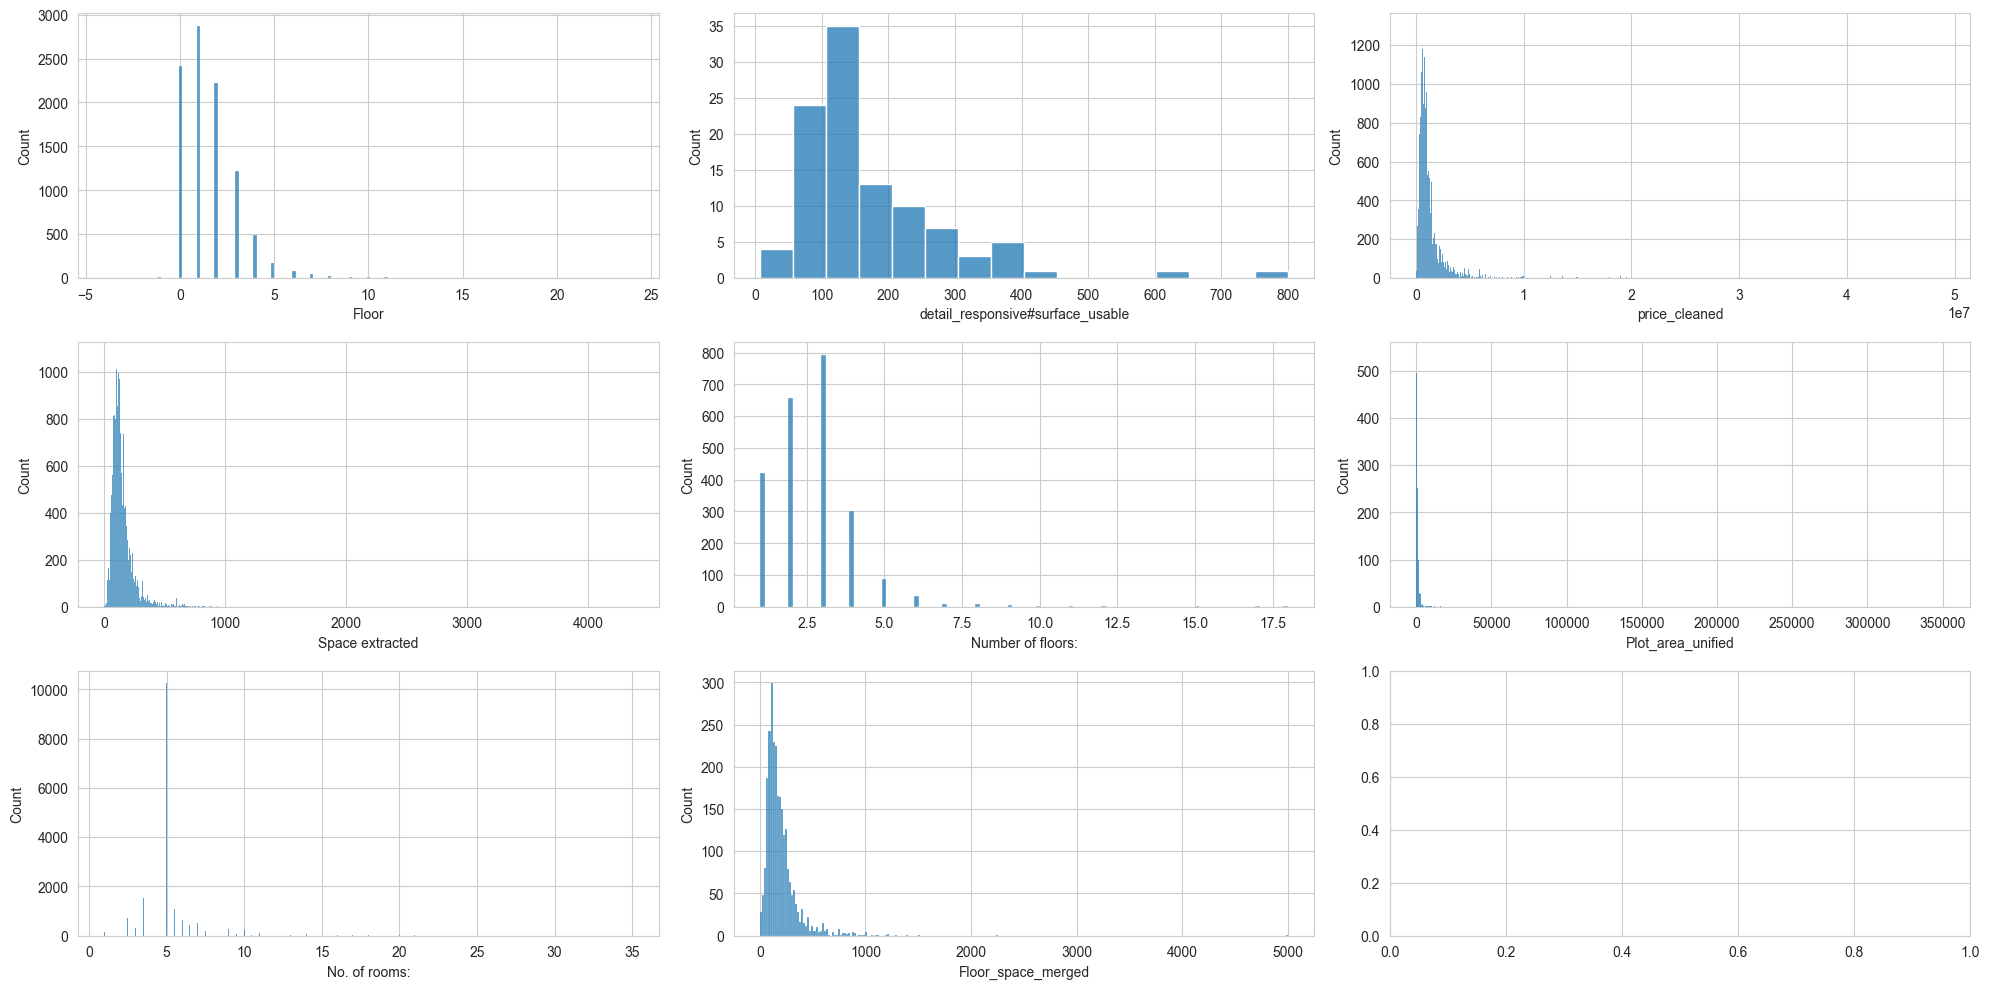

In [76]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # 2 Zeilen, 4 Spalten
axes = axes.flatten()  # Flache Liste für einfacheren Zugriff

sns.histplot(data=df_clean, x="Floor", ax=axes[0]) #Welches Stockwerk
sns.histplot(data=df_clean, x="detail_responsive#surface_usable", ax=axes[1]) # Nutzfläche
sns.histplot(data=df_clean, x="price_cleaned", ax=axes[2]) #Preis
sns.histplot(data=df_clean, x="Space extracted", ax=axes[3]) #Wohnfläche
sns.histplot(data=df_clean, x="Number of floors:", ax=axes[4]) # Wir gedropt
sns.histplot(data=df_clean, x="Plot_area_unified", ax=axes[5]) # Grundstücksfläche
sns.histplot(data=df_clean, x="No. of rooms:", ax=axes[6])
sns.histplot(data=df_clean, x="Floor_space_merged", ax=axes[7]) #Stockwerkfläche

plt.tight_layout()
plt.show()

## Verteilungen Boxplot

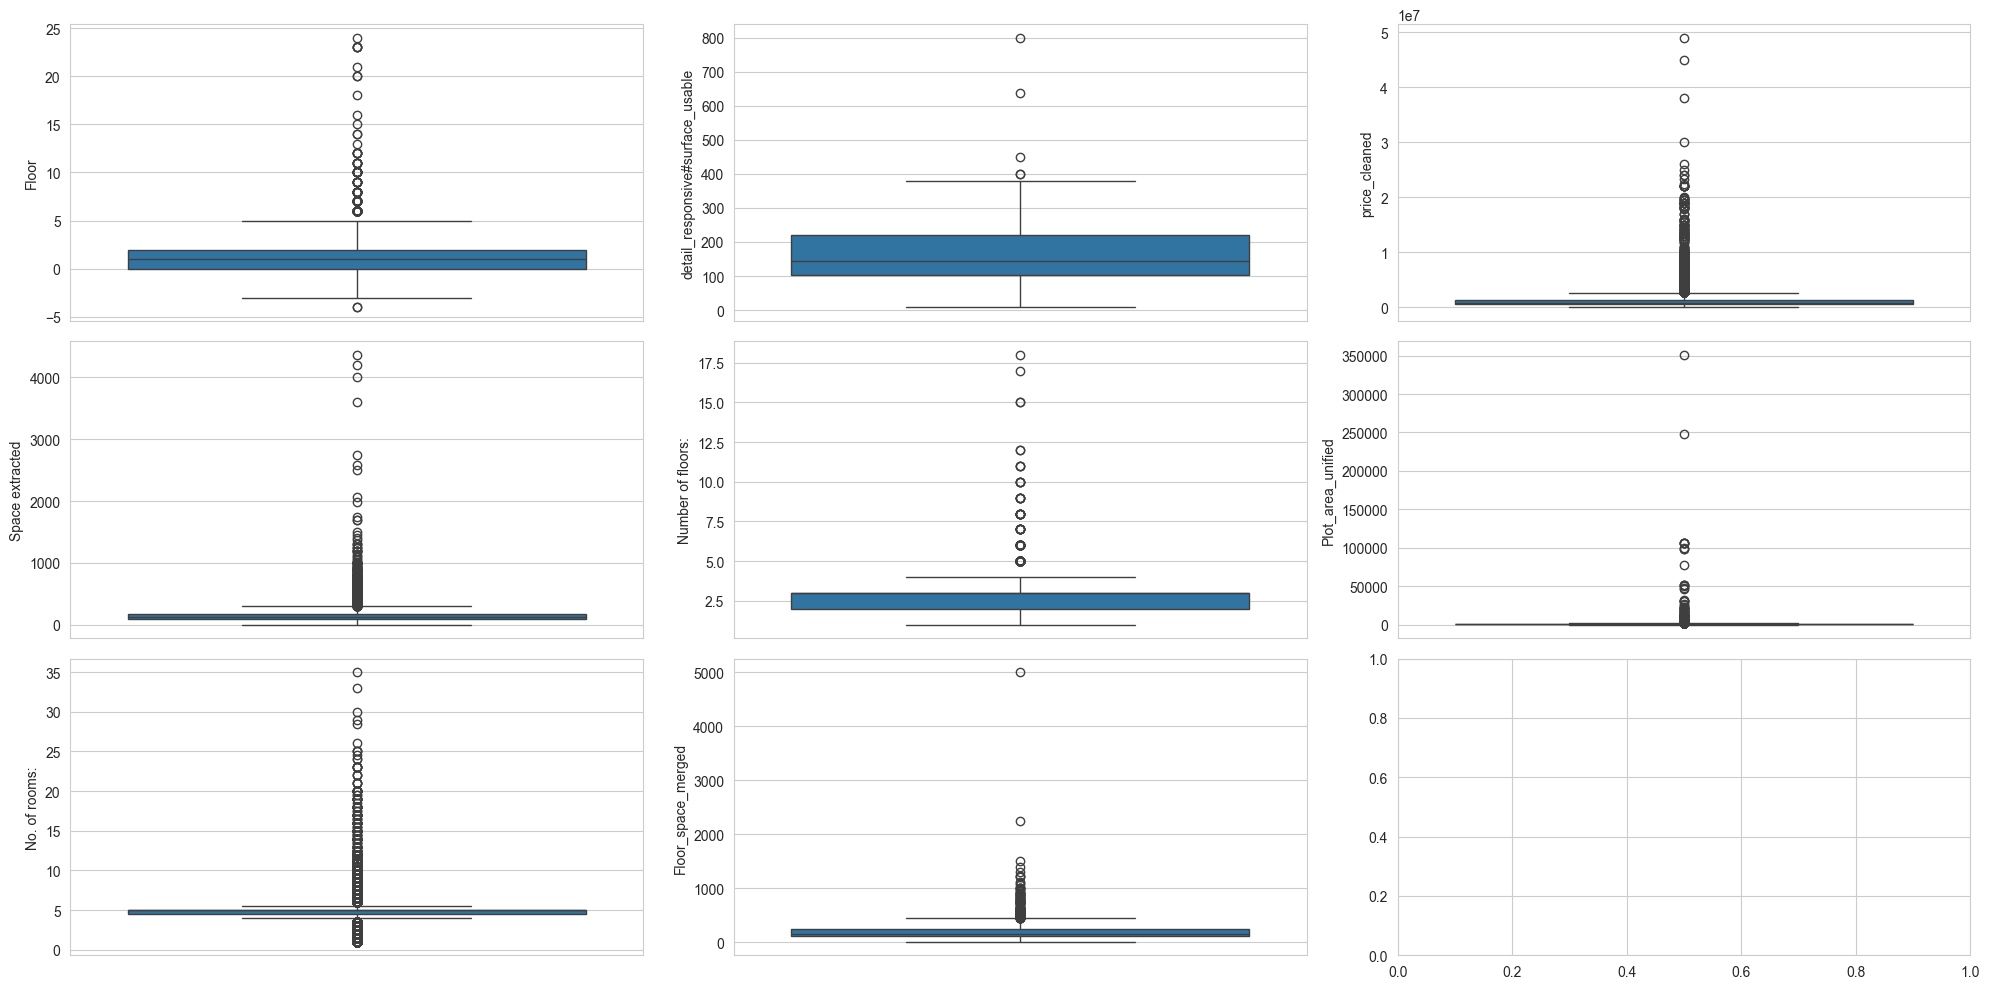

In [77]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # 2 Zeilen, 4 Spalten
axes = axes.flatten()  # Flache Liste für einfacheren Zugriff

sns.boxplot(data=df_clean, y="Floor", ax=axes[0]) #Welches Stockwerk
sns.boxplot(data=df_clean, y="detail_responsive#surface_usable", ax=axes[1]) # Nutzfläche
sns.boxplot(data=df_clean, y="price_cleaned", ax=axes[2]) #Preis
sns.boxplot(data=df_clean, y="Space extracted", ax=axes[3]) #Wohnfläche
sns.boxplot(data=df_clean, y="Number of floors:", ax=axes[4])
sns.boxplot(data=df_clean, y="Plot_area_unified", ax=axes[5]) # Grundstücksfläche
sns.boxplot(data=df_clean, y="No. of rooms:", ax=axes[6])
sns.boxplot(data=df_clean, y="Floor_space_merged", ax=axes[7]) #Stockwerkfläche

plt.tight_layout()
plt.show()

## Floor

In [78]:
df_clean.loc[df_clean["Floor"] >= 50]

Empty DataFrame
Columns: [Availability, Floor, detail_responsive#surface_usable, Floor_space_merged, ForestDensityL, ForestDensityM, ForestDensityS, NoisePollutionRailwayL, NoisePollutionRailwayM, NoisePollutionRailwayS, NoisePollutionRoadL, NoisePollutionRoadM, NoisePollutionRoadS, PopulationDensityL, PopulationDensityM, PopulationDensityS, RiversAndLakesL, RiversAndLakesM, RiversAndLakesS, WorkplaceDensityL, WorkplaceDensityM, WorkplaceDensityS, distanceToTrainStation, gde_area_agriculture_percentage, gde_area_forest_percentage, gde_area_nonproductive_percentage, gde_area_settlement_percentage, gde_average_house_hold, gde_empty_apartments, gde_foreigners_percentage, gde_new_homes_per_1000, gde_politics_bdp, gde_politics_cvp, gde_politics_evp, gde_politics_fdp, gde_politics_glp, gde_politics_gps, gde_politics_pda, gde_politics_rights, gde_politics_sp, gde_politics_svp, gde_pop_per_km2, gde_population, gde_private_apartments, gde_social_help_quota, gde_tax, gde_workers_sector1, gde_workers_sector2, gde_workers_sector3, gde_workers_total, price_cleaned, Space extracted, type_unified, Plot_area_unified, No. of rooms:, Last refurbishment:, Year built:, Number of floors:, region_group]
Index: []

[0 rows x 59 columns]

In [79]:
df_clean.loc[df_clean["Floor"]<= 50]

Availability  Floor  detail_responsive#surface_usable  \
0       On request    4.0                               NaN   
2      Immediately    2.0                               NaN   
4       On request    0.0                               NaN   
7       On request    3.0                               NaN   
10      On request    6.0                               NaN   
...            ...    ...                               ...   
22467          NaN    1.0                               NaN   
22468          NaN    1.0                               NaN   
22469          NaN    2.0                               NaN   
22470          NaN    3.0                               NaN   
22475          NaN    3.0                               NaN   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
0                     NaN        0.511176        0.286451        0.090908   
2                     NaN        0.163362        0.095877        0.001911   
4                     NaN        0.333865        0.279276        0.145835   
7                     NaN        0.051334        0.000000        0.000000   
10                    NaN        0.347705        0.339286        0.146352   
...                   ...             ...             ...             ...   
22467                 NaN        0.354054        0.281631        0.219409   
22468                 NaN        0.194666        0.096207        0.018223   
22469                 NaN        0.383943        0.305412        0.225509   
22470                 NaN        0.383943        0.305412        0.225509   
22475                 NaN        0.001156        0.000000        0.000000   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
0                    0.000000                0.000000                0.000000   
2                    0.000000                0.000000                0.000000   
4                    0.000000                0.000000                0.000000   
7                    0.048450                0.057053                0.051848   
10                   0.000000                0.000000                0.000000   
...                       ...                     ...                     ...   
22467                0.000000                0.000000                0.000000   
22468                0.000000                0.000000                0.000000   
22469                0.000000                0.000000                0.000000   
22470                0.000000                0.000000                0.000000   
22475                0.002336                0.000000                0.000000   

       ...  gde_workers_total  price_cleaned  Space extracted  type_unified  \
0      ...              331.0      1150000.0            100.0     penthouse   
2      ...            33493.0       720000.0             93.0     penthouse   
4      ...             1355.0       995000.0            142.0          flat   
7      ...            33493.0       590000.0              NaN          flat   
10     ...            33493.0       695000.0             97.0          flat   
...    ...                ...            ...              ...           ...   
22467  ...             2857.0      1060000.0            120.0          flat   
22468  ...              479.0       910000.0            120.0          flat   
22469  ...             9634.0       690000.0            116.0          flat   
22470  ...             9634.0       795000.0            132.0          flat   
22475  ...             7181.0       345000.0             74.0     penthouse   

       Plot_area_unified  No. of rooms:  Last refurbishment:  Year built:  \
0                    NaN            5.0                  NaN          NaN   
2                    NaN            5.0                  NaN          NaN   
4                    NaN            5.0                  NaN          NaN   
7                    NaN            5.0                  NaN          NaN   
10               

<Axes: ylabel='Floor'>

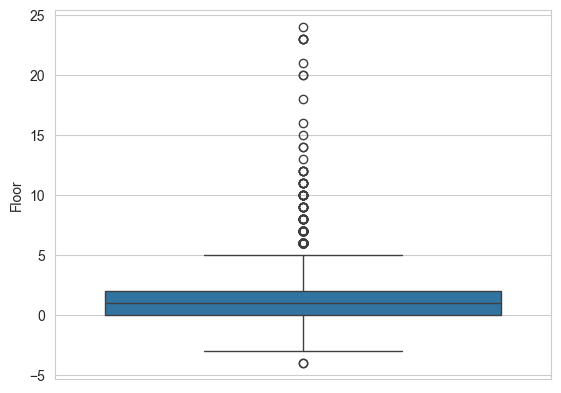

In [80]:
sns.boxplot(df_clean.loc[df_clean["Floor"]<= 50]["Floor"])

Spalten suchen die die Fehler Imputieren können zum Vergleich der Roche-Turm hat 41 Etagen

In [81]:
df.loc[df["Floor"] == "999"][["features","description","description_detailed", "details"]].head()

features  \
13475  Balcony / Terrace\tWheelchair access\tGarage\t...   
14062                                                NaN   
14083                                           Elevator   
14087                                                NaN   
14088                                                NaN   

                                             description  \
13475  Réf.: 3046dLCMP - Prilly - Superbe appartement...   
14062  Ref: 2920MFDV Bel appartement en duplex en der...   
14083  Réf.: 3078PO Dans un magnifique immeuble résid...   
14087  BDN205: Situé dans le quartier historique de L...   
14088  BDN206: Situé dans le quartier historique de L...   

                                    description_detailed details  
13475  Description\n"Nouvelle Promotion avec vue sur ...     NaN  
14062  Description\n"Bel appartement 4,5 pièces duple...     NaN  
14083  Description\n"Splendide Appartement en attique...     NaN  
14087  Description\n""Chalet Boule de Neige" - Incroy...     NaN  
14088  Description\n""Chalet Boule de Neige" - Magnif...     NaN

### Floor pro Gebäudetype

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'penthouse'),
  Text(1, 0, 'terrace-house'),
  Text(2, 0, 'detached-house'),
  Text(3, 0, 'flat'),
  Text(4, 0, 'stepped-house'),
  Text(5, 0, 'farmhouse'),
  Text(6, 0, 'stepped-apartment'),
  Text(7, 0, 'duplex-maisonette'),
  Text(8, 0, 'semi-detached-house'),
  Text(9, 0, 'attic-flat'),
  Text(10, 0, 'loft'),
  Text(11, 0, 'chalet'),
  Text(12, 0, 'villa'),
  Text(13, 0, 'attic-room'),
  Text(14, 0, 'secondary-suite'),
  Text(15, 0, 'detached-secondary-suite'),
  Text(16, 0, 'studio'),
  Text(17, 0, 'castle'),
  Text(18, 0, 'furnished-residential-property'),
  Text(19, 0, 'rustico'),
  Text(20, 0, 'single-room')])

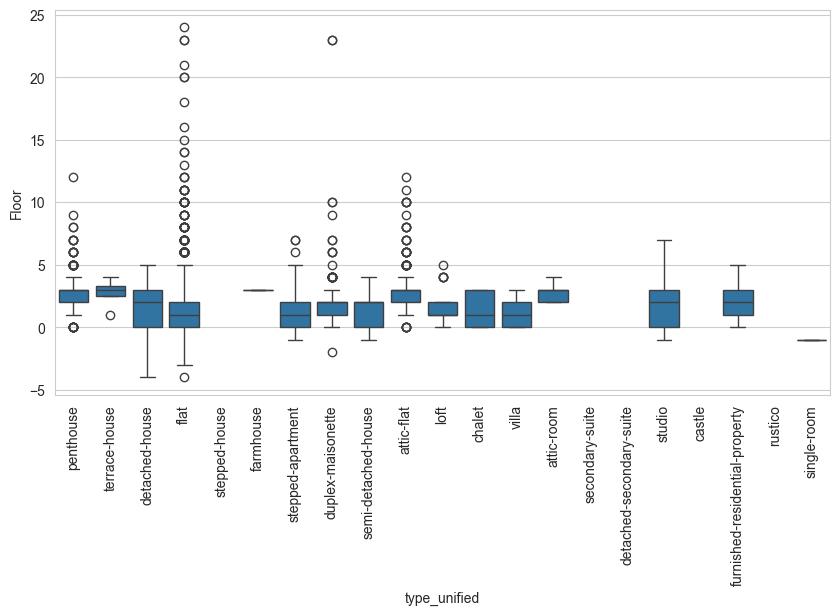

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x="type_unified", y="Floor")
plt.xticks(rotation=90)

In [83]:
df_clean.loc[df_clean["type_unified"] == "chalet"][["Floor","Number of floors:"]]


Floor  Number of floors:
420      NaN                NaN
1063     NaN                NaN
1723     NaN                NaN
1914     NaN                NaN
2023     NaN                NaN
...      ...                ...
21959    NaN                NaN
21967    NaN                3.0
22191    NaN                NaN
22308    NaN                2.0
22355    NaN                2.0

[655 rows x 2 columns]

## Preis untersuchen

In [84]:
df_clean.loc[df_clean["price_cleaned"] >= 10_000_000]

Availability  Floor  detail_responsive#surface_usable  \
2096   Immediately    NaN                               NaN   
2158   Immediately    NaN                               NaN   
3687    On request    NaN                               NaN   
3718   Immediately    NaN                               NaN   
3723    On request    NaN                               NaN   
...            ...    ...                               ...   
21107          NaN    NaN                               NaN   
21108          NaN    NaN                               NaN   
21127          NaN    NaN                               NaN   
21636          NaN    NaN                               NaN   
22041          NaN    NaN                               NaN   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
2096                  NaN        0.147549        0.073046        0.100038   
2158                  NaN        0.302012        0.141026        0.001979   
3687                  NaN        0.111096        0.043290        0.000000   
3718                  NaN        0.111096        0.043290        0.000000   
3723                  NaN        0.111096        0.043290        0.000000   
...                   ...             ...             ...             ...   
21107                 NaN        0.185934        0.185467        0.117983   
21108                 NaN        0.334473        0.258408        0.100572   
21127                 NaN        0.334473        0.258408        0.100572   
21636                 NaN        0.728738        0.637685        0.555986   
22041                 NaN        0.070018        0.005604        0.000000   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
2096                      0.0                     0.0                     0.0   
2158                      0.0                     0.0                     0.0   
3687                      0.0                     0.0                     0.0   
3718                      0.0                     0.0                     0.0   
3723                      0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
21107                     0.0                     0.0                     0.0   
21108                     0.0                     0.0                     0.0   
21127                     0.0                     0.0                     0.0   
21636                     0.0                     0.0                     0.0   
22041                     0.0                     0.0                     0.0   

       ...  gde_workers_total  price_cleaned  Space extracted    type_unified  \
2096   ...             6695.0     14700000.0            939.0          chalet   
2158   ...             6695.0     14300000.0            869.0          chalet   
3687   ...             1887.0     18000000.0            510.0  detached-house   
3718   ...             1887.0     18000000.0            491.0  detached-house   
3723   ...             1887.0     15500000.0            450.0  detached-house   
...    ...                ...            ...              ...             ...   
21107  ...             6695.0     10000000.0            430.0            flat   
21108  ...             6695.0     14700000.0            939.0          chalet   
21127  ...             6695.0     14300000.0            869.0          chalet   
21636  ...             4593.0     12000000.0              NaN          chalet   
22041  ...             2711.0     15000000.0           3600.0  detached-house   

       Plot_area_unified  No. of rooms:  Last refurbishment:  Year built:  \
2096                 NaN           10.0                  NaN          NaN   
2158                 NaN           10.0                  NaN          NaN   
3687              2200.0           11.0                  NaN          NaN   
3718              2111.0           11.0                  NaN          

## Nutzfläche untersuchen

In [85]:
df_clean.loc[df_clean["detail_responsive#surface_usable"] >= 400]

Availability  Floor  detail_responsive#surface_usable  \
414    Immediately    NaN                             800.0   
6822    On request    NaN                             400.0   
8732    On request    NaN                             636.0   
10811   On request    NaN                             450.0   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
414                   NaN        0.362640        0.188580        0.013473   
6822                  NaN        0.099849        0.038114        0.000000   
8732                  NaN        0.696179        0.585166        0.368709   
10811                 NaN        0.032747        0.000000        0.000000   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
414                  0.000000                0.000000                0.000000   
6822                 0.116871                0.134822                0.041328   
8732                 0.000000                0.000000                0.000000   
10811                0.001111                0.000000                0.000000   

       ...  gde_workers_total  price_cleaned  Space extracted  \
414    ...             1509.0       795000.0            200.0   
6822   ...             2676.0      1890000.0            250.0   
8732   ...              147.0       375000.0            520.0   
10811  ...             6223.0      4300000.0            360.0   

              type_unified  Plot_area_unified  No. of rooms:  \
414         detached-house              980.0            7.0   
6822   semi-detached-house              661.0            9.0   
8732        detached-house              150.0            5.0   
10811       detached-house             2893.0           10.0   

       Last refurbishment:  Year built:  Number of floors:  region_group  
414                    NaN          NaN                NaN          65.0  
6822                   NaN          NaN                NaN          38.0  
8732                   NaN          NaN                NaN          55.0  
10811                  NaN          NaN                NaN          69.0  

[4 rows x 59 columns]

## Number of floors:

In [86]:
df_clean.loc[df_clean["Number of floors:"] >= 5]

Availability  Floor  detail_responsive#surface_usable  \
13390          NaN    2.0                               NaN   
13417          NaN    4.0                               NaN   
13420          NaN    2.0                               NaN   
13426          NaN    2.0                               NaN   
13434          NaN    NaN                               NaN   
...            ...    ...                               ...   
22294          NaN    4.0                               NaN   
22305          NaN    NaN                               NaN   
22374          NaN    NaN                               NaN   
22429          NaN    0.0                               NaN   
22469          NaN    2.0                               NaN   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
13390                 NaN        0.001464        0.000000        0.000000   
13417                 NaN        0.024808        0.028412        0.000000   
13420                 NaN        0.024808        0.028412        0.000000   
13426                 NaN        0.480199        0.338264        0.255446   
13434                 NaN        0.001464        0.000000        0.000000   
...                   ...             ...             ...             ...   
22294                 NaN        0.062591        0.000000        0.000000   
22305                 NaN        0.403515        0.224642        0.112265   
22374                 NaN        0.032303        0.000000        0.000000   
22429                 NaN        0.149558        0.032521        0.000000   
22469                 NaN        0.383943        0.305412        0.225509   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
13390                0.019329                0.000000                     0.0   
13417                0.000000                0.000000                     0.0   
13420                0.000000                0.000000                     0.0   
13426                0.000000                0.000000                     0.0   
13434                0.019329                0.000000                     0.0   
...                       ...                     ...                     ...   
22294                0.000000                0.000000                     0.0   
22305                0.004258                0.000000                     0.0   
22374                0.025076                0.000000                     0.0   
22429                0.043411                0.005842                     0.0   
22469                0.000000                0.000000                     0.0   

       ...  gde_workers_total  price_cleaned  Space extracted    type_unified  \
13390  ...           117705.0      1275000.0            111.0            flat   
13417  ...           117705.0      1490000.0            103.0      attic-flat   
13420  ...           117705.0      1920000.0            175.0            flat   
13426  ...           117705.0       795000.0             72.0            flat   
13434  ...           117705.0      1070000.0            106.0            loft   
...    ...                ...            ...              ...             ...   
22294  ...             4821.0      2050000.0            287.0            flat   
22305  ...              219.0      1600000.0            500.0  detached-house   
22374  ...            70633.0      3760000.0            400.0  detached-house   
22429  ...             9383.0      1580000.0            100.0            flat   
22469  ...             9634.0       690000.0            116.0            flat   

       Plot_area_unified  No. of rooms:  Last refurbishment:  Year built:  \
13390                NaN            4.5               2014.0       2014.0   
13417                NaN            4.5               1980.0       1850.0   
13420                NaN            5.5               1980.0       1850.0   
13426                NaN            3.5                  NaN          

## Grundstücksflächen untersuchen

In [87]:
df.loc[df["Plot_area_unified"] >= 50_000]

Municipality Living space   Plot area Floor space Availability  \
715                 Boswil       305 m²   50,517 m²         NaN   On request   
5958              Kienberg       194 m²  247,330 m²      220 m²  Immediately   
7445            Centovalli       721 m²   77,314 m²         NaN   On request   
10154             Grandson       750 m²  106,494 m²         NaN   On request   
10157             Grandson       750 m²   98,844 m²         NaN   On request   
10159             Grandson       750 m²  106,494 m²         NaN   On request   
10160             Grandson       750 m²  106,494 m²         NaN  Immediately   
10472      Bourg-en-Lavaux      1300 m²  152,000 m²     2800 m²  Immediately   
10719                 Yens       635 m²   51,355 m²         NaN  Immediately   
11676             Bellwald       165 m²  350,917 m²      165 m²  Immediately   
12827                  Zug       280 m²   77,000 m²         NaN   On request   
13979                 Yens          NaN         NaN         NaN          NaN   
13980                 Yens          NaN         NaN         NaN          NaN   
14014                Luins          NaN         NaN         NaN          NaN   
15320    Yverdon-les-Bains          NaN         NaN         NaN          NaN   
15365             Grandson          NaN         NaN         NaN          NaN   
15366             Grandson          NaN         NaN         NaN          NaN   
15367             Grandson          NaN         NaN         NaN          NaN   

                                 location  \
715     Alte Muristrasse 35623 Boswil, AG   
5958   Stücklermattweg 84468 Kienberg, SO   
7445                    6658 Borgnone, TI   
10154                   1422 Grandson, VD   
10157                   1422 Grandson, VD   
10159                   1422 Grandson, VD   
10160                   1422 Grandson, VD   
10472                      1096 Cully, VD   
10719                       1169 Yens, VD   
11676                   3997 Bellwald, VS   
12827                        6300 Zug, ZG   
13979                           1169 Yens   
13980                           1169 Yens   
14014                          1184 Luins   
15320              1400 Yverdon-les-Bains   
15365                       1422 Grandson   
15366                       1422 Grandson   
15367                       1422 Grandson   

                                             description  \
715    9 rooms, 305 m²«RESERVIERT: REITSPORTIMMOBILIE...   
5958   5.5 rooms, 194 m²«2 Doppel – Einfamilienhäuser...   
7445   14 rooms, 721 m²«Einzigartiges Anwesen eines b...   
10154  17 rooms, 750 m²«Domaine majestueux digne d un...   
10157  17.5 rooms, 750 m²«La vie de château exception...   
10159  17 rooms, 750 m²«La vie de château au coeur d ...   
10160  17 rooms, 750 m²«Superbe maison de maître du 1...   
10472  20 rooms, 1300 m²«Domaine d Aucrêt, Bourg-en-L...   
10719  14 rooms, 635 m²«Magnifique propriété familial...   
11676  5.5 rooms, 165 m²«Neubau Einfamilienhäuser Bel...   
12827  9.5 rooms, 280 m²«PROFESSIONELLES REITSPORTZEN...   
13979  L'agence immobilière Bauma / Scheuchzer Immobi...   
13980  Nichée dans un écrin de verdure et au calme, c...   
14014  Nous vous présentons l'opportunité d'acquérir ...   
15320  Cette prestigieuse Propriété datant du 18 -ème...   
15365  Au domaine de La Pastorale, la sérénité des li...   
15366  Envie d'une escapade historique? C'est une réa...   
15367  Parfaitement discrète derrière un mur d'encein...   

                                    detailed_description  \
715    DescriptionIm Herzen von Boswil an zentraler u...   
5958   DescriptionFestpreisgarantie mit individueller...   
7445   DescriptionDiese künstlerische Liegenschaft ge...   
10154  DescriptionEnvie d une escapade historique? C ...   
10157  DescriptionAu domaine de La Pastorale, la séré...   
10159  DescriptionLe domaine de La Pastorale, compren...   
10160  DescriptionParfaitement discrète derrière un m...   
10472  Descripti

## Wohnfläche

In [88]:
df_clean.loc[df_clean["Space extracted"] >= 50]

Availability  Floor  detail_responsive#surface_usable  \
0       On request    4.0                               NaN   
1       On request    NaN                               NaN   
2      Immediately    2.0                               NaN   
3       On request    NaN                               NaN   
4       On request    0.0                               NaN   
...            ...    ...                               ...   
22476          NaN    NaN                               NaN   
22477          NaN    NaN                               NaN   
22478          NaN    NaN                               NaN   
22479          NaN    NaN                               NaN   
22480          NaN    NaN                               NaN   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
0                     NaN        0.511176        0.286451        0.090908   
1                   242.0        0.511176        0.286451        0.090908   
2                     NaN        0.163362        0.095877        0.001911   
3                   257.0        0.511176        0.286451        0.090908   
4                     NaN        0.333865        0.279276        0.145835   
...                   ...             ...             ...             ...   
22476                 NaN        0.495715        0.385885        0.097278   
22477                 NaN        0.000000        0.000000        0.000000   
22478                 NaN        0.000000        0.000000        0.000000   
22479                 NaN        0.410843        0.151363        0.038351   
22480                 NaN        0.284828        0.153670        0.113892   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
0                    0.000000                0.000000                0.000000   
1                    0.000000                0.000000                0.000000   
2                    0.000000                0.000000                0.000000   
3                    0.000000                0.000000                0.000000   
4                    0.000000                0.000000                0.000000   
...                       ...                     ...                     ...   
22476                0.000000                0.000000                0.000000   
22477                0.000000                0.000000                0.000000   
22478                0.052609                0.083575                0.027766   
22479                0.000000                0.000000                0.000000   
22480                0.020078                0.020966                0.010568   

       ...  gde_workers_total  price_cleaned  Space extracted  \
0      ...              331.0      1150000.0            100.0   
1      ...              331.0      1420000.0            156.0   
2      ...            33493.0       720000.0             93.0   
3      ...              331.0      1430000.0            154.0   
4      ...             1355.0       995000.0            142.0   
...    ...                ...            ...              ...   
22476  ...             7565.0       475000.0            102.0   
22477  ...             4942.0      1490000.0            250.0   
22478  ...             4942.0      1450000.0            240.0   
22479  ...             1063.0      1290000.0            175.0   
22480  ...              766.0       780000.0            220.0   

            type_unified  Plot_area_unified  No. of rooms:  \
0              penthouse                NaN            5.0   
1          terrace-house              222.0            5.0   
2              penthouse                NaN            5.0   
3         detached-house              370.0            5.0   
4                   flat                NaN            5.0   
...                  ...                ...            ...   
22476     detached-house              140.0            4.5   
22477  stepped-apartment                NaN            8.5   
22478     de

## Number of apartments untersuchen

In [89]:
df_clean.loc[df_clean["Number of apartments:"] >= 50]

KeyError: 'Number of apartments:'

## Gebäude mit über 15 Räume untersuchen

In [90]:
df.loc[df["No. of rooms:"] >= 15]

Municipality Living space Plot area Floor space Availability  \
13422                Lausanne          NaN       NaN         NaN          NaN   
13683    Le Mont-sur-Lausanne          NaN       NaN         NaN          NaN   
13728                 Puidoux          NaN       NaN         NaN          NaN   
13749                Chexbres          NaN       NaN         NaN          NaN   
13750                Chexbres          NaN       NaN         NaN          NaN   
...                       ...          ...       ...         ...          ...   
21345                Eischoll          NaN       NaN         NaN          NaN   
22034                Horriwil          NaN       NaN         NaN          NaN   
22049                    Suhr          NaN       NaN         NaN          NaN   
22244                  Lugano          NaN       NaN         NaN          NaN   
22305                 Fideris          NaN       NaN         NaN          NaN   

                                             location  \
13422                                   1005 Lausanne   
13683  Chemin de la Naz 39, 1052 Le Mont-sur-Lausanne   
13728                                    1070 Puidoux   
13749                                   1071 Chexbres   
13750                                   1071 Chexbres   
...                                               ...   
21345                                   3943 Eischoll   
22034                Oekingenstrasse 9, 4557 Horriwil   
22049                                       5034 Suhr   
22244                Piazza Molino Nuovo, 6900 Lugano   
22305                      Alte Gasse 3, 7235 Fideris   

                                             description  \
13422  Situé à seulement 5 minutes de Lausanne, plus ...   
13683  La maison, avec affectation mixte, a été entiè...   
13728  Rare à la vente immeuble de rendement en viage...   
13749  Implantée au coeur des vignes à Chexbres, sur ...   
13750  -One of the most beautiful properties in the r...   
...                                                  ...   
21345  Im Untergeschoss gelangt man durch ein kleines...   
22034                                                NaN   
22049                                                NaN   
22244                                                NaN   
22305                                                NaN   

                                    detailed_description  \
13422  Description\n"Spacieuse propriété de 423 m²"\n...   
13683  Description\n"Maison de maître avec boxes à ch...   
13728  Description\n"Rare à la vente immeuble de rend...   
13749  Description\n"Exceptionnelle propriété de maît...   
13750  Description\n"Sumptuous property with breathta...   
...                                                  ...   
21345  Description\n"LIEBHABER-OBJEKT AUF DEM SONNENP...   
22034  Description\n"Schönes Bauernhaus (nicht unter ...   
22049  Description\n"AUSSERGEWÖHNLICHES MFH ZUM LEBEN...   
22244  Description\n"Palazzina a reddito nel cuore di...   
22305  Description\n"Mehrfamilienhaus in Fideris an b...   

                                          url table  ...  \
13422  https://www.homegate.ch/buy/3001899549   NaN  ...   
13683  https://www.homegate.ch/buy/3001026396   NaN  ...   
13728  https://www.homegate.ch/buy/3001983062   NaN  ...   
13749  https://www.homegate.ch/buy/3001121171   NaN  ...   
13750  https://www.homegate.ch/buy/3002024959   NaN  ...   
...                                       ...   ...  ...   
21345  https://www.homegate.ch/buy/3002036022   NaN  ...   
22034  https://www.homegate.ch/buy/3001238386   NaN  ...   
22049  https://www.homegate.ch/buy/3002036911   NaN  ...   
22244  https://www.homegate.ch/buy/3001466125   NaN  ...   
22305  https://www.homegate.ch/buy/3002030620   NaN  ...   

                                                features  \
13422                       Parking space\tSwimming pool   
13683                                  Balcony / Terrace   
13728           

## Floor_space_merged

In [91]:
df_clean.loc[df_clean["Floor_space_merged"] >= 2]

Availability  Floor  detail_responsive#surface_usable  \
1       On request    NaN                               NaN   
3       On request    NaN                               NaN   
5       On request    NaN                               NaN   
12      On request    NaN                               NaN   
25      On request    NaN                               NaN   
...            ...    ...                               ...   
13284   On request    NaN                               NaN   
13293   On request    NaN                               NaN   
13307   On request    7.0                               NaN   
13317  Immediately    2.0                               NaN   
13353  Immediately    NaN                               NaN   

       Floor_space_merged  ForestDensityL  ForestDensityM  ForestDensityS  \
1                   242.0        0.511176        0.286451        0.090908   
3                   257.0        0.511176        0.286451        0.090908   
5                   220.0        0.190581        0.162838        0.034759   
12                  132.0        0.156964        0.074427        0.000000   
25                  267.0        0.578924        0.586244        0.450791   
...                   ...             ...             ...             ...   
13284               172.0        0.276932        0.061484        0.000000   
13293               228.0        0.276932        0.061484        0.000000   
13307                79.0        0.029197        0.000000        0.000000   
13317               136.0        0.120618        0.054523        0.000000   
13353               140.0        0.249841        0.112081        0.000000   

       NoisePollutionRailwayL  NoisePollutionRailwayM  NoisePollutionRailwayS  \
1                    0.000000                0.000000                0.000000   
3                    0.000000                0.000000                0.000000   
5                    0.000000                0.000000                0.000000   
12                   0.066080                0.121472                0.112295   
25                   0.000000                0.000000                0.000000   
...                       ...                     ...                     ...   
13284                0.014968                0.020734                0.000000   
13293                0.014968                0.020734                0.000000   
13307                0.000000                0.000000                0.000000   
13317                0.000000                0.000000                0.000000   
13353                0.000000                0.000000                0.000000   

       ...  gde_workers_total  price_cleaned  Space extracted  \
1      ...              331.0      1420000.0            156.0   
3      ...              331.0      1430000.0            154.0   
5      ...              966.0      2160000.0            190.0   
12     ...            33493.0      1200000.0            152.0   
25     ...             1401.0       990000.0            124.0   
...    ...                ...            ...              ...   
13284  ...              654.0      1180000.0            129.0   
13293  ...              654.0      1410000.0            153.0   
13307  ...            11124.0       695000.0             72.0   
13317  ...            11124.0       890000.0            118.0   
13353  ...              857.0      1465000.0            145.0   

              type_unified  Plot_area_unified  No. of rooms:  \
1            terrace-house              222.0            5.0   
3           detached-house              370.0            5.0   
5           detached-house             1063.0            5.0   
12          detached-house              839.0            5.0   
25               farmhouse             4605.0            6.0   
...                    ...                ...            ...   
13284  semi-detached-house              245.0            5.0   
13293  semi-detached-house              233.0            5

# Visualisierung der Daten mit bereits bereinigten Daten vs Price
Es sind nur noch Spalten vorhanden die Denis in EDA_dsa oder hier bereits analysiert wurden.

In [92]:
df_clean = df_clean.loc[df_clean["price_cleaned"] > 15_000]

In [93]:
df_clean.head()

Availability  Floor  detail_responsive#surface_usable  Floor_space_merged  \
0   On request    4.0                               NaN                 NaN   
1   On request    NaN                               NaN               242.0   
2  Immediately    2.0                               NaN                 NaN   
3   On request    NaN                               NaN               257.0   
4   On request    0.0                               NaN                 NaN   

   ForestDensityL  ForestDensityM  ForestDensityS  NoisePollutionRailwayL  \
0        0.511176        0.286451        0.090908                     0.0   
1        0.511176        0.286451        0.090908                     0.0   
2        0.163362        0.095877        0.001911                     0.0   
3        0.511176        0.286451        0.090908                     0.0   
4        0.333865        0.279276        0.145835                     0.0   

   NoisePollutionRailwayM  NoisePollutionRailwayS  ...  gde_workers_total  \
0                     0.0                     0.0  ...              331.0   
1                     0.0                     0.0  ...              331.0   
2                     0.0                     0.0  ...            33493.0   
3                     0.0                     0.0  ...              331.0   
4                     0.0                     0.0  ...             1355.0   

   price_cleaned  Space extracted    type_unified  Plot_area_unified  \
0      1150000.0            100.0       penthouse                NaN   
1      1420000.0            156.0   terrace-house              222.0   
2       720000.0             93.0       penthouse                NaN   
3      1430000.0            154.0  detached-house              370.0   
4       995000.0            142.0            flat                NaN   

   No. of rooms:  Last refurbishment:  Year built:  Number of floors:  \
0            5.0                  NaN          NaN                NaN   
1            5.0                  NaN          NaN                NaN   
2            5.0                  NaN          NaN                NaN   
3            5.0                  NaN          NaN                NaN   
4            5.0                  NaN          NaN                NaN   

   region_group  
0          53.0  
1          53.0  
2          53.0  
3          53.0  
4          53.0  

[5 rows x 59 columns]

In [94]:
test = df_clean[["details","Space extracted"]]
test[test["Space extracted"].isna()]

KeyError: "['details'] not in index"

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20787 entries, 0 to 22480
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Availability                       12029 non-null  object 
 1   Floor                              9609 non-null   float64
 2   detail_responsive#surface_usable   104 non-null    float64
 3   Floor_space_merged                 2591 non-null   float64
 4   ForestDensityL                     20787 non-null  float64
 5   ForestDensityM                     20787 non-null  float64
 6   ForestDensityS                     20787 non-null  float64
 7   NoisePollutionRailwayL             20787 non-null  float64
 8   NoisePollutionRailwayM             20787 non-null  float64
 9   NoisePollutionRailwayS             20787 non-null  float64
 10  NoisePollutionRoadL                20787 non-null  float64
 11  NoisePollutionRoadM                20787 non-null  float64


In [96]:
df_clean.describe(include=["Int64","float64"])

Floor  detail_responsive#surface_usable  Floor_space_merged  \
count  9609.000000                        104.000000         2591.000000   
mean      1.594963                        175.807692          196.978773   
std       1.643104                        118.165926          181.115318   
min      -4.000000                          8.000000            4.000000   
25%       0.000000                        102.750000          106.000000   
50%       1.000000                        143.000000          154.000000   
75%       2.000000                        220.000000          239.000000   
max      24.000000                        800.000000         5000.000000   

       ForestDensityL  ForestDensityM  ForestDensityS  NoisePollutionRailwayL  \
count    20787.000000    20787.000000    20787.000000            20787.000000   
mean         0.187824        0.123426        0.078570                0.013193   
std          0.199869        0.179130        0.163266                0.025736   
min          0.000000        0.000000        0.000000                0.000000   
25%          0.023201        0.000000        0.000000                0.000000   
50%          0.114693        0.029804        0.000000                0.000000   
75%          0.296261        0.188308        0.048546                0.015252   
max          0.896966        0.999453        1.000000                0.258665   

       NoisePollutionRailwayM  NoisePollutionRailwayS  NoisePollutionRoadL  \
count            20787.000000            20787.000000         20787.000000   
mean                 0.012797                0.009738             0.237286   
std                  0.032967                0.039527             0.124958   
min                  0.000000                0.000000             0.000000   
25%                  0.000000                0.000000             0.144513   
50%                  0.000000                0.000000             0.224378   
75%                  0.000442                0.000000             0.313551   
max                  0.391704                0.476965             0.638989   

       ...  gde_workers_sector3  gde_workers_total  price_cleaned  \
count  ...         20787.000000       20787.000000   2.078700e+04   
mean   ...          8195.768317        9692.707558   1.309349e+06   
std    ...         25386.822746       27587.793427   1.713502e+06   
min    ...             7.000000          17.000000   1.700000e+04   
25%    ...           383.000000         635.000000   5.790000e+05   
50%    ...          1201.000000        1780.000000   8.700000e+05   
75%    ...          3762.000000        5484.000000   1.430000e+06   
max    ...        439275.000000      468635.000000   4.900000e+07   

       Space extracted  Plot_area_unified  No. of rooms:  Last refurbishment:  \
count     19903.000000        7506.000000   20165.000000          6969.000000   
mean        158.025172        1294.926592       5.191619          2005.786626   
std         129.485097        6436.595802       2.001804            35.079571   
min           5.000000           1.000000       1.000000          1400.000000   
25%          96.000000         340.000000       4.500000          2006.000000   
50%         129.000000         629.500000       5.000000          2017.000000   
75%         180.000000        1101.750000       5.000000          2022.000000   
max        4362.000000      350917.000000      35.000000          2025.000000   

       Year built:  Number of floors:  region_group  
count  6642.000000        2332.000000  20787.000000  
mean   1986.307438           2.703259     34.022706  
std      58.773885           1.449368     21.440260  
min    1400.000000           1.000000      0.000000  
25%    1975.000000           2.000000     16.000000  
50%    2008.000000           3.000000     35.000000  
75%    2022.000000           3.000000     53.000000  
max    2025.000000          18.000000     74.000000  

[8 rows x 57 columns]

In [97]:
df_clean.describe(include =["object","category"])

Availability type_unified
count         12029        20787
unique            3           21
top      On request         flat
freq           8624        10119

In [98]:
plt.figsize=(7, 7)
sns.barplot(data=df_clean, x="provider", hue="provider",y="price_cleaned",estimator="mean", errorbar="se")
plt.title("Durchschnittspreis pro Anbieter")
plt.xlabel("Anbieter")
plt.ylabel("Durchschnittspreis in CHF")
plt.show()

ValueError: Could not interpret value `provider` for `x`. An entry with this name does not appear in `data`.

In [99]:
df_clean["type"].value_counts().sort_values()

KeyError: 'type'

ValueError: Could not interpret value `type` for `x`. An entry with this name does not appear in `data`.

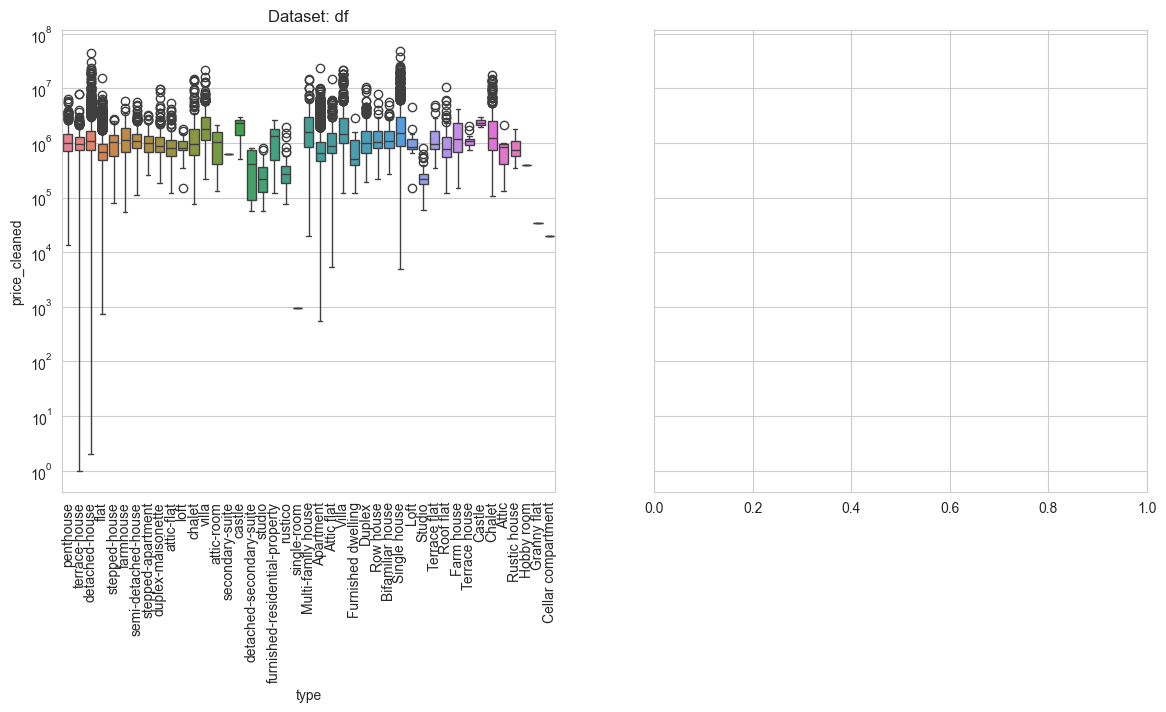

In [100]:
# Create the subplot for both datasets with logarithmic scaling for the y-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First plot with `df`
sns.boxplot(data=df, x="type", y="price_cleaned", hue="type", ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Dataset: df')
axes[0].tick_params(axis='x', rotation=90)

# Second plot with `df_clean`
sns.boxplot(data=df_clean, x="type", y="price_cleaned", hue="type", ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Dataset: df_clean')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

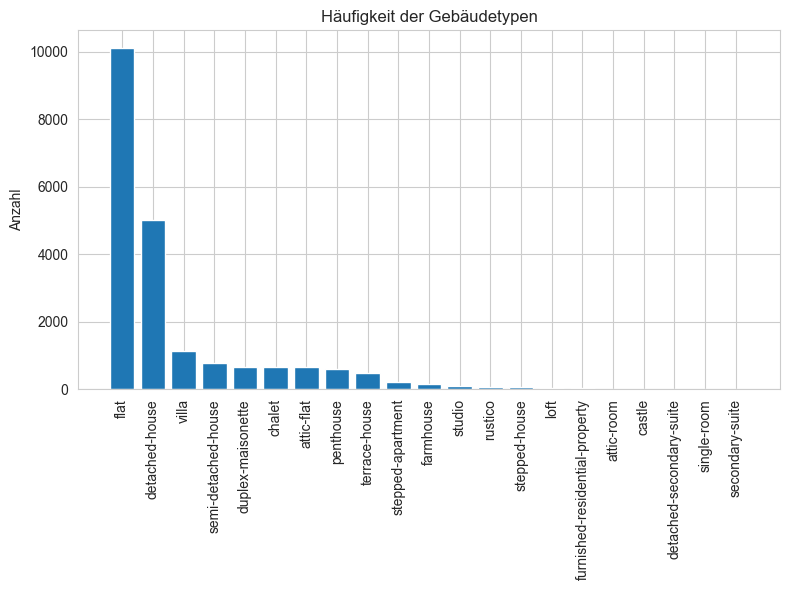

In [112]:
type_count = df_clean["type_unified"].value_counts().sort_values(ascending=False)

# Erstellen des Barplots
plt.figure(figsize=(8, 6))
plt.bar(type_count.index, type_count.values)
plt.xlabel('')
plt.ylabel('Anzahl')
plt.title('Häufigkeit der Gebäudetypen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

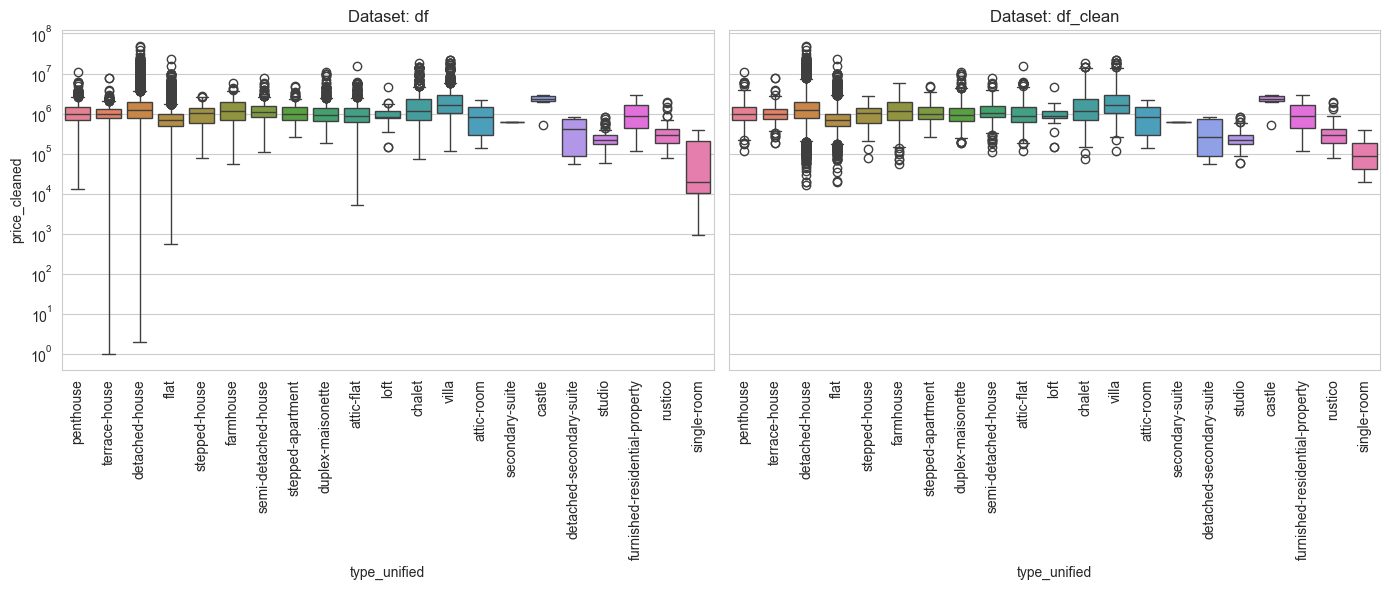

In [101]:
# Create the subplot for both datasets with logarithmic scaling for the y-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First plot with `df`
sns.boxplot(data=df, x="type_unified", y="price_cleaned", hue="type_unified", ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title('Dataset: df')
axes[0].tick_params(axis='x', rotation=90)

# Second plot with `df_clean`
sns.boxplot(data=df_clean, x="type_unified", y="price_cleaned", hue="type_unified", ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Dataset: df_clean')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [102]:
df_clean["type_unified"].value_counts().sort_values()


type_unified
secondary-suite                       1
single-room                           2
detached-secondary-suite              4
castle                                6
attic-room                           12
furnished-residential-property       24
loft                                 39
stepped-house                        57
rustico                              64
studio                               92
farmhouse                           151
stepped-apartment                   203
terrace-house                       482
penthouse                           608
attic-flat                          651
chalet                              655
duplex-maisonette                   674
semi-detached-house                 789
villa                              1133
detached-house                     5021
flat                              10119
Name: count, dtype: int64

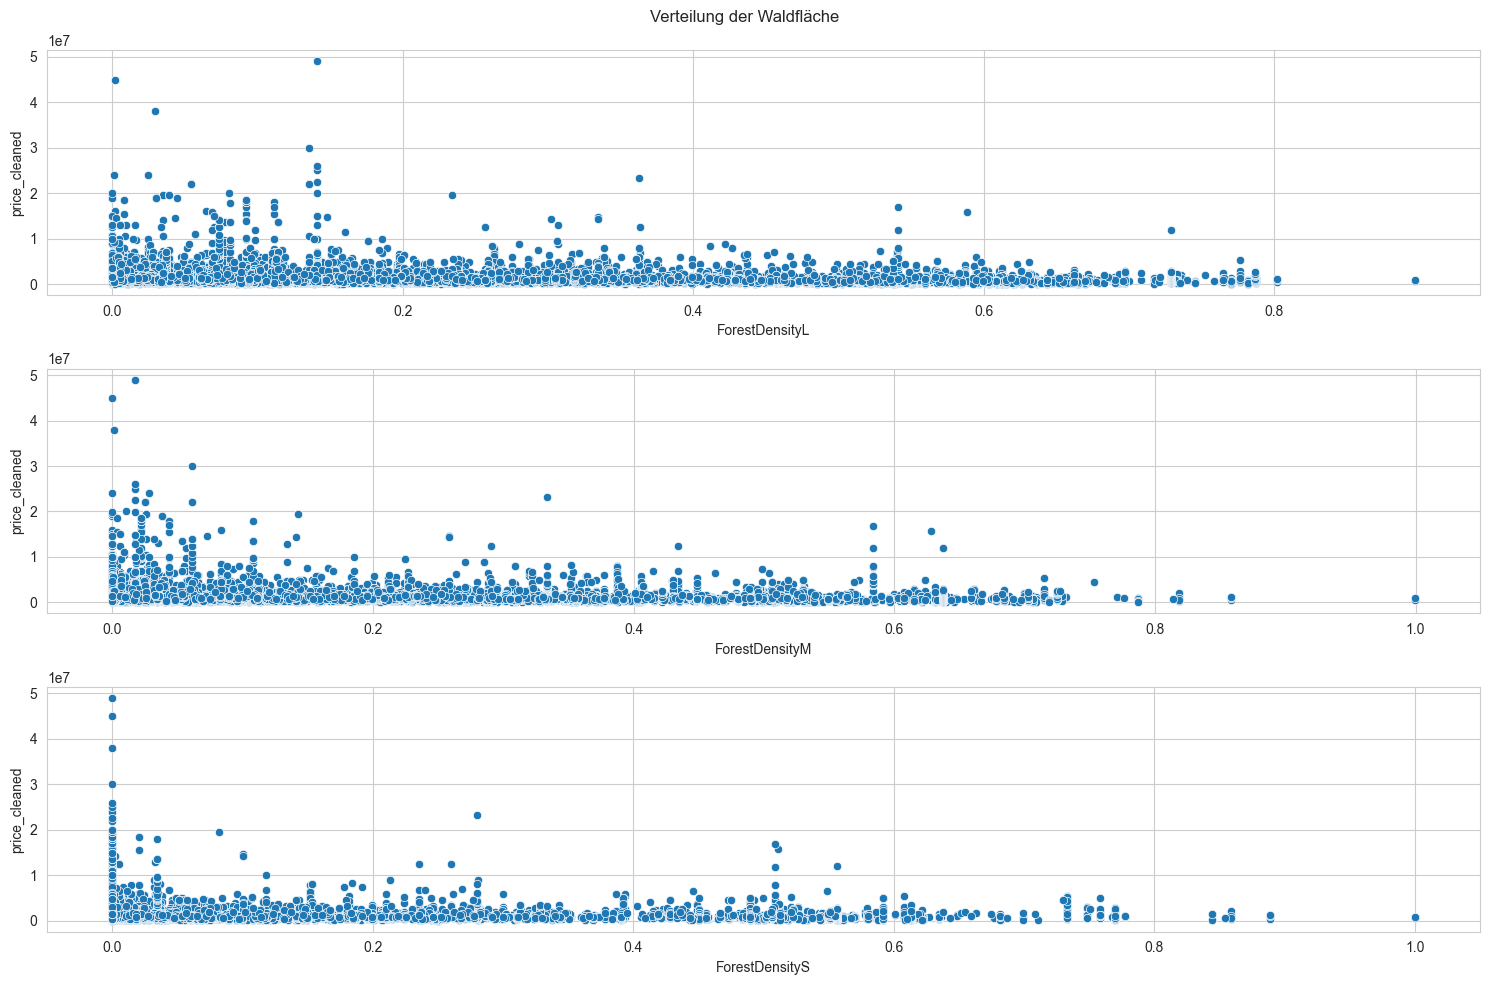

In [103]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Verteilung der Waldfläche")
sns.scatterplot(data=df_clean, x="ForestDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="ForestDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="ForestDensityS", y="price_cleaned", ax=ax[2])
plt.tight_layout()
plt.show()

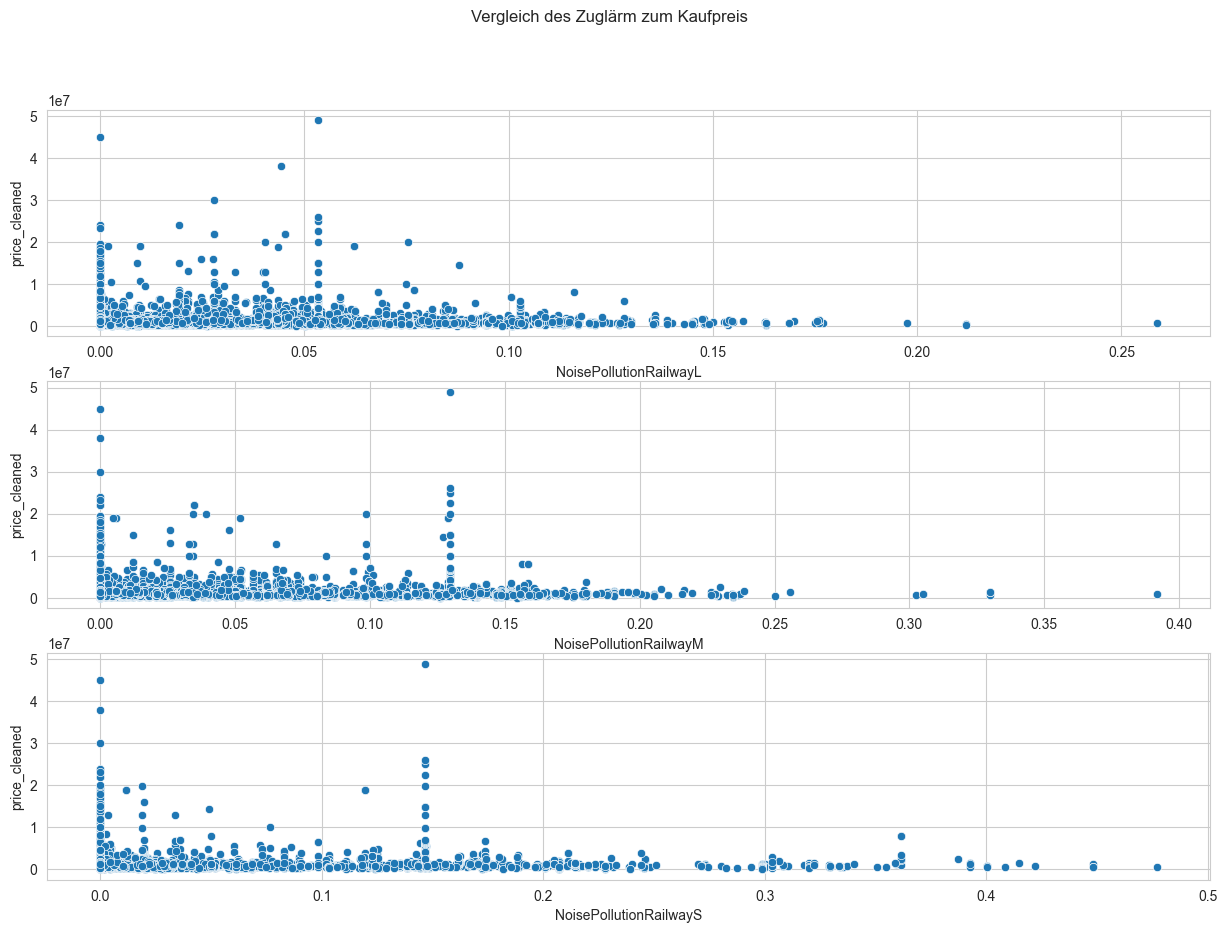

In [104]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich des Zuglärm zum Kaufpreis")
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="NoisePollutionRailwayS", y="price_cleaned", ax=ax[2])
plt.show()

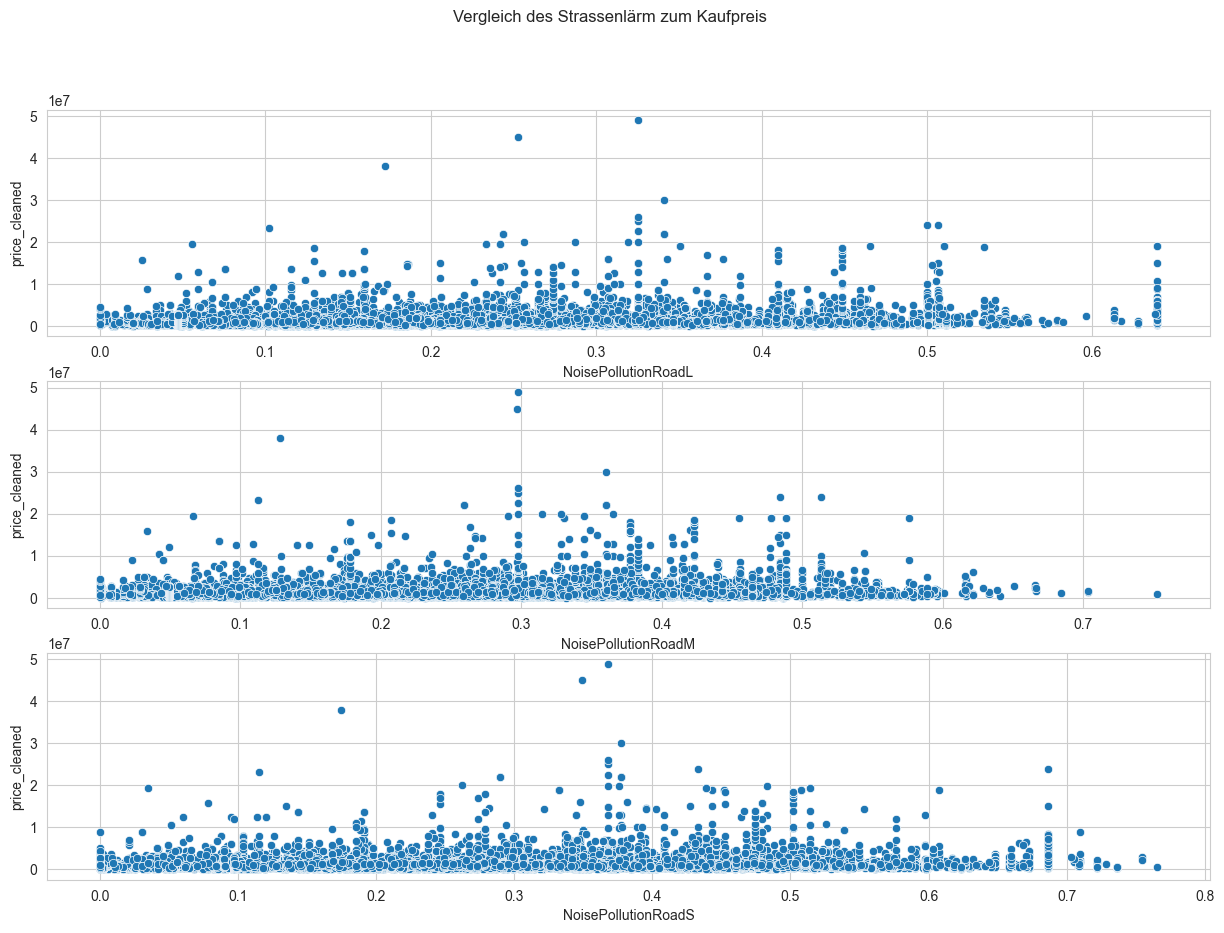

In [105]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich des Strassenlärm zum Kaufpreis")
sns.scatterplot(data=df_clean, x="NoisePollutionRoadL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="NoisePollutionRoadM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="NoisePollutionRoadS", y="price_cleaned", ax=ax[2])
plt.show()

ValueError: Could not interpret value `Number of apartments:` for `x`. An entry with this name does not appear in `data`.

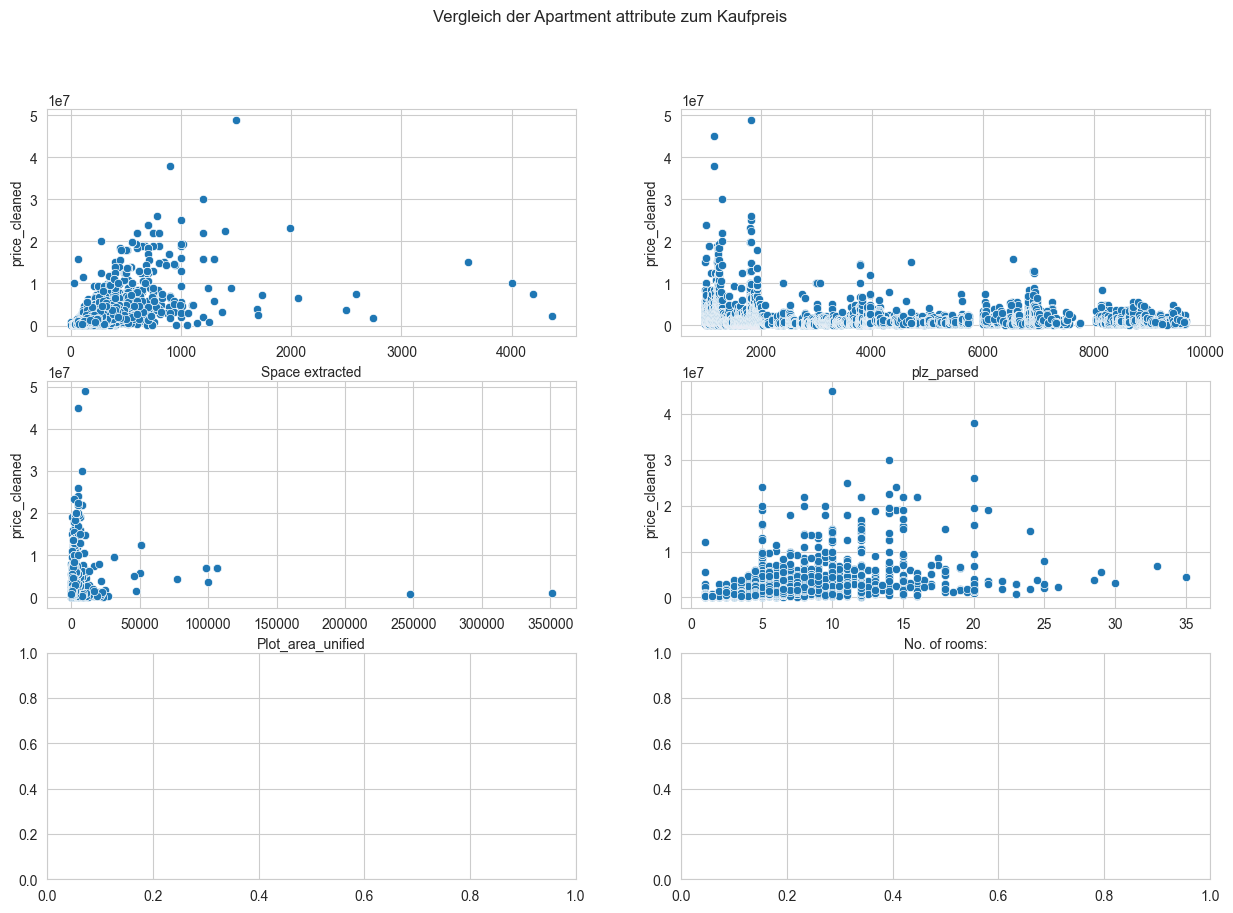

In [107]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Apartment attribute zum Kaufpreis")
sns.scatterplot(data= df_clean,x="Space extracted", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df, x="plz_parsed", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="Plot_area_unified", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="No. of rooms:", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="Number of apartments:", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="Number of floors:", y="price_cleaned", ax=ax[2, 1])
plt.tight_layout()
plt.show()

In [437]:
df.loc[df["Number of apartments:"]>200]

Municipality Living space Plot area Floor space Availability  \
19904    Haute-Nendaz          NaN       NaN         NaN          NaN   

                location                                        description  \
19904  1997 Haute-Nendaz  Ce duplex de 6.5 pièces en attique jouit d'une...   

                                    detailed_description  \
19904  Description\n"Charmant duplex en attique ski i...   

                                          url table  ...  \
19904  https://www.homegate.ch/buy/3002056493   NaN  ...   

                                                features  \
19904  Balcony / Terrace\tCable TV\tView\tParking spa...   

                                    description_detailed Floor space:  \
19904  Description\n"Charmant duplex en attique ski i...          NaN   

      Number of floors: Volume:     plz Number of toilets: Gross yield:  \
19904               NaN     NaN  1997.0                NaN          NaN   

      Minimum floor space: space_cleaned  
19904                  NaN         105.0  

[1 rows x 132 columns]

In [438]:
df_clean.loc[df_clean["price_cleaned"] == 2695000.0]

Availability  Floor  detail_responsive#surface_usable Gross return  \
355     On request    NaN                               NaN          NaN   
17513          NaN    1.0                               NaN          NaN   
22314          NaN    3.0                               NaN          NaN   

       Floor_space_merged              details  \
355                   NaN  10 rooms, 2369 m²,    
17513                 NaN                  NaN   
22314                 NaN                  NaN   

                                      details_structured        lat  \
355    {'Municipality': 'Villnachern', 'Plot area': '...  47.472242   
17513                                                NaN  46.297764   
22314                                                NaN  46.817216   

             lon  ForestDensityL  ...  plz_parsed    type_unified  \
355     8.160523        0.157752  ...        5213       farmhouse   
17513   7.055331        0.109693  ...        1884            flat   
22314  10.338604        0.266004  ...        7554  detached-house   

       Plot_area_unified        provider  No. of rooms:  \
355               2369.0  Immoscout24.ch           10.0   
17513                NaN     homegate.ch            5.5   
22314                NaN     homegate.ch            7.5   

       Number of apartments:  Last refurbishment:  Year built:  \
355                      NaN                  NaN          NaN   
17513                    NaN               2009.0       2009.0   
22314                    NaN               2016.0          NaN   

                                                features  Number of floors:  
355                                                  NaN                NaN  
17513                                    Fireplace\tView                NaN  
22314  Pets allowed\tBalcony / Terrace\tWashing machi...                3.0  

[3 rows x 70 columns]

## Space extracted auffüllen

War 898 nan

In [439]:
df_clean["Space extracted"].isna().sum()

np.int64(483)

In [440]:
def extract_space(detail):
    if isinstance(detail, str) and 'm²' in detail:
        try:
            return float(detail.split('m²')[0].split()[-1].strip().replace(',', ''))
        except ValueError:
            return np.nan
    return np.nan

df_clean.loc[:, 'Space extracted'] = df_clean['Space extracted'].fillna(
    df_clean['details'].apply(extract_space)
)

In [441]:
df_clean['Space extracted'].isna().sum()

np.int64(483)

In [442]:
df_clean['Space extracted'] = df_clean['Space extracted'].astype("float")

In [443]:
df_clean[['Space extracted',"details_structured"]].loc[df_clean["Space extracted"].isna()]

Space extracted                                 details_structured
7                  NaN  {'Municipality': 'Aarau', 'Floor': '3. floor',...
121                NaN  {'Municipality': 'Fislisbach', 'Availability':...
132                NaN  {'Municipality': 'Niederrohrdorf', 'Availabili...
154                NaN  {'Municipality': 'Oberrohrdorf', 'Availability...
181                NaN  {'Municipality': 'Wohlenschwil', 'Availability...
...                ...                                                ...
13126              NaN  {'Municipality': 'Bubikon', 'Availability': 'O...
13270              NaN  {'Municipality': 'Dübendorf, Kreis 7 (Zurich)'...
13271              NaN  {'Municipality': 'Weisslingen', 'Availability'...
13279              NaN  {'Municipality': 'Weisslingen', 'Availability'...
13335              NaN  {'Municipality': 'Uster', 'Availability': 'Imm...

[483 rows x 2 columns]

In [444]:
df_clean.loc[df_clean['Space extracted']>10000.00]

Availability  Floor  detail_responsive#surface_usable Gross return  \
11691   On request    NaN                               NaN          NaN   
12856   On request    NaN                               NaN          NaN   

       Floor_space_merged               details  \
11691                 NaN           21,000 m²,    
12856                 NaN  5 rooms, 13,014 m²,    

                                      details_structured        lat       lon  \
11691  {'Municipality': 'Evolène', 'Plot area': '21,0...  46.082704  7.507571   
12856  {'Municipality': 'Neuheim', 'Plot area': '13,0...  47.202860  8.582430   

       ForestDensityL  ...  plz_parsed    type_unified  Plot_area_unified  \
11691        0.488697  ...        1984       farmhouse            21000.0   
12856        0.227567  ...        6345  detached-house            13014.0   

             provider  No. of rooms:  Number of apartments:  \
11691  Immoscout24.ch            NaN                    NaN   
12856  Immoscout24.ch            5.0                    NaN   

       Last refurbishment:  Year built:  features  Number of floors:  
11691                  NaN          NaN       NaN                NaN  
12856                  NaN          NaN       NaN                NaN  

[2 rows x 70 columns]

In [445]:
df.loc[df["details"] == "21,000 m², "]

Municipality Living space  Plot area Floor space Availability  \
11691      Evolène          NaN  21,000 m²         NaN   On request   

                    location  \
11691  1984 Les Haudères, VS   

                                             description  \
11691  «Domaine agricole - 21000 m2 - commune d Evolè...   

                                    detailed_description  \
11691  DescriptionExclusivitéAffectation agricole uni...   

                                                     url  \
11691  https://www.immoscout24.ch//en/d/farmhouse-buy...   

                                                   table  ... features  \
11691  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   

      description_detailed Floor space: Number of floors: Volume:     plz  \
11691                  NaN          NaN               NaN     NaN  1984.0   

      Number of toilets: Gross yield: Minimum floor space: space_cleaned  
11691                NaN          NaN                  NaN           NaN  

[1 rows x 132 columns]

In [446]:
df.loc[df["details"] == "5 rooms, 13,014 m², "]

Municipality Living space  Plot area Floor space Availability  \
12856      Neuheim          NaN  13,014 m²         NaN   On request   

                     location  \
12856  Laubau6345 Neuheim, ZG   

                                             description  \
12856  5 rooms«MODERNE REITSPORTIMMOBILIE MIT WOHNMÖG...   

                                    detailed_description  \
12856  DescriptionDiese moderne Reitsportimmobilie wu...   

                                                     url  \
12856  https://www.immoscout24.ch//en/d/detached-hous...   

                                                   table  ... features  \
12856  b <article class=####Box-cYFBPY hKrxoH####><h2...  ...      NaN   

      description_detailed Floor space: Number of floors: Volume:     plz  \
12856                  NaN          NaN               NaN     NaN  6345.0   

      Number of toilets: Gross yield: Minimum floor space: space_cleaned  
12856                NaN          NaN                  NaN           NaN  

[1 rows x 132 columns]

<Axes: xlabel='Space extracted', ylabel='Count'>

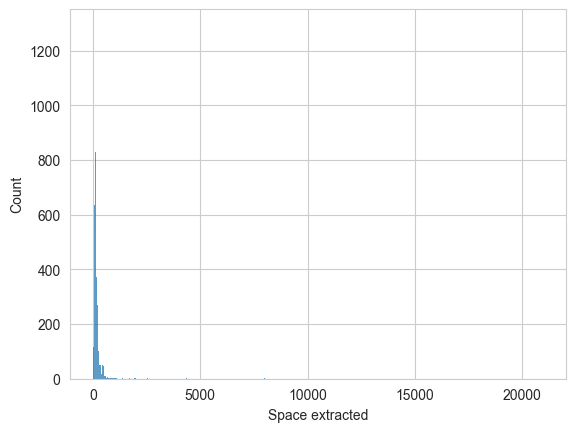

In [447]:
sns.histplot(data=df_clean, x="Space extracted")

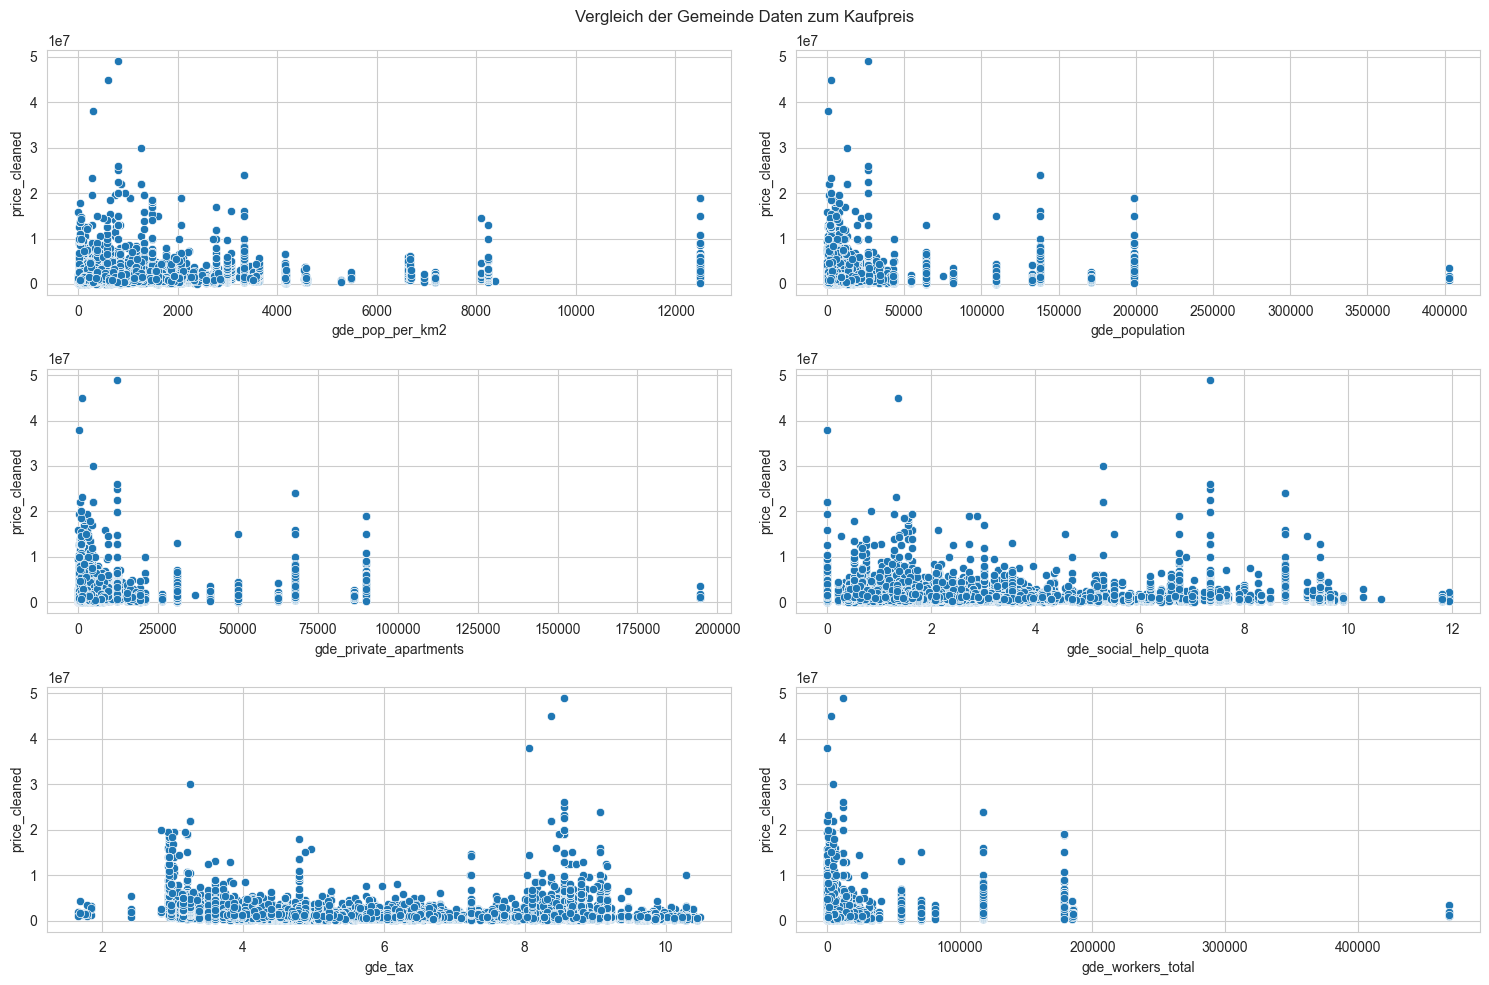

In [448]:
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Gemeinde Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_pop_per_km2", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_population", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_private_apartments", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_social_help_quota", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_tax", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_workers_total", y="price_cleaned", ax=ax[2, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='gde_workers_sector3', ylabel='price_cleaned'>

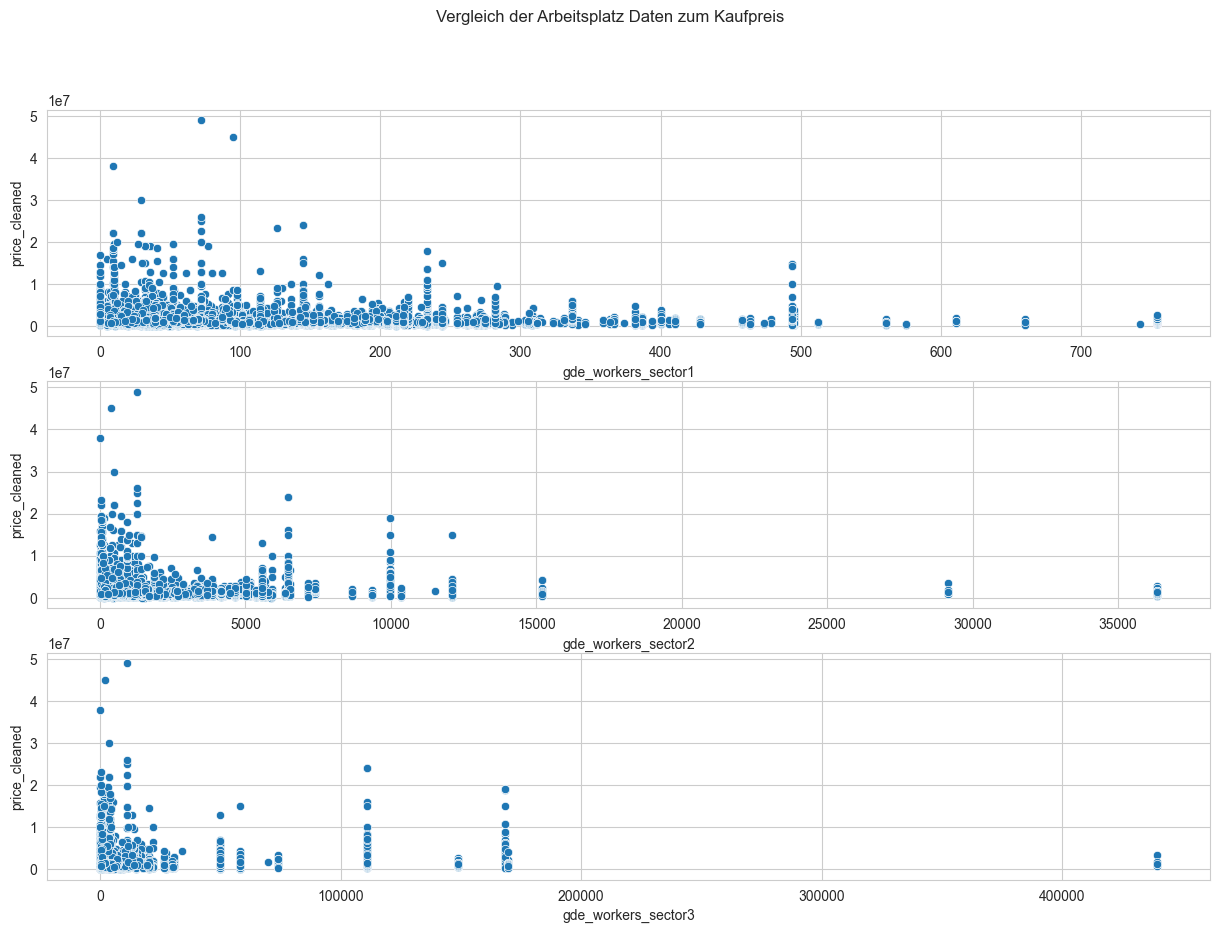

In [449]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Arbeitsplatz Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_workers_sector1", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="gde_workers_sector2", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="gde_workers_sector3", y="price_cleaned", ax=ax[2])

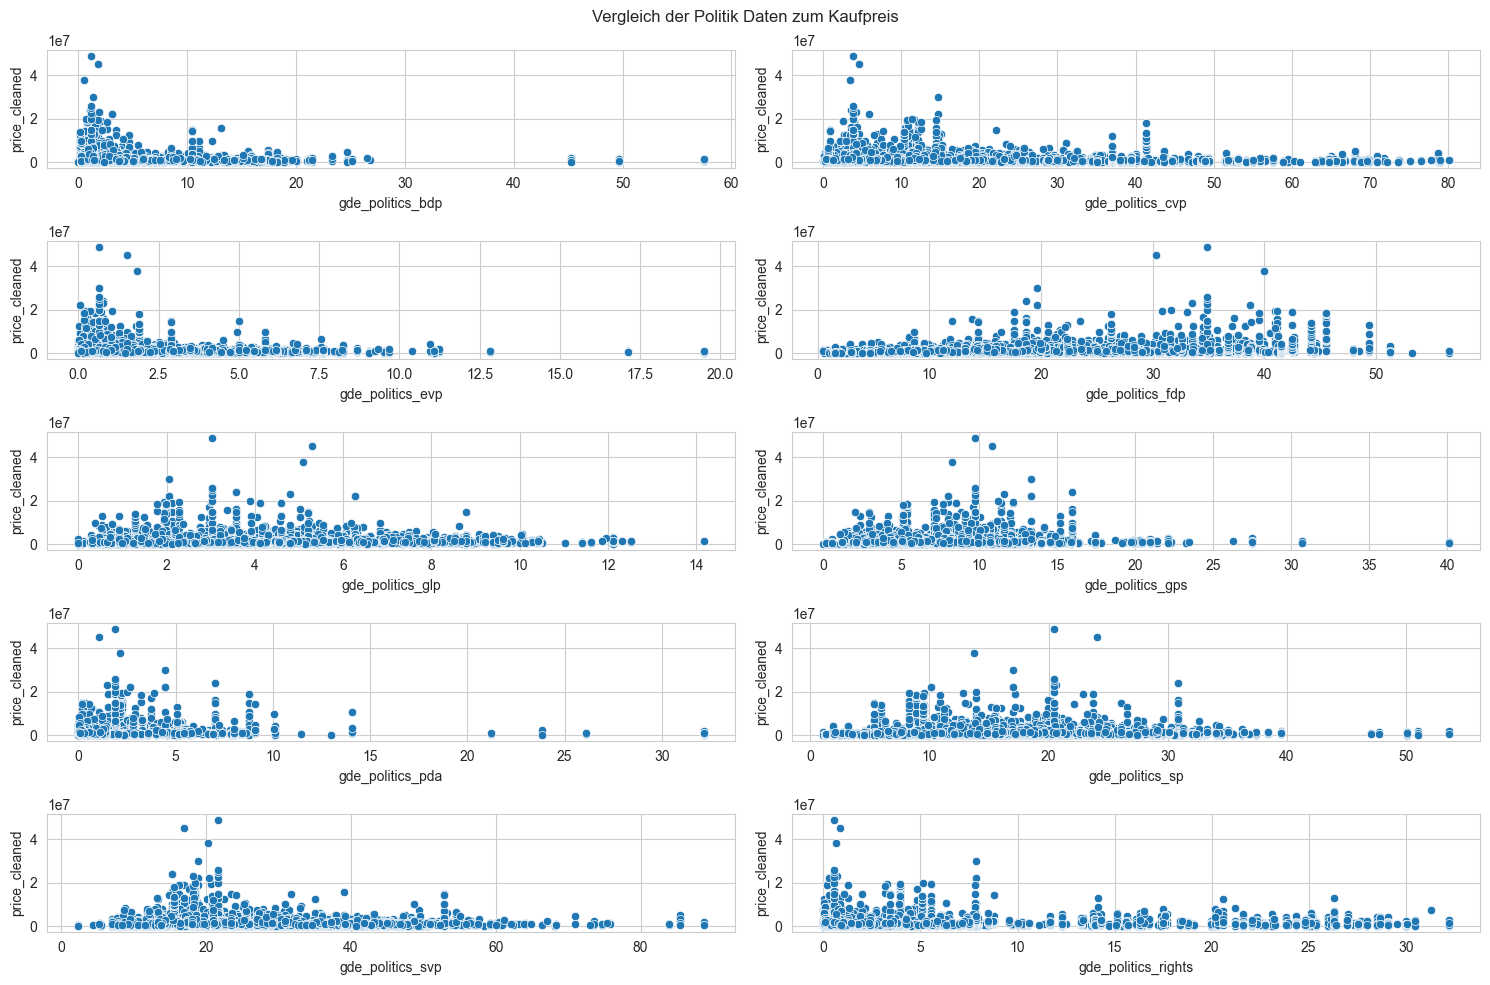

In [450]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Politik Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_politics_bdp", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_politics_cvp", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_politics_evp", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_politics_fdp", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_politics_glp", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_politics_gps", y="price_cleaned", ax=ax[2, 1])
sns.scatterplot(data=df_clean, x="gde_politics_pda", y="price_cleaned", ax=ax[3, 0])
sns.scatterplot(data=df_clean, x="gde_politics_sp", y="price_cleaned", ax=ax[3, 1])
sns.scatterplot(data=df_clean, x="gde_politics_svp", y="price_cleaned", ax=ax[4, 0])
sns.scatterplot(data=df_clean, x="gde_politics_rights", y="price_cleaned", ax=ax[4, 1])
plt.tight_layout()
plt.show()

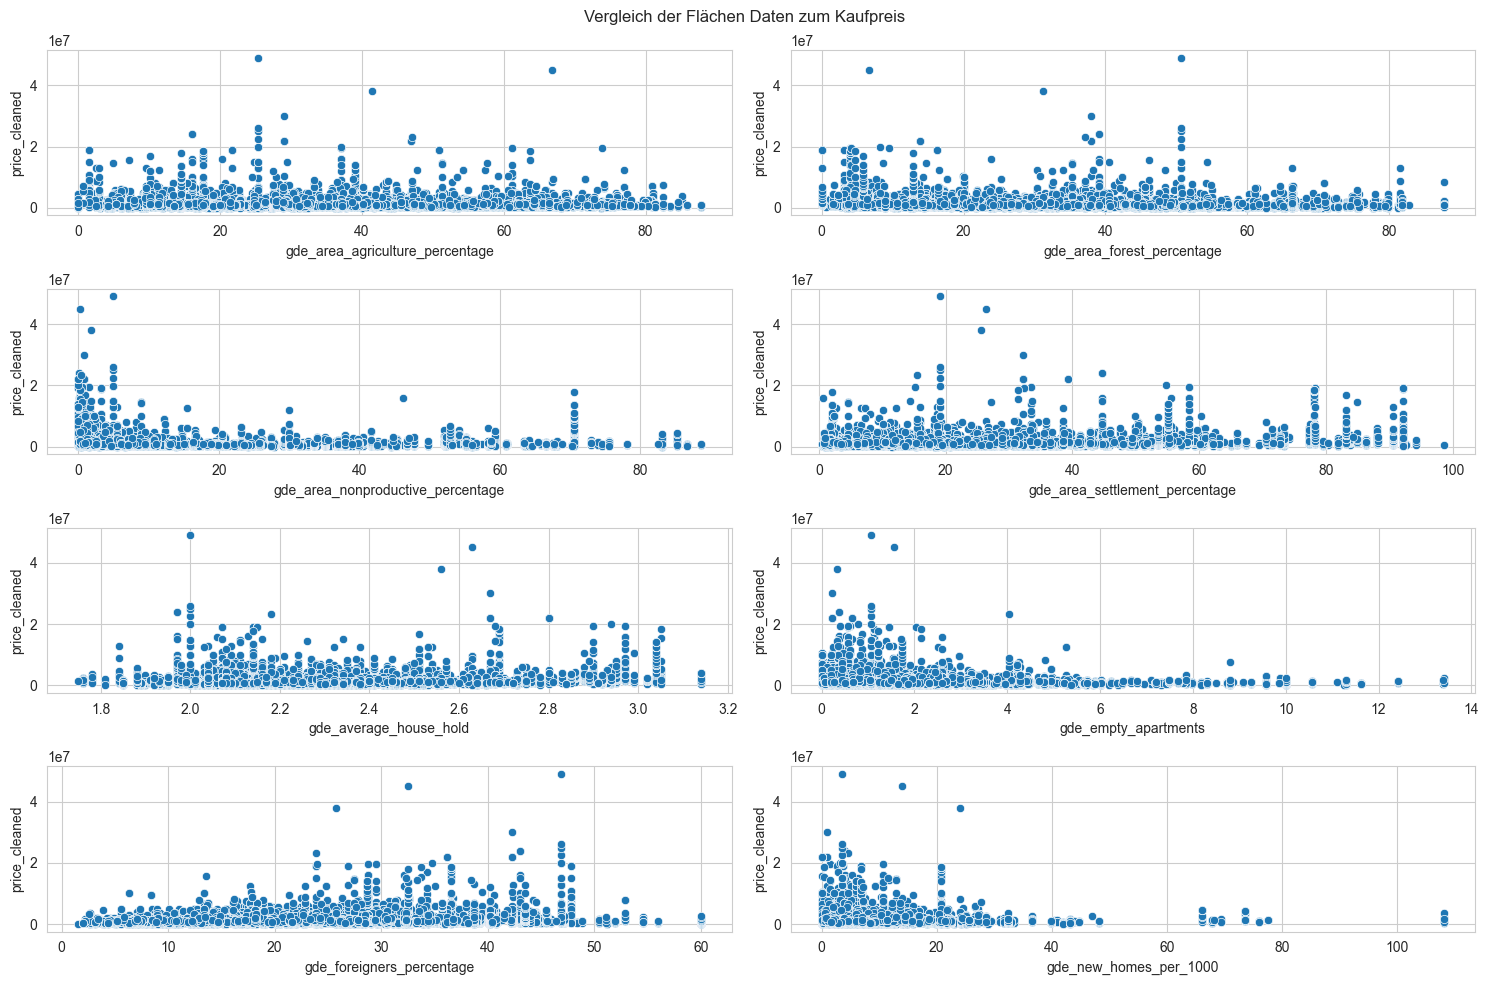

In [451]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
plt.suptitle("Vergleich der Flächen Daten zum Kaufpreis")
sns.scatterplot(data=df_clean, x="gde_area_agriculture_percentage", y="price_cleaned", ax=ax[0, 0])
sns.scatterplot(data=df_clean, x="gde_area_forest_percentage", y="price_cleaned", ax=ax[0, 1])
sns.scatterplot(data=df_clean, x="gde_area_nonproductive_percentage", y="price_cleaned", ax=ax[1, 0])
sns.scatterplot(data=df_clean, x="gde_area_settlement_percentage", y="price_cleaned", ax=ax[1, 1])
sns.scatterplot(data=df_clean, x="gde_average_house_hold", y="price_cleaned", ax=ax[2, 0])
sns.scatterplot(data=df_clean, x="gde_empty_apartments", y="price_cleaned", ax=ax[2, 1])
sns.scatterplot(data=df_clean, x="gde_foreigners_percentage", y="price_cleaned", ax=ax[3, 0])
sns.scatterplot(data=df_clean, x="gde_new_homes_per_1000", y="price_cleaned", ax=ax[3, 1])
plt.tight_layout()
plt.show()

<Axes: xlabel='distanceToTrainStation', ylabel='price_cleaned'>

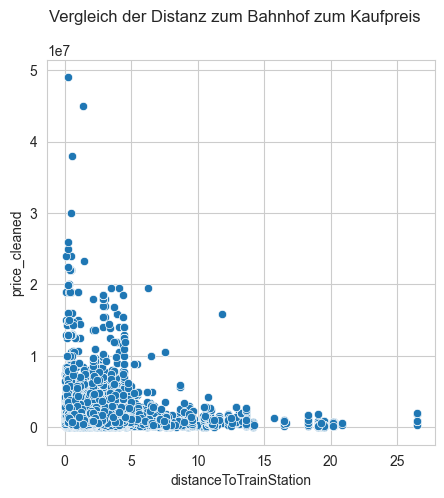

In [452]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.suptitle("Vergleich der Distanz zum Bahnhof zum Kaufpreis")
sns.scatterplot(data=df_clean, x="distanceToTrainStation", y="price_cleaned")

<Axes: xlabel='WorkplaceDensityS', ylabel='price_cleaned'>

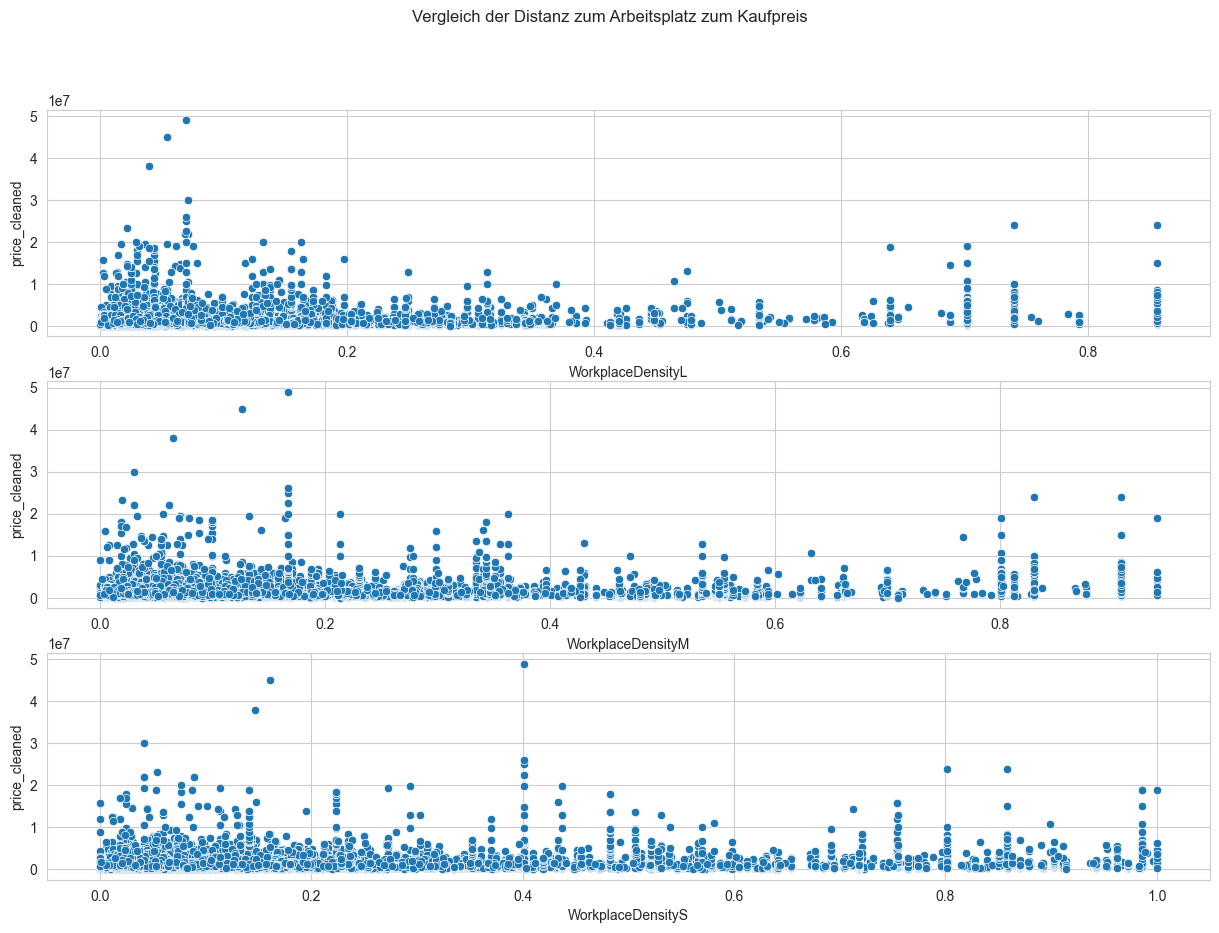

In [453]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zum Arbeitsplatz zum Kaufpreis")
sns.scatterplot(data=df_clean, x="WorkplaceDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="WorkplaceDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="WorkplaceDensityS", y="price_cleaned", ax=ax[2])

<Axes: xlabel='RiversAndLakesS', ylabel='price_cleaned'>

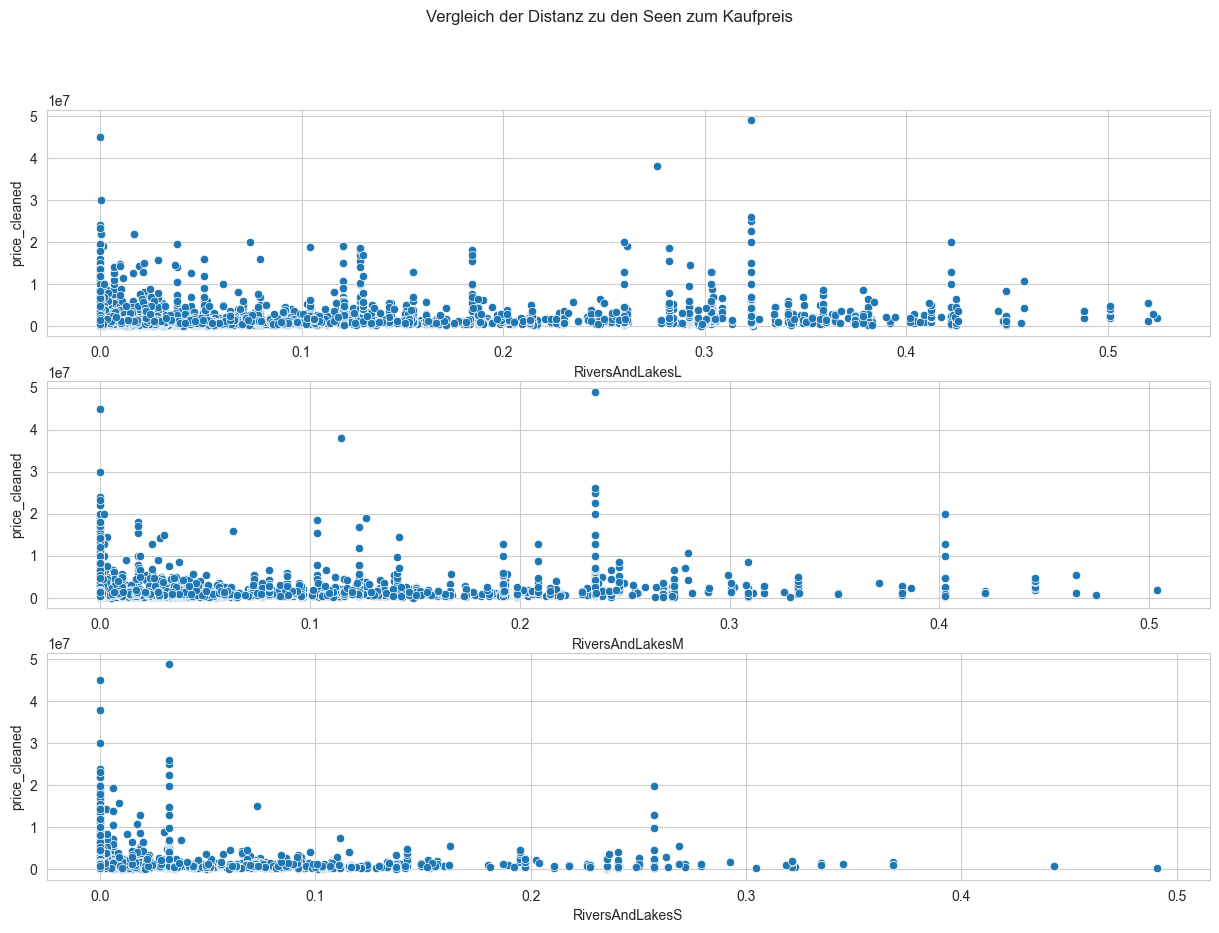

In [454]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zu den Seen zum Kaufpreis")
sns.scatterplot(data=df_clean, x="RiversAndLakesL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="RiversAndLakesM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="RiversAndLakesS", y="price_cleaned", ax=ax[2])

<Axes: xlabel='PopulationDensityS', ylabel='price_cleaned'>

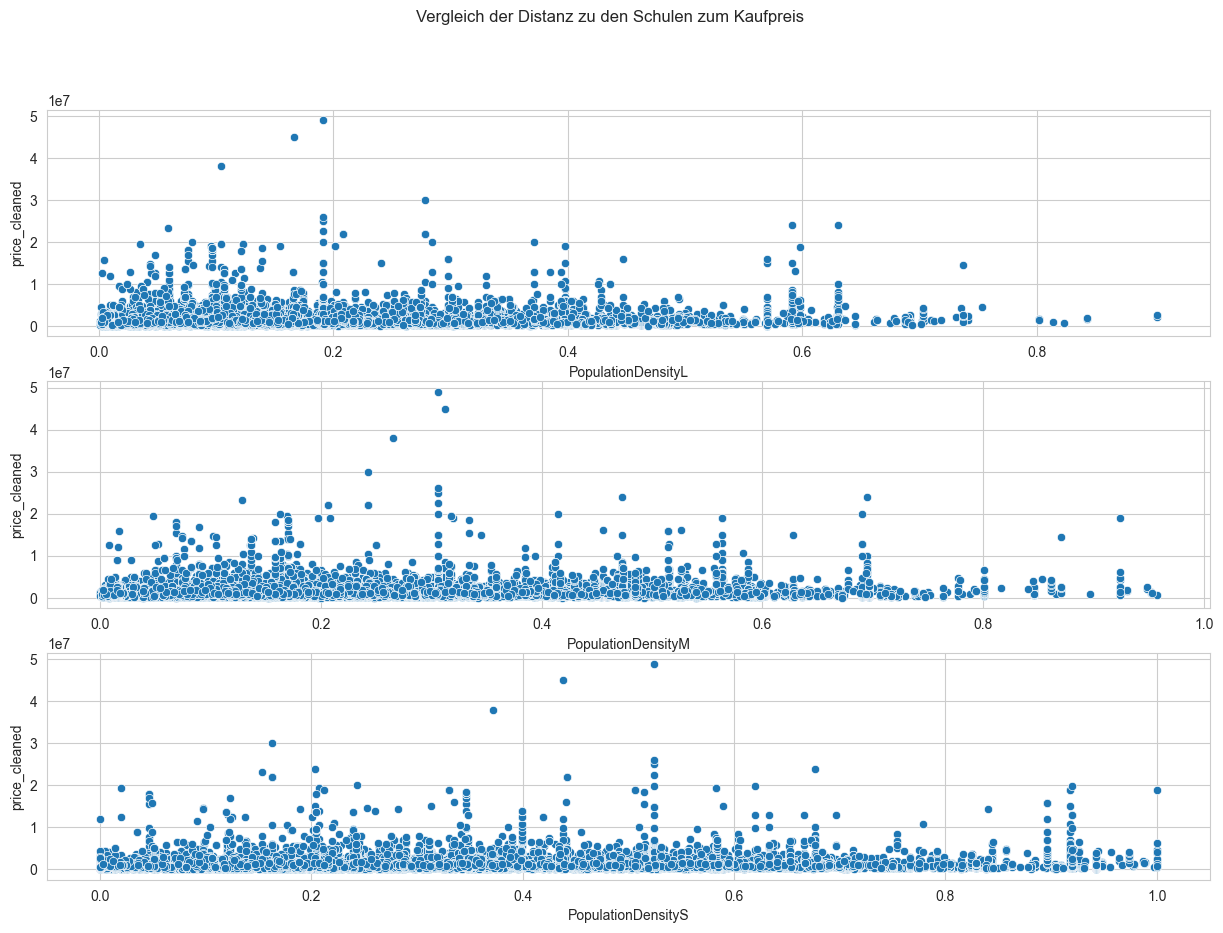

In [455]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
plt.suptitle("Vergleich der Distanz zu den Schulen zum Kaufpreis")
sns.scatterplot(data=df_clean, x="PopulationDensityL", y="price_cleaned", ax=ax[0])
sns.scatterplot(data=df_clean, x="PopulationDensityM", y="price_cleaned", ax=ax[1])
sns.scatterplot(data=df_clean, x="PopulationDensityS", y="price_cleaned", ax=ax[2])

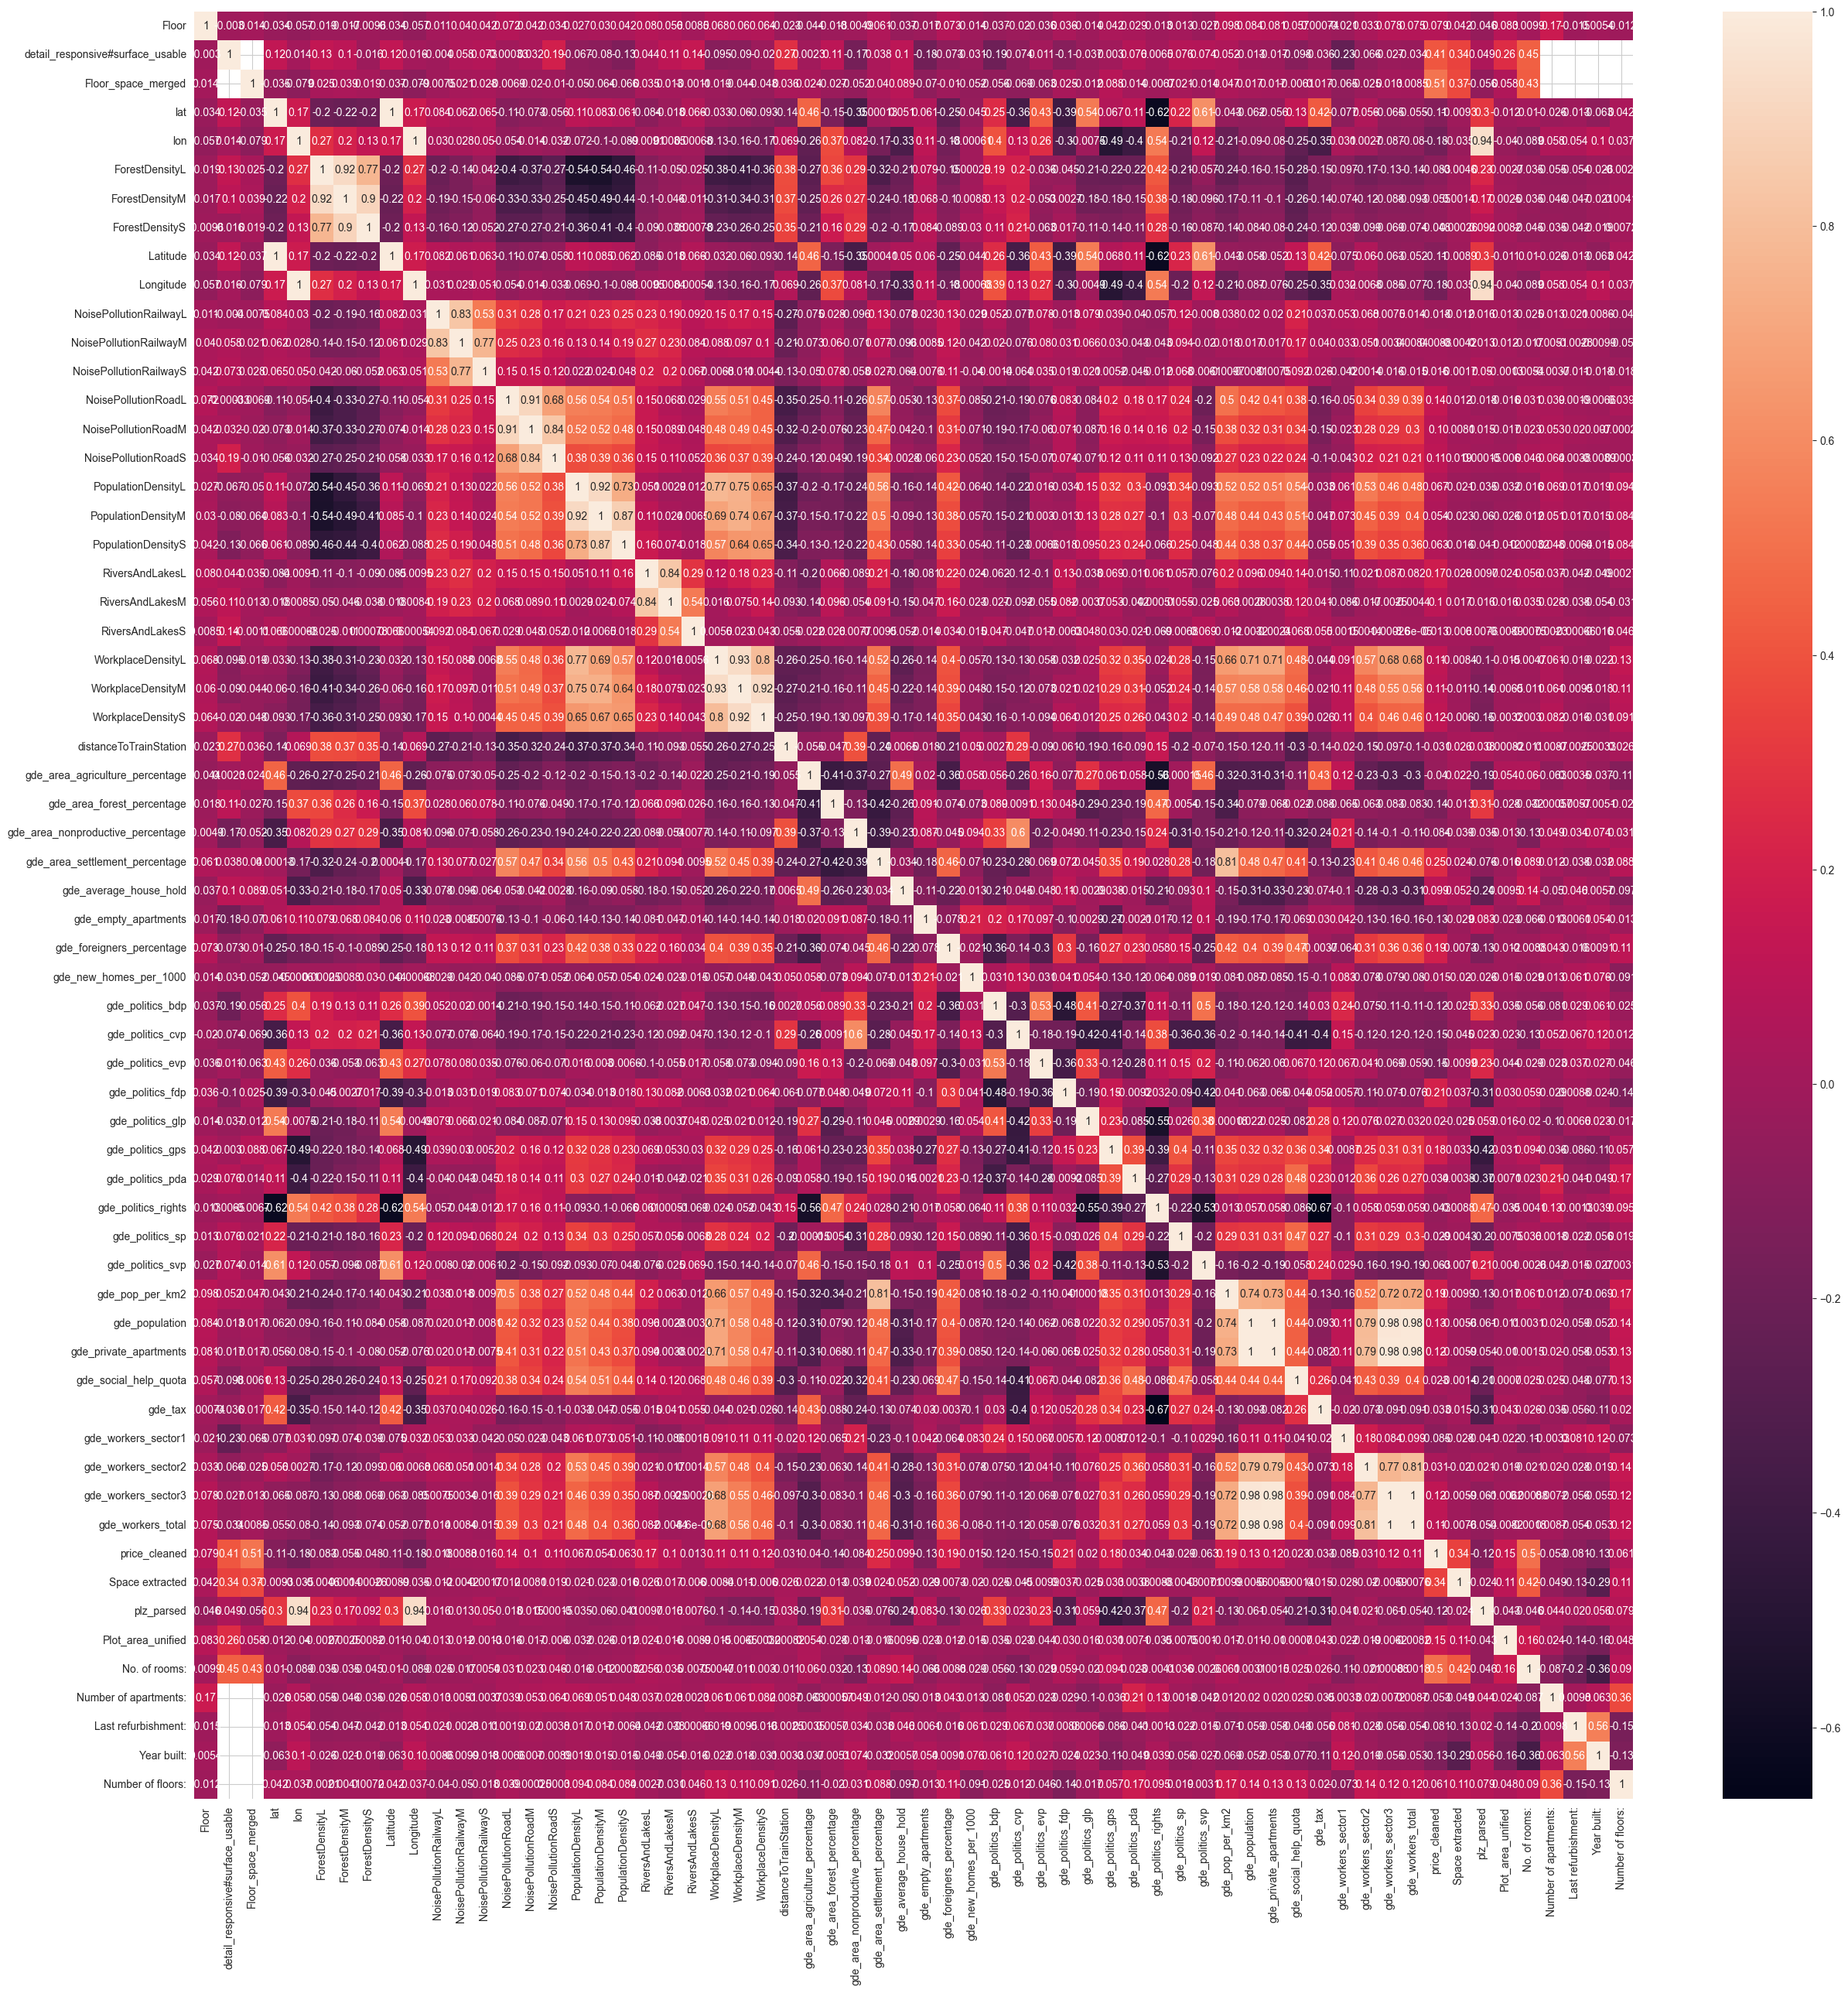

In [456]:
corr_matrix = df_clean.corr(numeric_only=True)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True)
plt.show()